## Assignment - 1

In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt

## 1.  Continuous time signal

## Basic signal

Consider the following signal with basic transformations of the form y(t) = a x(b t + c), where a is the amplitude scaling factor, b is the time scaling factor, and c is the time shift. Plot the following signals (make sure that each section will be on a single subplot):

                               x1(t) = u(t) = 0,    t < 0
                                              1,    0 ≤ t ≤ 20
                                              
                               x2(t) = r(t) = t u(t)
                               
                               x3(t) = p(t) = t^2 u(t)/2
                               
                               x4(t) = rect(t/T)
                                      
                               x5(t) = rect(t/T)*rect(t/T)
                               
                               x6(t) = sinc(t) = sin(πt)/πt
                               
                               x7(t) = 0,             t<0
                                       t-d1/d2-d1,    d1 ≤ t ≤ d2
                                       d3-t/d3-d2,    d2 ≤ t ≤ d3
                                       0,             d3 ≤ t
                              
where u(t) is the unit impulse signal, r(t) is the ramp signal, p(t) is the parabolic signal, rect(t/T) is a rectangular pulse between -T/2 and T/2. In x7(t) choose d1 = 3, d2 = 10, d3 = 15.

In [2]:
# function to generate unit step u(t).
def step_function(a,c,t):
    unit =[]
    for sample in t:
        if sample < c:
            unit.append(0)
        else:
            unit.append(a)
    return unit

######################################################################################################################
######################################################################################################################

# function to generate ramp signal r(t).
def ramp_function(a,c,t):
    ramp =[]
    for sample in t:
        if sample < c:
            ramp.append(0)
        else:
            ramp.append(a*sample)
    return ramp


######################################################################################################################
######################################################################################################################

#function to generate parabolic signal p(t).
def parabolic_function(a,c,t):
    parabolic =[]
    for sample in t:
        if sample < c:
            parabolic.append(0)
        else:
            parabolic.append(a*(((sample)**2)/2))
    return parabolic



######################################################################################################################
######################################################################################################################

# function to generate rectangle pulse signal rect(t/T)
def rect_function(a,c,t,T):
    rect =[]
    for sample in t:
        if sample < c-T/2:
            rect.append(0)
        elif sample > c+T/2:
            rect.append(0)
        else:
            rect.append(a)
    return rect


######################################################################################################################
######################################################################################################################

# function to convolute the two signal.
def convolution_1(x1,x2):
    m = len(x1)
    n = len(x2)
    output = []
    for i in range(1,m+1):
        output.append(sum(np.multiply(x1[0:i],x2[n-i:n])))
    for j in range(1,n):
        output.append(sum(np.multiply(x1[j:m],x2[0:n-j])))
    return output


######################################################################################################################
######################################################################################################################

# function to generate sinc signal sinc(t)
def sinc_function(t):
    sinc = []
    for sample in t:
        y = np.sin(np.pi*sample)/(np.pi*sample)
        sinc.append(y)
    return sinc


######################################################################################################################
######################################################################################################################

# function to generate signal.
def x_7_function(t,d1,d2,d3):
    output = []
    for sample in t:
        if sample < 0:
            output.append(0)
        elif sample >= d1 and sample <= d2:
            output.append((sample-d1)/(d2-d1))
        elif sample > d2 and sample <= d3:
            output.append((d3-sample)/(d3-d2))
        elif sample > d3:
            output.append(0)
        else:
            output.append(0)
    return output

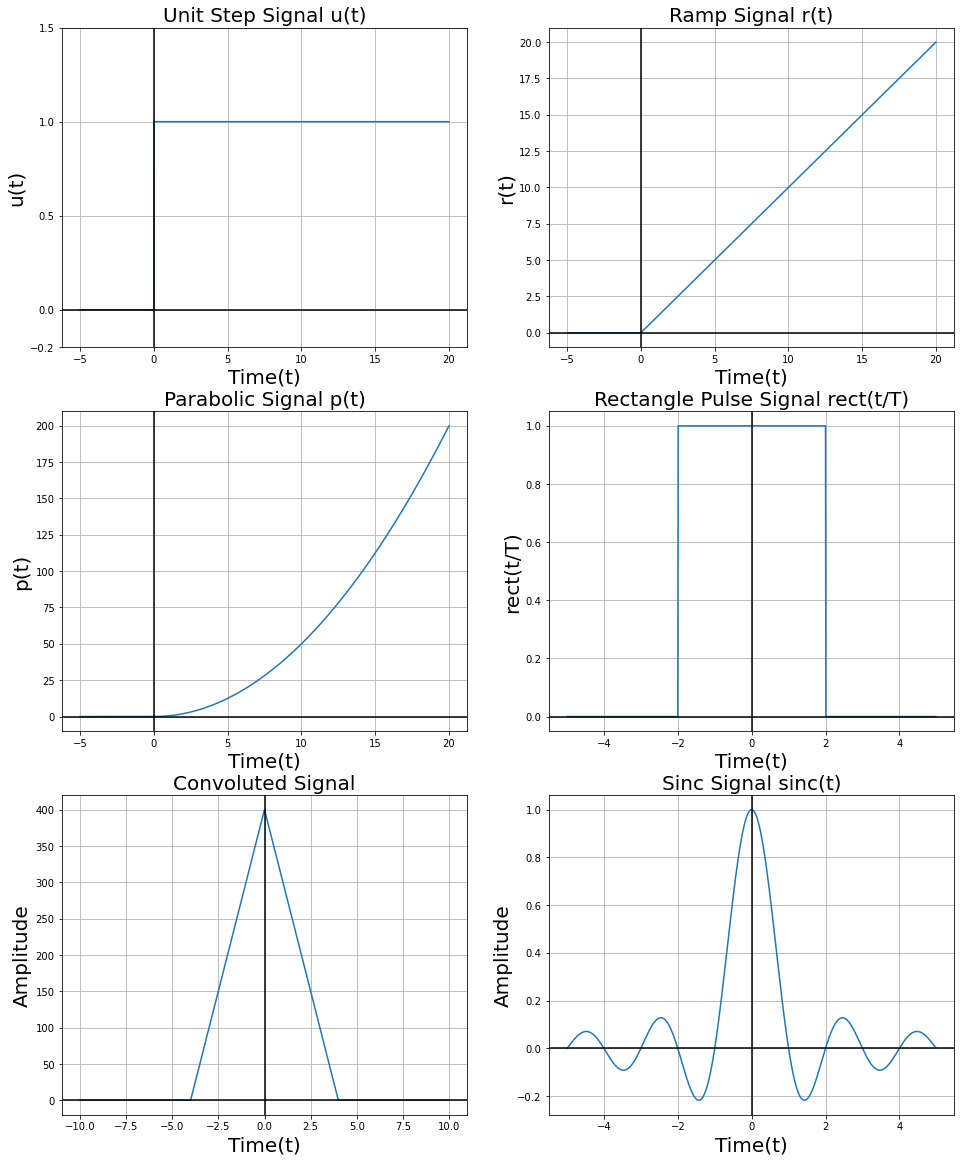

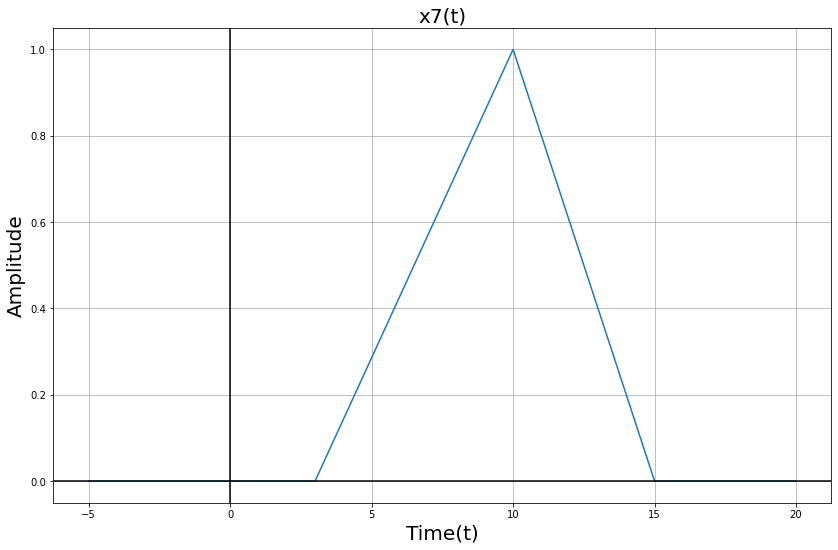

In [3]:
fig, axes = plt.subplots(3,2,figsize=(16, 20));

######################################################################################################################
######################################################################################################################

# plot unit step function u(t).
a = 1
c = 0
t = np.arange(-5,20,0.01)
unit = step_function(a,c,t)
axes[0,0].plot(t,unit)
axes[0,0].set_xlabel('Time(t)',fontsize=20)
axes[0,0].set_yticks([-0.2,0,0.5,1,1.5])
axes[0,0].set_ylabel('u(t)',fontsize=20)
axes[0,0].set_title('Unit Step Signal u(t)',fontsize=20)
axes[0,0].axhline(color = "Black");
axes[0,0].axvline(color = "Black");
axes[0,0].grid()


######################################################################################################################
######################################################################################################################

# plot ramp function r(t).
a = 1;
c = 0;
t = np.arange(-5,20,0.01)
ramp = ramp_function(a,c,t)
axes[0,1].plot(t,ramp)
axes[0,1].set_xlabel('Time(t)',fontsize=20)
axes[0,1].set_ylabel('r(t)',fontsize=20)
axes[0,1].set_title('Ramp Signal r(t)',fontsize=20)
axes[0,1].axhline(color = "Black");
axes[0,1].axvline(color = "Black");
axes[0,1].grid()


######################################################################################################################
######################################################################################################################

# plot parabolic function p(t).
a = 1
c = 0
t = np.arange(-5,20,0.01)
parabolic = parabolic_function(a,c,t)
axes[1,0].plot(t,parabolic)
axes[1,0].set_xlabel('Time(t)',fontsize=20)
axes[1,0].set_ylabel('p(t)',fontsize=20)
axes[1,0].set_title('Parabolic Signal p(t)',fontsize=20)
axes[1,0].axhline(color = "Black");
axes[1,0].axvline(color = "Black");
axes[1,0].grid()


######################################################################################################################
######################################################################################################################

# plot ractangular pulse function rect(t/T)
a = 1
c = 0
T = 4
t = np.arange(-5,5,0.01)
rect = rect_function(a,c,t,T)
axes[1,1].plot(t,rect)
axes[1,1].set_xlabel('Time(t)',fontsize=20)
axes[1,1].set_ylabel('rect(t/T)',fontsize=20)
axes[1,1].set_title('Rectangle Pulse Signal rect(t/T)',fontsize=20)
axes[1,1].axhline(color = "Black");
axes[1,1].axvline(color = "Black");
axes[1,1].grid()


######################################################################################################################
######################################################################################################################

# plot convoluted signal.
a = 1
c = 0
T = 4 
UL = 5
LL = -5
SS = 0.01
t = np.arange(LL,UL,SS)
t1 = np.arange((2*LL)+(SS/2),(2*UL)-(SS/2),SS)
rect1 = rect_function(a,c,t,T)
rect2 = rect_function(a,c,t,T)
convolute = convolution_1(rect1,rect2)
axes[2,0].plot(t1,convolute)
axes[2,0].set_xlabel('Time(t)',fontsize=20)
axes[2,0].set_ylabel('Amplitude',fontsize=20)
axes[2,0].set_title('Convoluted Signal',fontsize=20)
axes[2,0].axhline(color = "Black");
axes[2,0].axvline(color = "Black");
axes[2,0].grid()


######################################################################################################################
######################################################################################################################

# plot sinc function sinc(t)
t = np.arange(-5,5,0.01)
sinc = sinc_function(t)
axes[2,1].plot(t,sinc)
axes[2,1].set_xlabel('Time(t)',fontsize=20)
axes[2,1].set_ylabel('Amplitude',fontsize=20)
axes[2,1].set_title('Sinc Signal sinc(t)',fontsize=20)
axes[2,1].axhline(color = "Black");
axes[2,1].axvline(color = "Black");
axes[2,1].grid()


######################################################################################################################
######################################################################################################################

# plot function x_7.
plt.subplots(figsize=(12, 8));
t = np.arange(-5,20,0.01)
d1 = 3
d2 = 10
d3 = 15
x = x_7_function(t,d1,d2,d3)
plt.plot(t,x)
plt.xlabel('Time(t)',fontsize=20)
plt.ylabel('Amplitude',fontsize=20)
plt.title('x7(t)',fontsize=20)
plt.axhline(color = "Black");
plt.axvline(color = "Black");
plt.grid()


plt.tight_layout(pad=2);

Then, draw the amplitude scaled and time shifted versions of the signals x1 to x5 with amplitude scaling factor a = 4 and time shift c = −2.

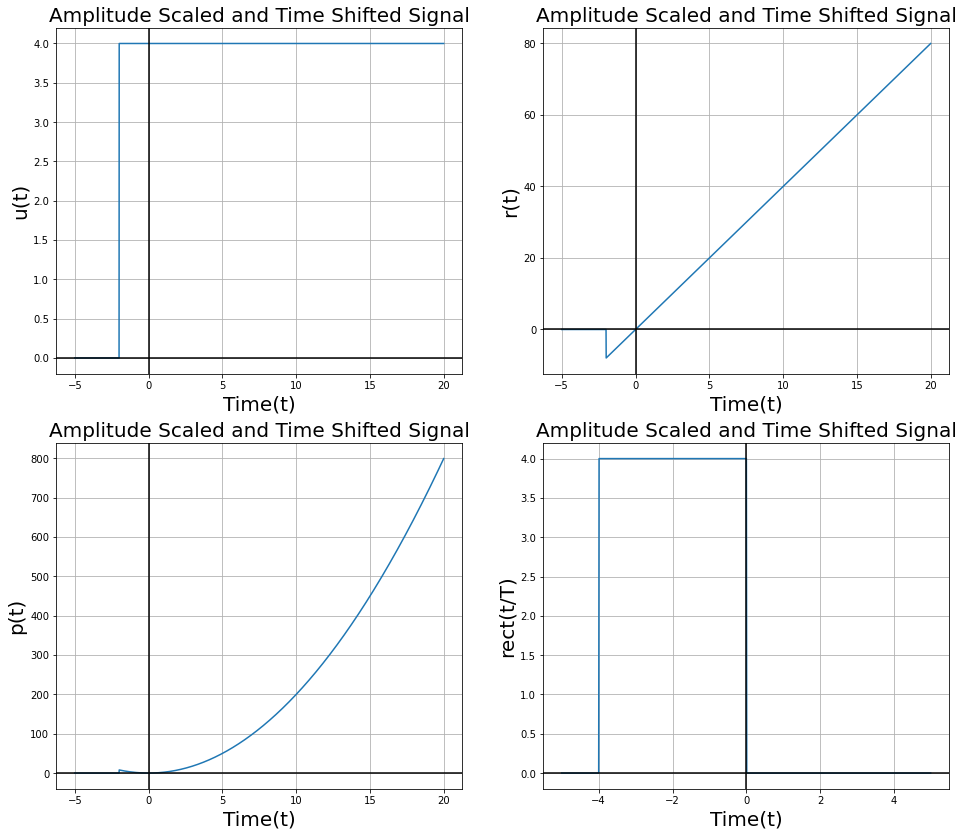

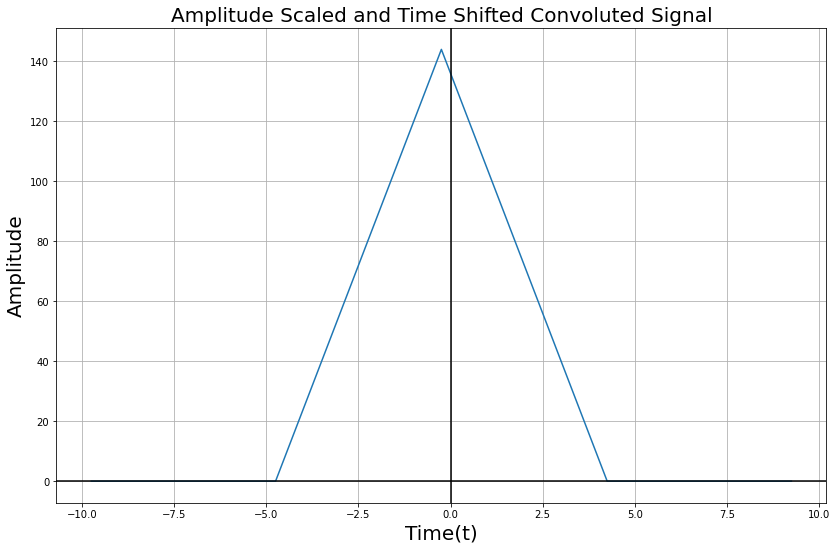

In [5]:
fig, axes = plt.subplots(2,2,figsize=(16, 14));


######################################################################################################################
######################################################################################################################

# plot unit step function u(t).
a = 4  
c = -2
t = np.arange(-5,20,0.01)
unit = step_function(a,c,t)
axes[0,0].plot(t,unit)
axes[0,0].set_xlabel('Time(t)',fontsize=20)
axes[0,0].set_ylabel('u(t)',fontsize=20)
axes[0,0].set_title('Amplitude Scaled and Time Shifted Signal',fontsize=20)
axes[0,0].axhline(color = "Black");
axes[0,0].axvline(color = "Black");
axes[0,0].grid()


######################################################################################################################
######################################################################################################################

# plot ramp function r(t).
a = 4;
c = -2;
t = np.arange(-5,20,0.01)
ramp = ramp_function(a,c,t)
axes[0,1].plot(t,ramp)
axes[0,1].set_xlabel('Time(t)',fontsize=20)
axes[0,1].set_ylabel('r(t)',fontsize=20)
axes[0,1].set_title('Amplitude Scaled and Time Shifted Signal',fontsize=20)
axes[0,1].axhline(color = "Black");
axes[0,1].axvline(color = "Black");
axes[0,1].grid()


######################################################################################################################
######################################################################################################################

# plot parabolic function p(t).
a = 4
c = -2
t = np.arange(-5,20,0.01)
parabolic = parabolic_function(a,c,t)
axes[1,0].plot(t,parabolic)
axes[1,0].set_xlabel('Time(t)',fontsize=20)
axes[1,0].set_ylabel('p(t)',fontsize=20)
axes[1,0].set_title('Amplitude Scaled and Time Shifted Signal',fontsize=20)
axes[1,0].axhline(color = "Black");
axes[1,0].axvline(color = "Black");
axes[1,0].grid()


######################################################################################################################
######################################################################################################################

# plot ractangular pulse function rect(t/T)
a = 4
c = -2
T = 4
t = np.arange(-5,5,0.01)
rect = rect_function(a,c,t,T)
axes[1,1].plot(t,rect)
axes[1,1].set_xlabel('Time(t)',fontsize=20)
axes[1,1].set_ylabel('rect(t/T)',fontsize=20)
axes[1,1].set_title('Amplitude Scaled and Time Shifted Signal',fontsize=20)
axes[1,1].axhline(color = "Black");
axes[1,1].axvline(color = "Black");
axes[1,1].grid()


######################################################################################################################
######################################################################################################################

# plot convoluted signal.
plt.subplots(figsize=(12, 8));
a = 4
c = -2
T = 4
UL = 5
LL = -5
SS = 0.5
t = np.arange(LL,UL,SS)
t1 = np.arange((2*LL)+(SS/2),(2*UL)-(SS/2),SS)
rect1 = rect_function(a,c,t,T)
rect2 = rect_function(a,c,t,T)
convolute = convolution_1(rect1,rect2)
plt.plot(t1,convolute)
plt.xlabel('Time(t)',fontsize=20)
plt.ylabel('Amplitude',fontsize=20)
plt.title('Amplitude Scaled and Time Shifted Convoluted Signal',fontsize=20)
plt.axhline(color = "Black");
plt.axvline(color = "Black");
plt.grid()


plt.tight_layout(pad=2);

Finally, plot the time scaled versions of the signals x1(t), x2(t), and x3(t) with time scaling factor as b = 0.5 and −1.

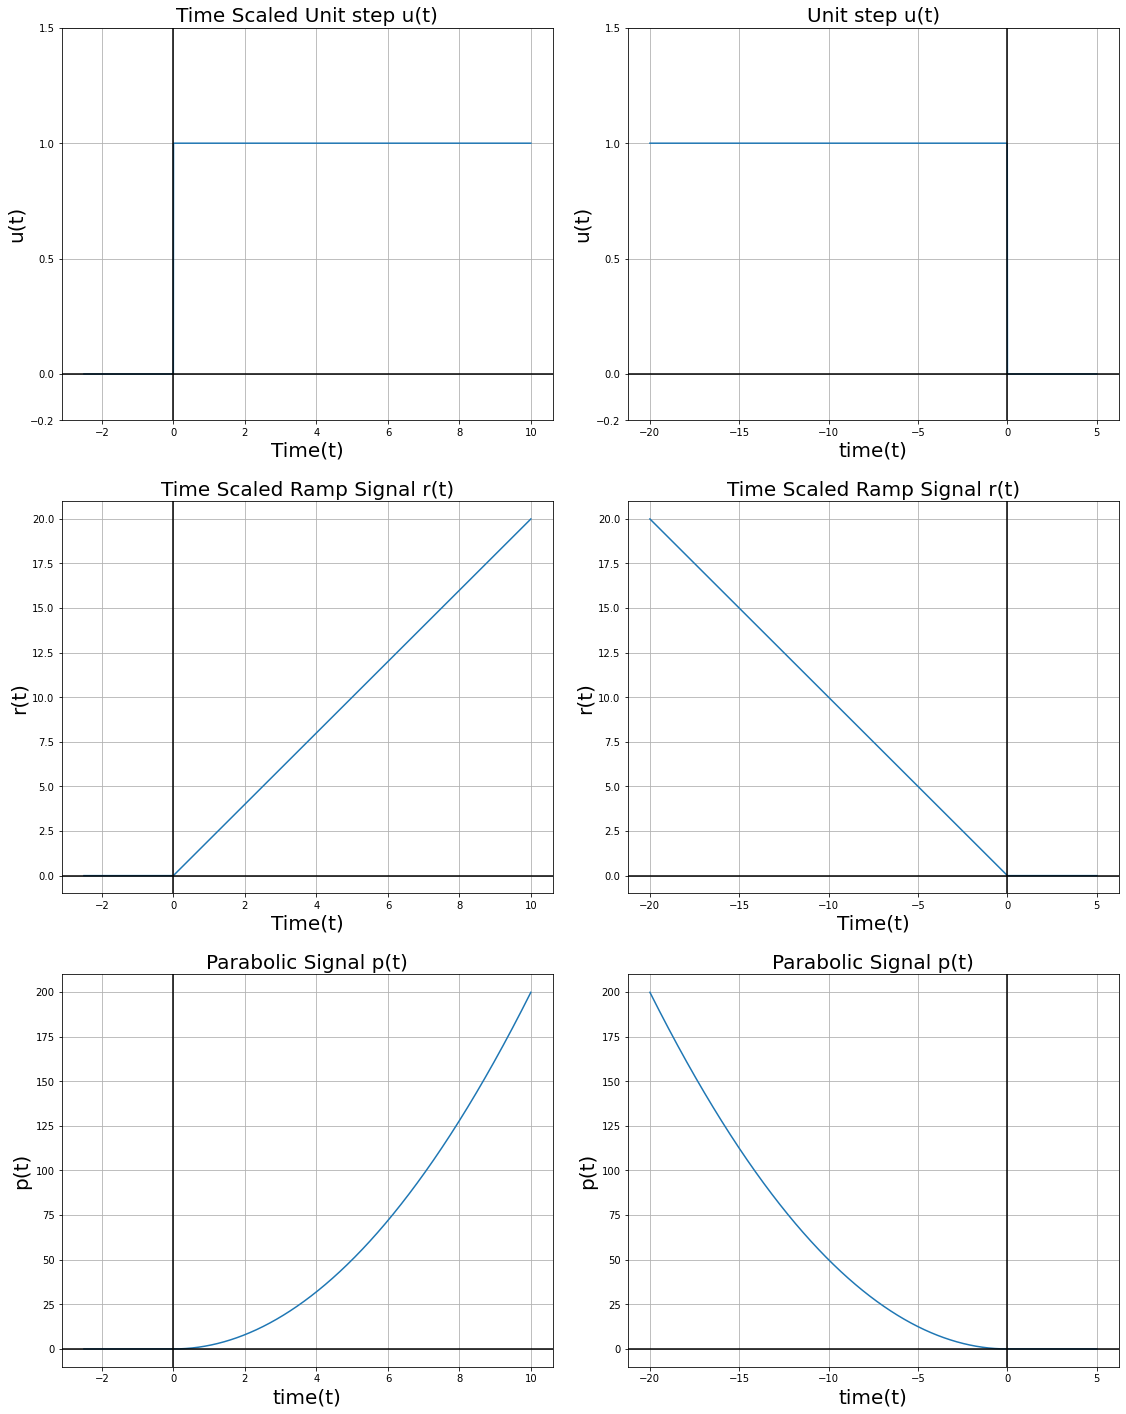

In [6]:
fig, axes = plt.subplots(3,2,figsize=(16, 20));

######################################################################################################################
######################################################################################################################

# plot time scaled unit step function u(t).
a = 1
b = 0.5
c = 0
t = np.arange(-5,20,0.01)
unit = step_function(a,c,t)
axes[0,0].plot(b*t,unit)
axes[0,0].set_xlabel('Time(t)',fontsize=20)
axes[0,0].set_yticks([-0.2,0,0.5,1,1.5])
axes[0,0].set_ylabel('u(t)',fontsize=20)
axes[0,0].set_title('Time Scaled Unit step u(t)',fontsize=20)
axes[0,0].axhline(color = "Black");
axes[0,0].axvline(color = "Black");
axes[0,0].grid()


######################################################################################################################
######################################################################################################################

# plot time scaled unit step function u(t).
a = 1
b = -1
c = 0
t = np.arange(-5,20,0.01)
unit = step_function(a,c,t)
axes[0,1].plot(b*t,unit)
axes[0,1].set_xlabel('time(t)',fontsize=20)
axes[0,1].set_yticks([-0.2,0,0.5,1,1.5])
axes[0,1].set_ylabel('u(t)',fontsize=20)
axes[0,1].set_title('Unit step u(t)',fontsize=20)
axes[0,1].axhline(color = "Black");
axes[0,1].axvline(color = "Black");
axes[0,1].grid()


######################################################################################################################
######################################################################################################################

# plot time scaled ramp function r(t).
a = 1;
b = 0.5;
c = 0;
t = np.arange(-5,20,0.01)
ramp = ramp_function(a,c,t)
axes[1,0].plot(b*t,ramp)
axes[1,0].set_xlabel('Time(t)',fontsize=20)
axes[1,0].set_ylabel('r(t)',fontsize=20)
axes[1,0].set_title('Time Scaled Ramp Signal r(t)',fontsize=20)
axes[1,0].axhline(color = "Black");
axes[1,0].axvline(color = "Black");
axes[1,0].grid()


######################################################################################################################
######################################################################################################################

# plot time scaled ramp function r(t).
a = 1;
b = -1;
c = 0;
t = np.arange(-5,20,0.01)
ramp = ramp_function(a,c,t)
axes[1,1].plot(b*t,ramp)
axes[1,1].set_xlabel('Time(t)',fontsize=20)
axes[1,1].set_ylabel('r(t)',fontsize=20)
axes[1,1].set_title('Time Scaled Ramp Signal r(t)',fontsize=20)
axes[1,1].axhline(color = "Black");
axes[1,1].axvline(color = "Black");
axes[1,1].grid()


######################################################################################################################
######################################################################################################################

# plot time scaled parabolic function p(t).
a = 1
b = 0.5
c = 0
t = np.arange(-5,20,0.01)
parabolic = parabolic_function(a,c,t)
axes[2,0].plot(b*t,parabolic)
axes[2,0].set_xlabel('time(t)',fontsize=20)
axes[2,0].set_ylabel('p(t)',fontsize=20)
axes[2,0].set_title('Parabolic Signal p(t)',fontsize=20)
axes[2,0].axhline(color = "Black");
axes[2,0].axvline(color = "Black");
axes[2,0].grid()


######################################################################################################################
######################################################################################################################

# plot time scaled parabolic function p(t).
a = 1
b = -1
c = 0
t = np.arange(-5,20,0.01)
parabolic = parabolic_function(a,c,t)
axes[2,1].plot(b*t,parabolic)
axes[2,1].set_xlabel('time(t)',fontsize=20)
axes[2,1].set_ylabel('p(t)',fontsize=20)
axes[2,1].set_title('Parabolic Signal p(t)',fontsize=20)
axes[2,1].axhline(color = "Black");
axes[2,1].axvline(color = "Black");
axes[2,1].grid()


plt.tight_layout(pad=2);

## Exponential Signals

Consider a signal of the form: x(t) = A e−B t. Plot x(t) for different values of A and B. Choose A = 10 and −10; B ∈ {−5, −2.5, −0.5, 0, 1, 3}. Plot for all combinations of A and B and understand the behaviour of exponential signals.

In [7]:
# function to generate exponential signal.
def exponential_function(A,B,t):
    exponent = []
    for sample in t:
        y = A*np.exp(-B*sample)
        exponent.append(y)
    return exponent

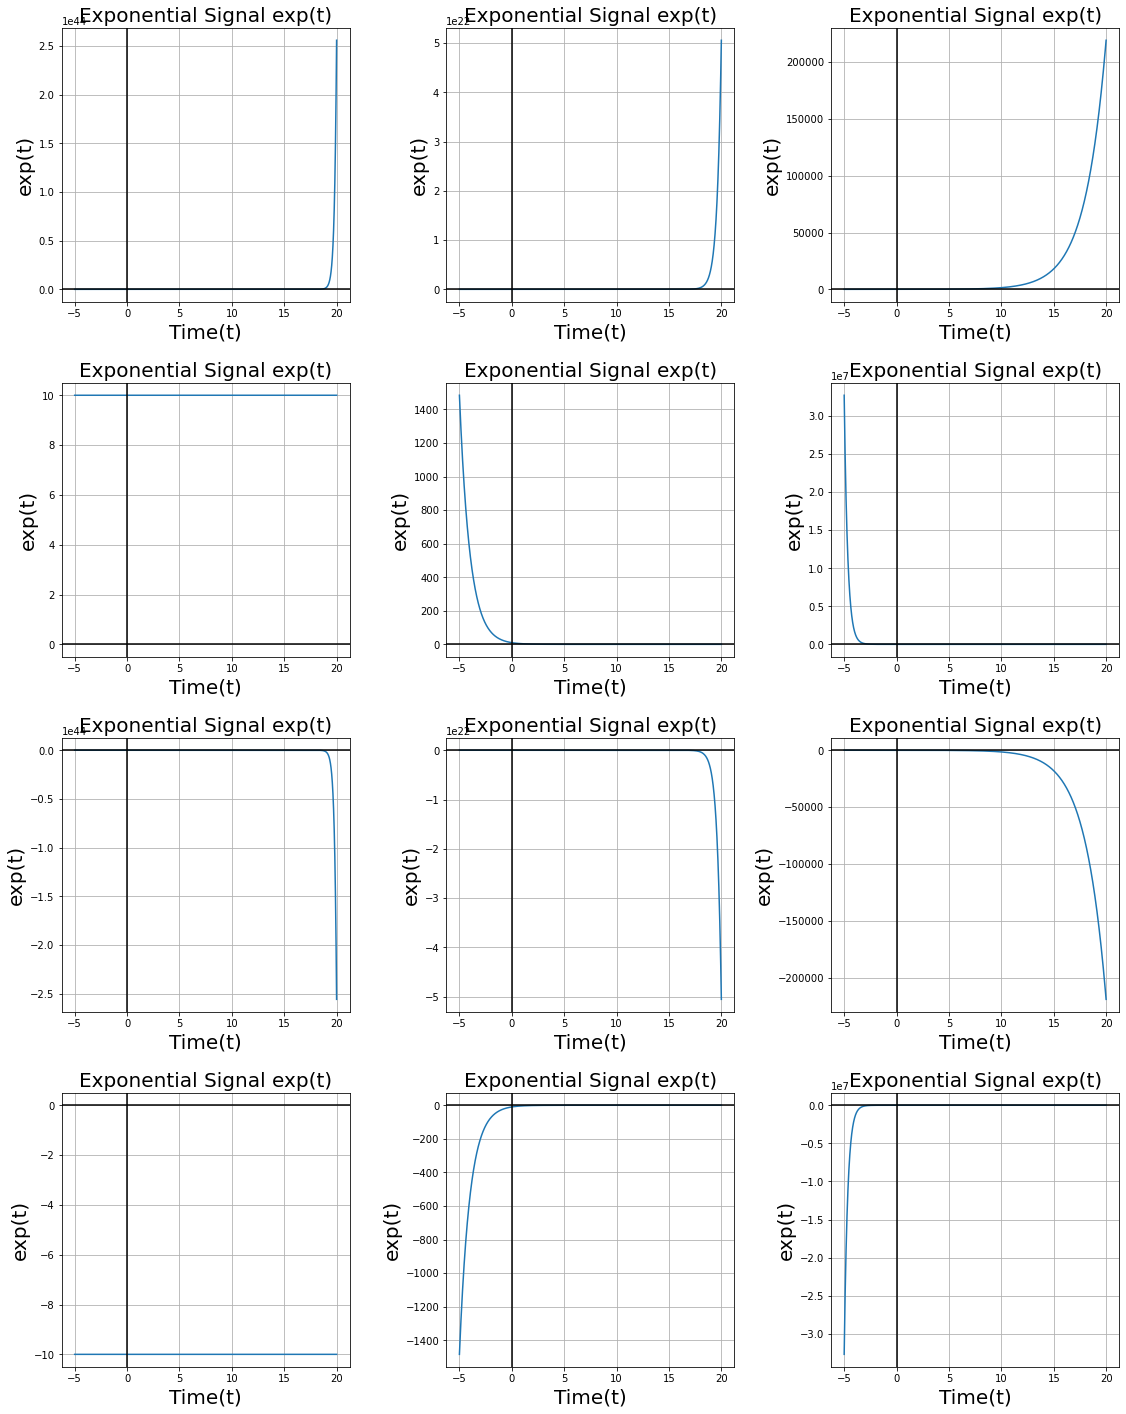

In [8]:
fig, axes = plt.subplots(4,3,figsize=(16, 20));

######################################################################################################################
######################################################################################################################

# plot exponential function exp(t).
A = 10
B = -5
t = np.arange(-5,20,0.01)
exponent = exponential_function(A,B,t)
axes[0,0].plot(t,exponent)
axes[0,0].set_xlabel('Time(t)',fontsize=20)
axes[0,0].set_ylabel('exp(t)',fontsize=20)
axes[0,0].set_title('Exponential Signal exp(t)',fontsize=20)
axes[0,0].axhline(color = "Black");
axes[0,0].axvline(color = "Black");
axes[0,0].grid()

######################################################################################################################
######################################################################################################################

# plot exponential function exp(t).
A = 10
B = -2.5
t = np.arange(-5,20,0.01)
exponent = exponential_function(A,B,t)
axes[0,1].plot(t,exponent)
axes[0,1].set_xlabel('Time(t)',fontsize=20)
axes[0,1].set_ylabel('exp(t)',fontsize=20)
axes[0,1].set_title('Exponential Signal exp(t)',fontsize=20)
axes[0,1].axhline(color = "Black");
axes[0,1].axvline(color = "Black");
axes[0,1].grid()

######################################################################################################################
######################################################################################################################

# plot exponential function exp(t).
A = 10
B = -0.5
t = np.arange(-5,20,0.01)
exponent = exponential_function(A,B,t)
axes[0,2].plot(t,exponent)
axes[0,2].set_xlabel('Time(t)',fontsize=20)
axes[0,2].set_ylabel('exp(t)',fontsize=20)
axes[0,2].set_title('Exponential Signal exp(t)',fontsize=20)
axes[0,2].axhline(color = "Black");
axes[0,2].axvline(color = "Black");
axes[0,2].grid()

######################################################################################################################
######################################################################################################################

# plot exponential function exp(t).
A = 10
B = 0
t = np.arange(-5,20,0.01)
exponent = exponential_function(A,B,t)
axes[1,0].plot(t,exponent)
axes[1,0].set_xlabel('Time(t)',fontsize=20)
axes[1,0].set_ylabel('exp(t)',fontsize=20)
axes[1,0].set_title('Exponential Signal exp(t)',fontsize=20)
axes[1,0].axhline(color = "Black");
axes[1,0].axvline(color = "Black");
axes[1,0].grid()

######################################################################################################################
######################################################################################################################

# plot exponential function exp(t).
A = 10
B = 1
t = np.arange(-5,20,0.01)
exponent = exponential_function(A,B,t)
axes[1,1].plot(t,exponent)
axes[1,1].set_xlabel('Time(t)',fontsize=20)
axes[1,1].set_ylabel('exp(t)',fontsize=20)
axes[1,1].set_title('Exponential Signal exp(t)',fontsize=20)
axes[1,1].axhline(color = "Black");
axes[1,1].axvline(color = "Black");
axes[1,1].grid()


######################################################################################################################
######################################################################################################################

# plot exponential function exp(t).
A = 10
B = 3
t = np.arange(-5,20,0.01)
exponent = exponential_function(A,B,t)
axes[1,2].plot(t,exponent)
axes[1,2].set_xlabel('Time(t)',fontsize=20)
axes[1,2].set_ylabel('exp(t)',fontsize=20)
axes[1,2].set_title('Exponential Signal exp(t)',fontsize=20)
axes[1,2].axhline(color = "Black");
axes[1,2].axvline(color = "Black");
axes[1,2].grid()

######################################################################################################################
######################################################################################################################

# plot exponential function exp(t).
A = -10
B = -5
t = np.arange(-5,20,0.01)
exponent = exponential_function(A,B,t)
axes[2,0].plot(t,exponent)
axes[2,0].set_xlabel('Time(t)',fontsize=20)
axes[2,0].set_ylabel('exp(t)',fontsize=20)
axes[2,0].set_title('Exponential Signal exp(t)',fontsize=20)
axes[2,0].axhline(color = "Black");
axes[2,0].axvline(color = "Black");
axes[2,0].grid()

######################################################################################################################
######################################################################################################################

# plot exponential function exp(t).
A = -10
B = -2.5
t = np.arange(-5,20,0.01)
exponent = exponential_function(A,B,t)
axes[2,1].plot(t,exponent)
axes[2,1].set_xlabel('Time(t)',fontsize=20)
axes[2,1].set_ylabel('exp(t)',fontsize=20)
axes[2,1].set_title('Exponential Signal exp(t)',fontsize=20)
axes[2,1].axhline(color = "Black");
axes[2,1].axvline(color = "Black");
axes[2,1].grid()

######################################################################################################################
######################################################################################################################

# plot exponential function exp(t).
A = -10
B = -0.5
t = np.arange(-5,20,0.01)
exponent = exponential_function(A,B,t)
axes[2,2].plot(t,exponent)
axes[2,2].set_xlabel('Time(t)',fontsize=20)
axes[2,2].set_ylabel('exp(t)',fontsize=20)
axes[2,2].set_title('Exponential Signal exp(t)',fontsize=20)
axes[2,2].axhline(color = "Black");
axes[2,2].axvline(color = "Black");
axes[2,2].grid()

######################################################################################################################
######################################################################################################################

# plot exponential function exp(t).
A = -10
B = 0
t = np.arange(-5,20,0.01)
exponent = exponential_function(A,B,t)
axes[3,0].plot(t,exponent)
axes[3,0].set_xlabel('Time(t)',fontsize=20)
axes[3,0].set_ylabel('exp(t)',fontsize=20)
axes[3,0].set_title('Exponential Signal exp(t)',fontsize=20)
axes[3,0].axhline(color = "Black");
axes[3,0].axvline(color = "Black");
axes[3,0].grid()

######################################################################################################################
######################################################################################################################

# plot exponential function exp(t).
A = -10
B = 1
t = np.arange(-5,20,0.01)
exponent = exponential_function(A,B,t)
axes[3,1].plot(t,exponent)
axes[3,1].set_xlabel('Time(t)',fontsize=20)
axes[3,1].set_ylabel('exp(t)',fontsize=20)
axes[3,1].set_title('Exponential Signal exp(t)',fontsize=20)
axes[3,1].axhline(color = "Black");
axes[3,1].axvline(color = "Black");
axes[3,1].grid()

######################################################################################################################
######################################################################################################################

# plot exponential function exp(t).
A = -10
B = 3
t = np.arange(-5,20,0.01)
exponent = exponential_function(A,B,t)
axes[3,2].plot(t,exponent)
axes[3,2].set_xlabel('Time(t)',fontsize=20)
axes[3,2].set_ylabel('exp(t)',fontsize=20)
axes[3,2].set_title('Exponential Signal exp(t)',fontsize=20)
axes[3,2].axhline(color = "Black");
axes[3,2].axvline(color = "Black");
axes[3,2].grid()

plt.tight_layout(pad=2);

## Complex exponential signals:
(i) Consider a signal of the form: y(t) = αe−βt cos(ω t + ϕ). Plot the signals for α = (0.5, −2), β = (−0.25, 1), ω = (π, π/4, 4π/3), and ϕ is uniformly distributed between −π and π.

In [9]:
# function to generate sinusoidal signal.
def complex_exponential(alpha,beta,omega,phi,t):
    comp_exp = [];
    for sample in t:
        y = alpha*(np.exp(-beta*sample))*np.cos((omega*sample)+phi)
        comp_exp.append(y);
    return comp_exp

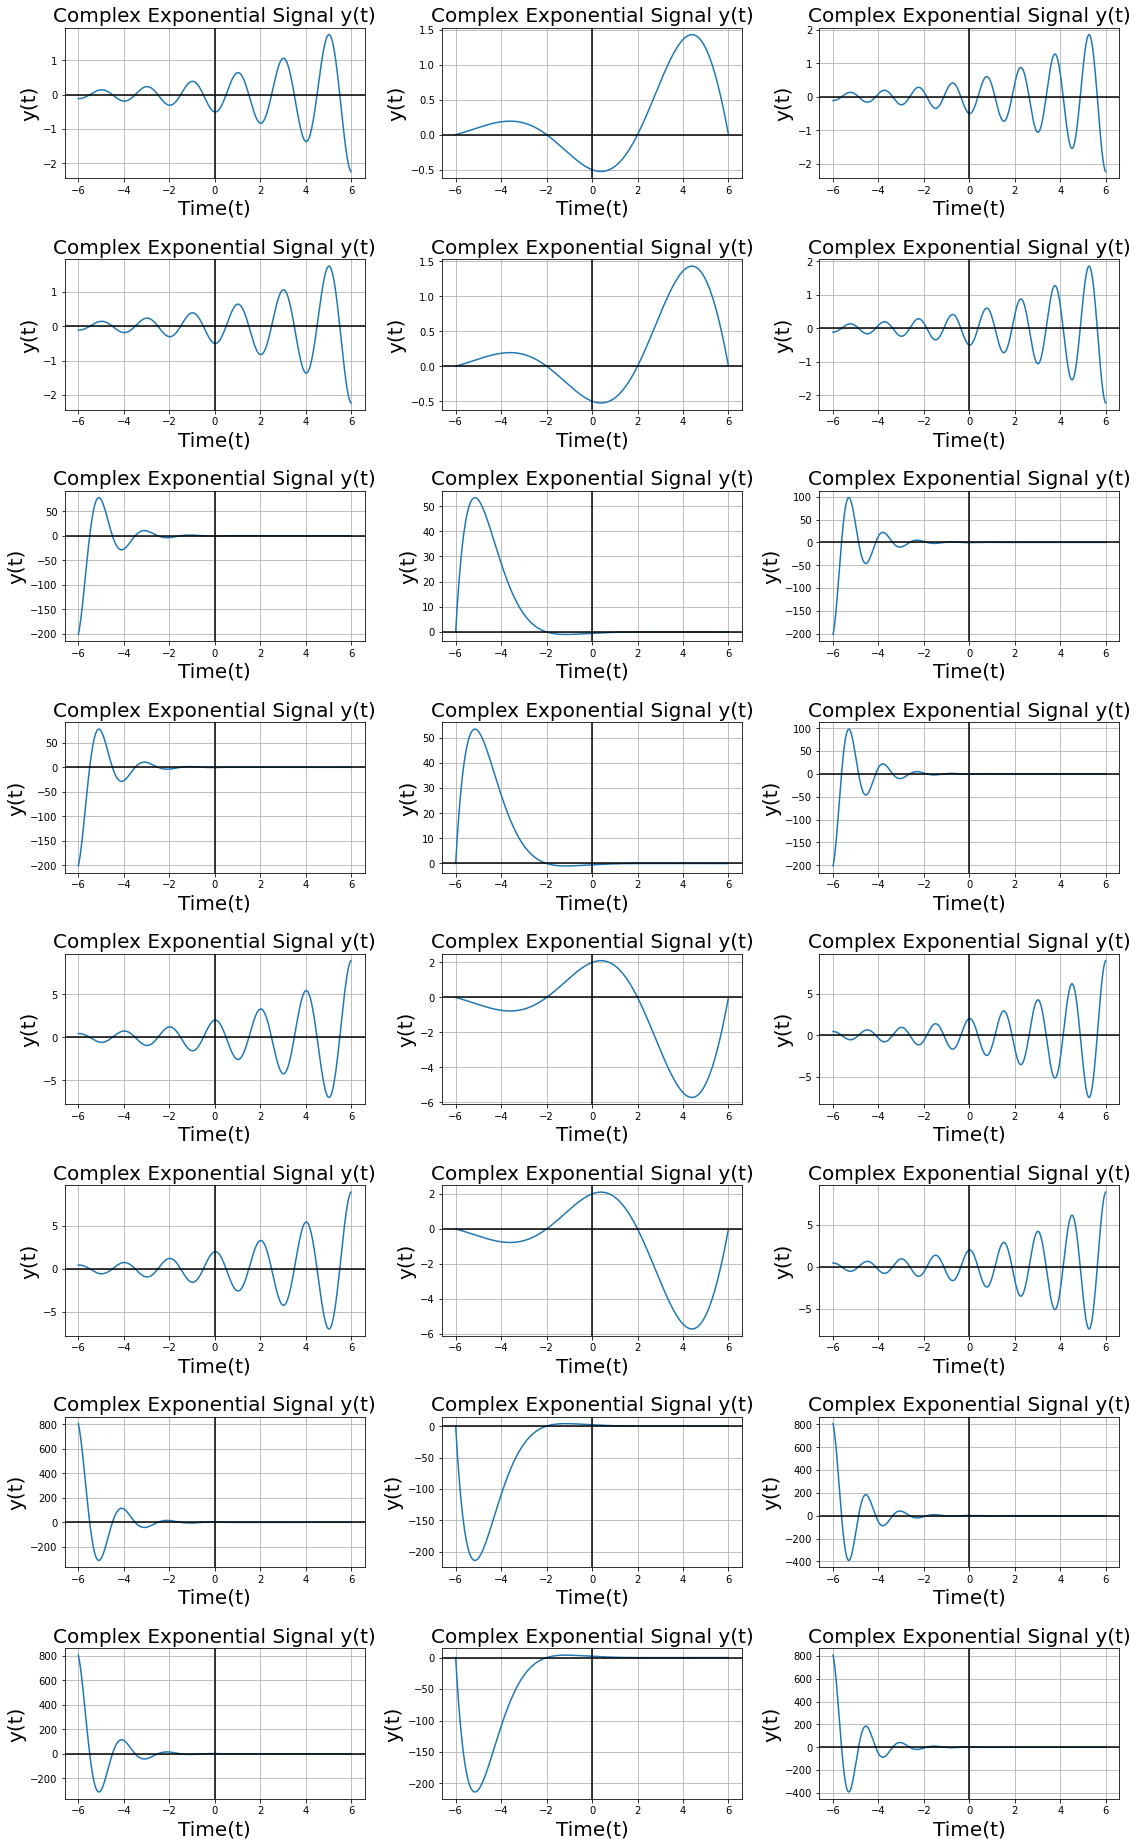

In [10]:
fig, axes = plt.subplots(8,3,figsize=(16, 26));

######################################################################################################################
######################################################################################################################

# plot complex exponential function.
t = np.arange(-6,6,0.01)
a = 0.5
b = -0.25
o = np.pi
phi = -np.pi
c_e = complex_exponential(a,b,o,phi,t)
axes[0,0].plot(t,c_e)
axes[0,0].set_xlabel('Time(t)',fontsize=20)
axes[0,0].set_ylabel('y(t)',fontsize=20)
axes[0,0].set_title('Complex Exponential Signal y(t)',fontsize=20)
axes[0,0].axhline(color = "Black");
axes[0,0].axvline(color = "Black");
axes[0,0].grid()

######################################################################################################################
######################################################################################################################

# plot complex exponential function.
t = np.arange(-6,6,0.01)
a = 0.5
b = -0.25
o = np.pi/4
phi = -np.pi
c_e = complex_exponential(a,b,o,phi,t)
axes[0,1].plot(t,c_e)
axes[0,1].set_xlabel('Time(t)',fontsize=20)
axes[0,1].set_ylabel('y(t)',fontsize=20)
axes[0,1].set_title('Complex Exponential Signal y(t)',fontsize=20)
axes[0,1].axhline(color = "Black");
axes[0,1].axvline(color = "Black");
axes[0,1].grid()

######################################################################################################################
######################################################################################################################

# plot complex exponential function.
t = np.arange(-6,6,0.01)
a = 0.5
b = -0.25
o = 4*np.pi/3
phi = -np.pi
c_e = complex_exponential(a,b,o,phi,t)
axes[0,2].plot(t,c_e)
axes[0,2].set_xlabel('Time(t)',fontsize=20)
axes[0,2].set_ylabel('y(t)',fontsize=20)
axes[0,2].set_title('Complex Exponential Signal y(t)',fontsize=20)
axes[0,2].axhline(color = "Black");
axes[0,2].axvline(color = "Black");
axes[0,2].grid()

######################################################################################################################
######################################################################################################################

# plot complex exponential function.
t = np.arange(-6,6,0.01)
a = 0.5
b = -0.25
o = np.pi
phi = np.pi
c_e = complex_exponential(a,b,o,phi,t)
axes[1,0].plot(t,c_e)
axes[1,0].set_xlabel('Time(t)',fontsize=20)
axes[1,0].set_ylabel('y(t)',fontsize=20)
axes[1,0].set_title('Complex Exponential Signal y(t)',fontsize=20)
axes[1,0].axhline(color = "Black");
axes[1,0].axvline(color = "Black");
axes[1,0].grid()

######################################################################################################################
######################################################################################################################

# plot complex exponential function.
t = np.arange(-6,6,0.01)
a = 0.5
b = -0.25
o = np.pi/4
phi = np.pi
c_e = complex_exponential(a,b,o,phi,t)
axes[1,1].plot(t,c_e)
axes[1,1].set_xlabel('Time(t)',fontsize=20)
axes[1,1].set_ylabel('y(t)',fontsize=20)
axes[1,1].set_title('Complex Exponential Signal y(t)',fontsize=20)
axes[1,1].axhline(color = "Black");
axes[1,1].axvline(color = "Black");
axes[1,1].grid()

######################################################################################################################
######################################################################################################################

# plot complex exponential function.
t = np.arange(-6,6,0.01)
a = 0.5
b = -0.25
o = 4*np.pi/3
phi = np.pi
c_e = complex_exponential(a,b,o,phi,t)
axes[1,2].plot(t,c_e)
axes[1,2].set_xlabel('Time(t)',fontsize=20)
axes[1,2].set_ylabel('y(t)',fontsize=20)
axes[1,2].set_title('Complex Exponential Signal y(t)',fontsize=20)
axes[1,2].axhline(color = "Black");
axes[1,2].axvline(color = "Black");
axes[1,2].grid()

######################################################################################################################
######################################################################################################################

# plot complex exponential function.
t = np.arange(-6,6,0.01)
a = 0.5
b = 1
o = np.pi
phi = -np.pi
c_e = complex_exponential(a,b,o,phi,t)
axes[2,0].plot(t,c_e)
axes[2,0].set_xlabel('Time(t)',fontsize=20)
axes[2,0].set_ylabel('y(t)',fontsize=20)
axes[2,0].set_title('Complex Exponential Signal y(t)',fontsize=20)
axes[2,0].axhline(color = "Black");
axes[2,0].axvline(color = "Black");
axes[2,0].grid()

######################################################################################################################
######################################################################################################################

# plot complex exponential function.
t = np.arange(-6,6,0.01)
a = 0.5
b = 1
o = np.pi/4
phi = -np.pi
c_e = complex_exponential(a,b,o,phi,t)
axes[2,1].plot(t,c_e)
axes[2,1].set_xlabel('Time(t)',fontsize=20)
axes[2,1].set_ylabel('y(t)',fontsize=20)
axes[2,1].set_title('Complex Exponential Signal y(t)',fontsize=20)
axes[2,1].axhline(color = "Black");
axes[2,1].axvline(color = "Black");
axes[2,1].grid()

######################################################################################################################
######################################################################################################################

# plot complex exponential function.
t = np.arange(-6,6,0.01)
a = 0.5
b = 1
o = 4*np.pi/3
phi = -np.pi
c_e = complex_exponential(a,b,o,phi,t)
axes[2,2].plot(t,c_e)
axes[2,2].set_xlabel('Time(t)',fontsize=20)
axes[2,2].set_ylabel('y(t)',fontsize=20)
axes[2,2].set_title('Complex Exponential Signal y(t)',fontsize=20)
axes[2,2].axhline(color = "Black");
axes[2,2].axvline(color = "Black");
axes[2,2].grid()

######################################################################################################################
######################################################################################################################

# plot complex exponential function.
t = np.arange(-6,6,0.01)
a = 0.5
b = 1
o = np.pi
phi = np.pi
c_e = complex_exponential(a,b,o,phi,t)
axes[3,0].plot(t,c_e)
axes[3,0].set_xlabel('Time(t)',fontsize=20)
axes[3,0].set_ylabel('y(t)',fontsize=20)
axes[3,0].set_title('Complex Exponential Signal y(t)',fontsize=20)
axes[3,0].axhline(color = "Black");
axes[3,0].axvline(color = "Black");
axes[3,0].grid()

######################################################################################################################
######################################################################################################################

# plot complex exponential function.
t = np.arange(-6,6,0.01)
a = 0.5
b = 1
o = np.pi/4
phi = np.pi
c_e = complex_exponential(a,b,o,phi,t)
axes[3,1].plot(t,c_e)
axes[3,1].set_xlabel('Time(t)',fontsize=20)
axes[3,1].set_ylabel('y(t)',fontsize=20)
axes[3,1].set_title('Complex Exponential Signal y(t)',fontsize=20)
axes[3,1].axhline(color = "Black");
axes[3,1].axvline(color = "Black");
axes[3,1].grid()

######################################################################################################################
######################################################################################################################

# plot complex exponential function.
t = np.arange(-6,6,0.01)
a = 0.5
b = 1
o = 4*np.pi/3
phi = np.pi
c_e = complex_exponential(a,b,o,phi,t)
axes[3,2].plot(t,c_e)
axes[3,2].set_xlabel('Time(t)',fontsize=20)
axes[3,2].set_ylabel('y(t)',fontsize=20)
axes[3,2].set_title('Complex Exponential Signal y(t)',fontsize=20)
axes[3,2].axhline(color = "Black");
axes[3,2].axvline(color = "Black");
axes[3,2].grid()

######################################################################################################################
######################################################################################################################

# plot complex exponential function.
t = np.arange(-6,6,0.01)
a = -2
b = -0.25
o = np.pi
phi = -np.pi
c_e = complex_exponential(a,b,o,phi,t)
axes[4,0].plot(t,c_e)
axes[4,0].set_xlabel('Time(t)',fontsize=20)
axes[4,0].set_ylabel('y(t)',fontsize=20)
axes[4,0].set_title('Complex Exponential Signal y(t)',fontsize=20)
axes[4,0].axhline(color = "Black");
axes[4,0].axvline(color = "Black");
axes[4,0].grid()

######################################################################################################################
######################################################################################################################

# plot complex exponential function.
t = np.arange(-6,6,0.01)
a = -2
b = -0.25
o = np.pi/4
phi = -np.pi
c_e = complex_exponential(a,b,o,phi,t)
axes[4,1].plot(t,c_e)
axes[4,1].set_xlabel('Time(t)',fontsize=20)
axes[4,1].set_ylabel('y(t)',fontsize=20)
axes[4,1].set_title('Complex Exponential Signal y(t)',fontsize=20)
axes[4,1].axhline(color = "Black");
axes[4,1].axvline(color = "Black");
axes[4,1].grid()

######################################################################################################################
######################################################################################################################

# plot complex exponential function.
t = np.arange(-6,6,0.01)
a = -2
b = -0.25
o = 4*np.pi/3
phi = -np.pi
c_e = complex_exponential(a,b,o,phi,t)
axes[4,2].plot(t,c_e)
axes[4,2].set_xlabel('Time(t)',fontsize=20)
axes[4,2].set_ylabel('y(t)',fontsize=20)
axes[4,2].set_title('Complex Exponential Signal y(t)',fontsize=20)
axes[4,2].axhline(color = "Black");
axes[4,2].axvline(color = "Black");
axes[4,2].grid()

######################################################################################################################
######################################################################################################################

# plot complex exponential function.
t = np.arange(-6,6,0.01)
a = -2
b = -0.25
o = np.pi
phi = np.pi
c_e = complex_exponential(a,b,o,phi,t)
axes[5,0].plot(t,c_e)
axes[5,0].set_xlabel('Time(t)',fontsize=20)
axes[5,0].set_ylabel('y(t)',fontsize=20)
axes[5,0].set_title('Complex Exponential Signal y(t)',fontsize=20)
axes[5,0].axhline(color = "Black");
axes[5,0].axvline(color = "Black");
axes[5,0].grid()

######################################################################################################################
######################################################################################################################

# plot complex exponential function.
t = np.arange(-6,6,0.01)
a = -2
b = -0.25
o = np.pi/4
phi = np.pi
c_e = complex_exponential(a,b,o,phi,t)
axes[5,1].plot(t,c_e)
axes[5,1].set_xlabel('Time(t)',fontsize=20)
axes[5,1].set_ylabel('y(t)',fontsize=20)
axes[5,1].set_title('Complex Exponential Signal y(t)',fontsize=20)
axes[5,1].axhline(color = "Black");
axes[5,1].axvline(color = "Black");
axes[5,1].grid()

######################################################################################################################
######################################################################################################################

# plot complex exponential function.
t = np.arange(-6,6,0.01)
a = -2
b = -0.25
o = 4*np.pi/3
phi = np.pi
c_e = complex_exponential(a,b,o,phi,t)
axes[5,2].plot(t,c_e)
axes[5,2].set_xlabel('Time(t)',fontsize=20)
axes[5,2].set_ylabel('y(t)',fontsize=20)
axes[5,2].set_title('Complex Exponential Signal y(t)',fontsize=20)
axes[5,2].axhline(color = "Black");
axes[5,2].axvline(color = "Black");
axes[5,2].grid()

######################################################################################################################
######################################################################################################################

# plot complex exponential function.
t = np.arange(-6,6,0.01)
a = -2
b = 1
o = np.pi
phi = -np.pi
c_e = complex_exponential(a,b,o,phi,t)
axes[6,0].plot(t,c_e)
axes[6,0].set_xlabel('Time(t)',fontsize=20)
axes[6,0].set_ylabel('y(t)',fontsize=20)
axes[6,0].set_title('Complex Exponential Signal y(t)',fontsize=20)
axes[6,0].axhline(color = "Black");
axes[6,0].axvline(color = "Black");
axes[6,0].grid()

######################################################################################################################
######################################################################################################################

# plot complex exponential function.
t = np.arange(-6,6,0.01)
a = -2
b = 1
o = np.pi/4
phi = -np.pi
c_e = complex_exponential(a,b,o,phi,t)
axes[6,1].plot(t,c_e)
axes[6,1].set_xlabel('Time(t)',fontsize=20)
axes[6,1].set_ylabel('y(t)',fontsize=20)
axes[6,1].set_title('Complex Exponential Signal y(t)',fontsize=20)
axes[6,1].axhline(color = "Black");
axes[6,1].axvline(color = "Black");
axes[6,1].grid()

######################################################################################################################
######################################################################################################################

# plot complex exponential function.
t = np.arange(-6,6,0.01)
a = -2
b = 1
o = 4*np.pi/3
phi = -np.pi
c_e = complex_exponential(a,b,o,phi,t)
axes[6,2].plot(t,c_e)
axes[6,2].set_xlabel('Time(t)',fontsize=20)
axes[6,2].set_ylabel('y(t)',fontsize=20)
axes[6,2].set_title('Complex Exponential Signal y(t)',fontsize=20)
axes[6,2].axhline(color = "Black");
axes[6,2].axvline(color = "Black");
axes[6,2].grid()

######################################################################################################################
######################################################################################################################

# plot complex exponential function.
t = np.arange(-6,6,0.01)
a = -2
b = 1
o = np.pi
phi = np.pi
c_e = complex_exponential(a,b,o,phi,t)
axes[7,0].plot(t,c_e)
axes[7,0].set_xlabel('Time(t)',fontsize=20)
axes[7,0].set_ylabel('y(t)',fontsize=20)
axes[7,0].set_title('Complex Exponential Signal y(t)',fontsize=20)
axes[7,0].axhline(color = "Black");
axes[7,0].axvline(color = "Black");
axes[7,0].grid()

######################################################################################################################
######################################################################################################################

# plot complex exponential function.
t = np.arange(-6,6,0.01)
a = -2
b = 1
o = np.pi/4
phi = np.pi
c_e = complex_exponential(a,b,o,phi,t)
axes[7,1].plot(t,c_e)
axes[7,1].set_xlabel('Time(t)',fontsize=20)
axes[7,1].set_ylabel('y(t)',fontsize=20)
axes[7,1].set_title('Complex Exponential Signal y(t)',fontsize=20)
axes[7,1].axhline(color = "Black");
axes[7,1].axvline(color = "Black");
axes[7,1].grid()

######################################################################################################################
######################################################################################################################

# plot complex exponential function.
t = np.arange(-6,6,0.01)
a = -2
b = 1
o = 4*np.pi/3
phi = np.pi
c_e = complex_exponential(a,b,o,phi,t)
axes[7,2].plot(t,c_e)
axes[7,2].set_xlabel('Time(t)',fontsize=20)
axes[7,2].set_ylabel('y(t)',fontsize=20)
axes[7,2].set_title('Complex Exponential Signal y(t)',fontsize=20)
axes[7,2].axhline(color = "Black");
axes[7,2].axvline(color = "Black");
axes[7,2].grid()


plt.tight_layout(pad=2);

(ii) Consider a signal of the form: y(t) = αej(ωt+ϕ). Plot Re(y(t)), Im(y(t)), |y(t)|, ∠y(t) when (α, ω, ϕ) = (1,0.14π, −π/3), (2, 0.34π, −π/2), and (2, 0.75π, π).

In [11]:
# function to generate real part of complex exponential signal.
def real_value_function(alpha,omega,phi,t):
    cosine = []
    for sample in t:
        y = alpha*np.cos((omega*sample)+phi)
        cosine.append(y)
    return cosine


# function to generate imaginary part of complex exponential signal.
def imaginary_value_function(alpha,omega,phi,t):
    sine = []
    for sample in t:
        y = alpha*np.sin((omega*sample)+phi)
        sine.append(y)
    return sine


# function to generate megnitude of complex exponential signal.
def magnitude_function(alpha,omega,phi,t):
    mag_exp = [];
    for sample in t:
        y = alpha*(np.exp(1j*((omega*sample)+phi)))
        mag_exp.append(y);
    return np.abs(mag_exp)


# function to generate angle of complex exponential signal.
def angle_function(alpha,omega,phi,t):
    ang_exp = [];
    for sample in t:
        y = alpha*(np.exp(1j*((omega*sample)+phi)))
        ang_exp.append(y);
    return np.angle(ang_exp)

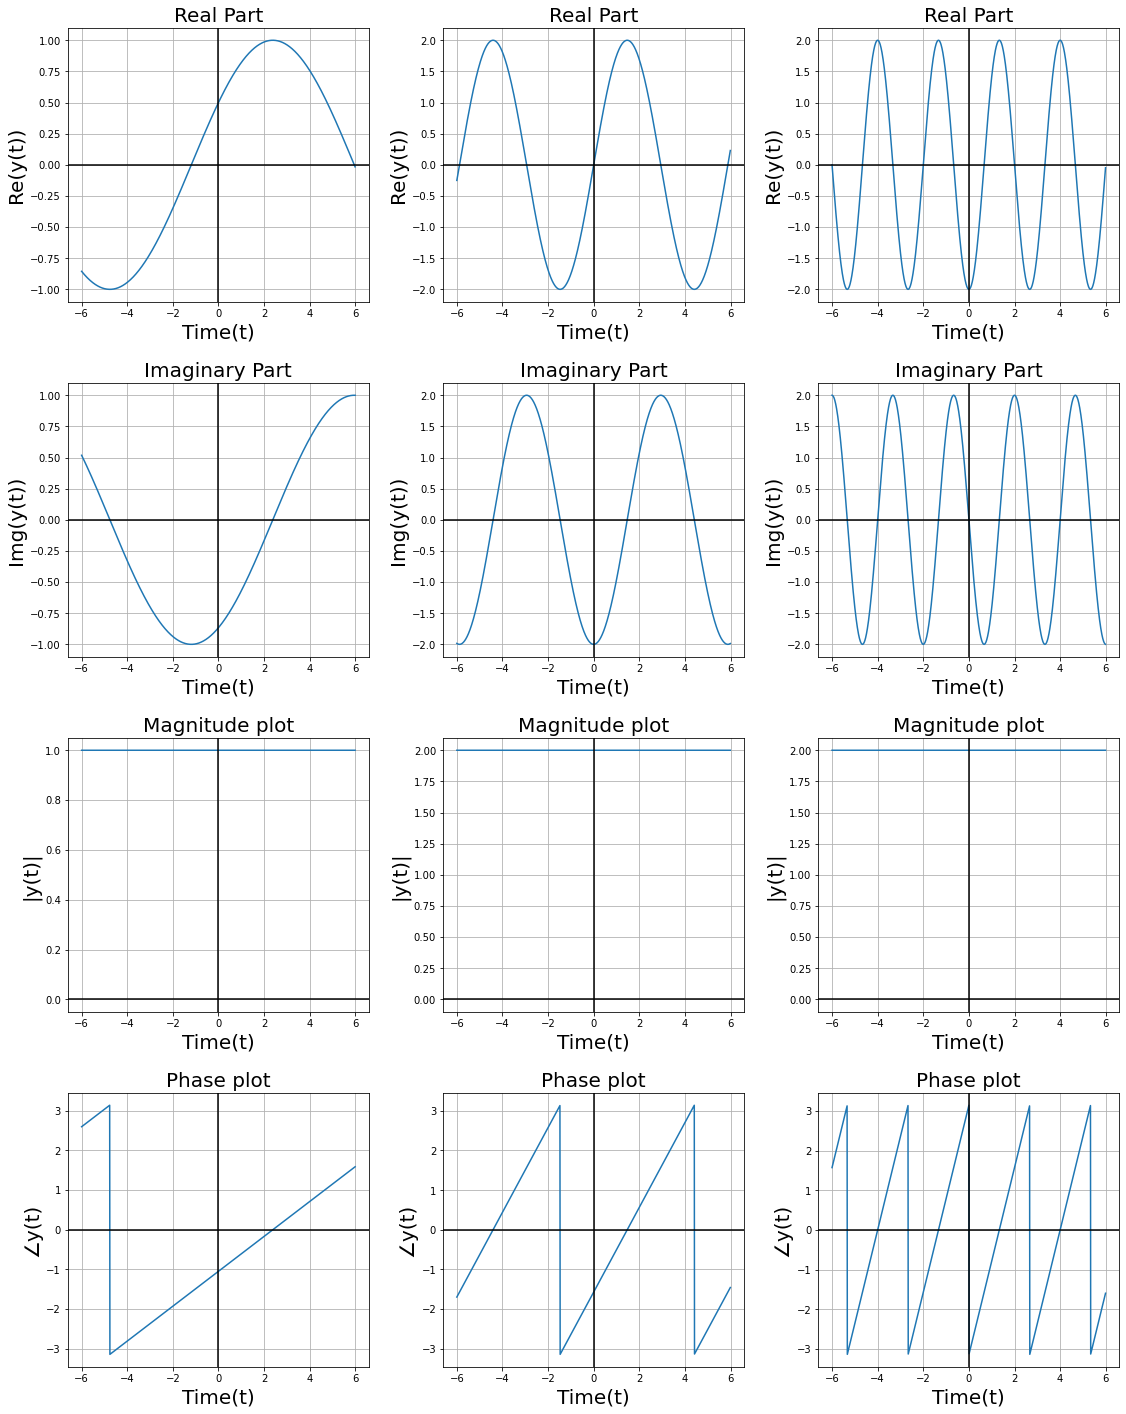

In [12]:
fig, axes = plt.subplots(4,3,figsize=(16, 20));

######################################################################################################################
######################################################################################################################

t = np.arange(-6,6,0.01)
a = 1
o = 0.14*np.pi
phi = -np.pi/3

# Real part plot complex exponential function.
re = real_value_function(a,o,phi,t)
axes[0,0].plot(t,re)
axes[0,0].set_xlabel('Time(t)',fontsize=20)
axes[0,0].set_ylabel('Re(y(t))',fontsize=20)
axes[0,0].set_title('Real Part',fontsize=20)
axes[0,0].axhline(color = "Black");
axes[0,0].axvline(color = "Black");
axes[0,0].grid()


# Imaginary part plot complex exponential function.
img = imaginary_value_function(a,o,phi,t)
axes[1,0].plot(t,img)
axes[1,0].set_xlabel('Time(t)',fontsize=20)
axes[1,0].set_ylabel('Img(y(t))',fontsize=20)
axes[1,0].set_title('Imaginary Part',fontsize=20)
axes[1,0].axhline(color = "Black");
axes[1,0].axvline(color = "Black");
axes[1,0].grid()


# Magnitude plot complex exponential function.
mag = magnitude_function(a,o,phi,t)
axes[2,0].plot(t,mag)
axes[2,0].set_xlabel('Time(t)',fontsize=20)
axes[2,0].set_ylabel('|y(t)|',fontsize=20)
axes[2,0].set_title('Magnitude plot',fontsize=20)
axes[2,0].axhline(color = "Black");
axes[2,0].axvline(color = "Black");
axes[2,0].grid()


# Angle plot complex exponential function.
ang = angle_function(a,o,phi,t)
axes[3,0].plot(t,ang)
axes[3,0].set_xlabel('Time(t)',fontsize=20)
axes[3,0].set_ylabel('∠y(t)',fontsize=20)
axes[3,0].set_title('Phase plot',fontsize=20)
axes[3,0].axhline(color = "Black");
axes[3,0].axvline(color = "Black");
axes[3,0].grid()

######################################################################################################################
######################################################################################################################

t = np.arange(-6,6,0.01)
a = 2
o = 0.34*np.pi
phi = -np.pi/2

# Real part plot complex exponential function.
re = real_value_function(a,o,phi,t)
axes[0,1].plot(t,re)
axes[0,1].set_xlabel('Time(t)',fontsize=20)
axes[0,1].set_ylabel('Re(y(t))',fontsize=20)
axes[0,1].set_title('Real Part',fontsize=20)
axes[0,1].axhline(color = "Black");
axes[0,1].axvline(color = "Black");
axes[0,1].grid()


# Imaginary part plot complex exponential function.
img = imaginary_value_function(a,o,phi,t)
axes[1,1].plot(t,img)
axes[1,1].set_xlabel('Time(t)',fontsize=20)
axes[1,1].set_ylabel('Img(y(t))',fontsize=20)
axes[1,1].set_title('Imaginary Part',fontsize=20)
axes[1,1].axhline(color = "Black");
axes[1,1].axvline(color = "Black");
axes[1,1].grid()


# Magnitude plot complex exponential function.
mag = magnitude_function(a,o,phi,t)
axes[2,1].plot(t,mag)
axes[2,1].set_xlabel('Time(t)',fontsize=20)
axes[2,1].set_ylabel('|y(t)|',fontsize=20)
axes[2,1].set_title('Magnitude plot',fontsize=20)
axes[2,1].axhline(color = "Black");
axes[2,1].axvline(color = "Black");
axes[2,1].grid()


# Angle plot complex exponential function.
ang = angle_function(a,o,phi,t)
axes[3,1].plot(t,ang)
axes[3,1].set_xlabel('Time(t)',fontsize=20)
axes[3,1].set_ylabel('∠y(t)',fontsize=20)
axes[3,1].set_title('Phase plot',fontsize=20)
axes[3,1].axhline(color = "Black");
axes[3,1].axvline(color = "Black");
axes[3,1].grid()

######################################################################################################################
######################################################################################################################

t = np.arange(-6,6,0.01)
a = 2
o = 0.75*np.pi
phi = np.pi

# Real part plot complex exponential function.
re = real_value_function(a,o,phi,t)
axes[0,2].plot(t,re)
axes[0,2].set_xlabel('Time(t)',fontsize=20)
axes[0,2].set_ylabel('Re(y(t))',fontsize=20)
axes[0,2].set_title('Real Part',fontsize=20)
axes[0,2].axhline(color = "Black");
axes[0,2].axvline(color = "Black");
axes[0,2].grid()


# Imaginary part plot complex exponential function.
img = imaginary_value_function(a,o,phi,t)
axes[1,2].plot(t,img)
axes[1,2].set_xlabel('Time(t)',fontsize=20)
axes[1,2].set_ylabel('Img(y(t))',fontsize=20)
axes[1,2].set_title('Imaginary Part',fontsize=20)
axes[1,2].axhline(color = "Black");
axes[1,2].axvline(color = "Black");
axes[1,2].grid()


# Magnitude plot complex exponential function.
mag = magnitude_function(a,o,phi,t)
axes[2,2].plot(t,mag)
axes[2,2].set_xlabel('Time(t)',fontsize=20)
axes[2,2].set_ylabel('|y(t)|',fontsize=20)
axes[2,2].set_title('Magnitude plot',fontsize=20)
axes[2,2].axhline(color = "Black");
axes[2,2].axvline(color = "Black");
axes[2,2].grid()


# Angle plot complex exponential function.
ang = angle_function(a,o,phi,t)
axes[3,2].plot(t,ang)
axes[3,2].set_xlabel('Time(t)',fontsize=20)
axes[3,2].set_ylabel('∠y(t)',fontsize=20)
axes[3,2].set_title('Phase plot',fontsize=20)
axes[3,2].axhline(color = "Black");
axes[3,2].axvline(color = "Black");
axes[3,2].grid()


plt.tight_layout(pad=2);

## Sinusoidal signals:

                           x1(t) = sin(πt);
                           x2(t) = 2sin (2πt); 
                           x3(t) = 4sin(2πt/3);
                           x4(t) = 3cos(πt/4);
                           x5(t) = 3cos(2πt+π/4);
                           x6(t) = x1(-t) + x2(t);
                           x7(t) = x4(t) + x5(t);
                           x8(t) = x2(-t) + x4(t);
                           x9(t) = x3(-t) - x5(-t);

In [13]:
# function to generate sinusoidal signal.
def x_1(t):
    x1 = []
    for sample in t:
        y = np.sin(np.pi*sample)
        x1.append(y)
    return x1

######################################################################################################################
######################################################################################################################

# function to generate sinusoidal signal.
def x_2(t):
    x2 = []
    for sample in t:
        y = 2*np.sin(2*np.pi*sample)
        x2.append(y)
    return x2

######################################################################################################################
######################################################################################################################

# function to generate sinusoidal signal.
def x_3(t):
    x3 = []
    for sample in t:
        y = 4*np.sin(2*np.pi*sample/3)
        x3.append(y)
    return x3

######################################################################################################################
######################################################################################################################

# function to generate sinusoidal signal.
def x_4(t):
    x4 = []
    for sample in t:
        y = 3*np.cos(np.pi*sample/4)
        x4.append(y)
    return x4

######################################################################################################################
######################################################################################################################

# function to generate sinusoidal signal.
def x_5(t):
    x5 = []
    for sample in t:
        y = 3*np.cos((2*np.pi*sample)+(np.pi/4))
        x5.append(y)
    return x5

######################################################################################################################
######################################################################################################################

# function to generate sinusoidal signal.
def x_6(t):
    x6 = []
    x1 = x_1(-t) 
    x2 = x_2(t)
    for i in range(len(x1)):
        x6.append(x1[i]+x2[i])
    return x6

######################################################################################################################
######################################################################################################################

# function to generate sinusoidal signal.
def x_7(t):
    x7 = []
    x4 = x_4(t) 
    x5 = x_5(t)
    for i in range(len(x4)):
        x7.append(x4[i]+x5[i])
    return x7

######################################################################################################################
######################################################################################################################

# function to generate sinusoidal signal.
def x_8(t):
    x8 = []
    x2 = x_2(-t) 
    x4 = x_4(t)
    for i in range(len(x2)):
        x8.append(x2[i]+x4[i])
    return x8

######################################################################################################################
######################################################################################################################

# function to generate sinusoidal signal.
def x_9(t):
    x9 = []
    x3 = x_3(-t) 
    x5 = x_5(-t)
    for i in range(len(x3)):
        x9.append(x3[i]-x5[i])
    return x9

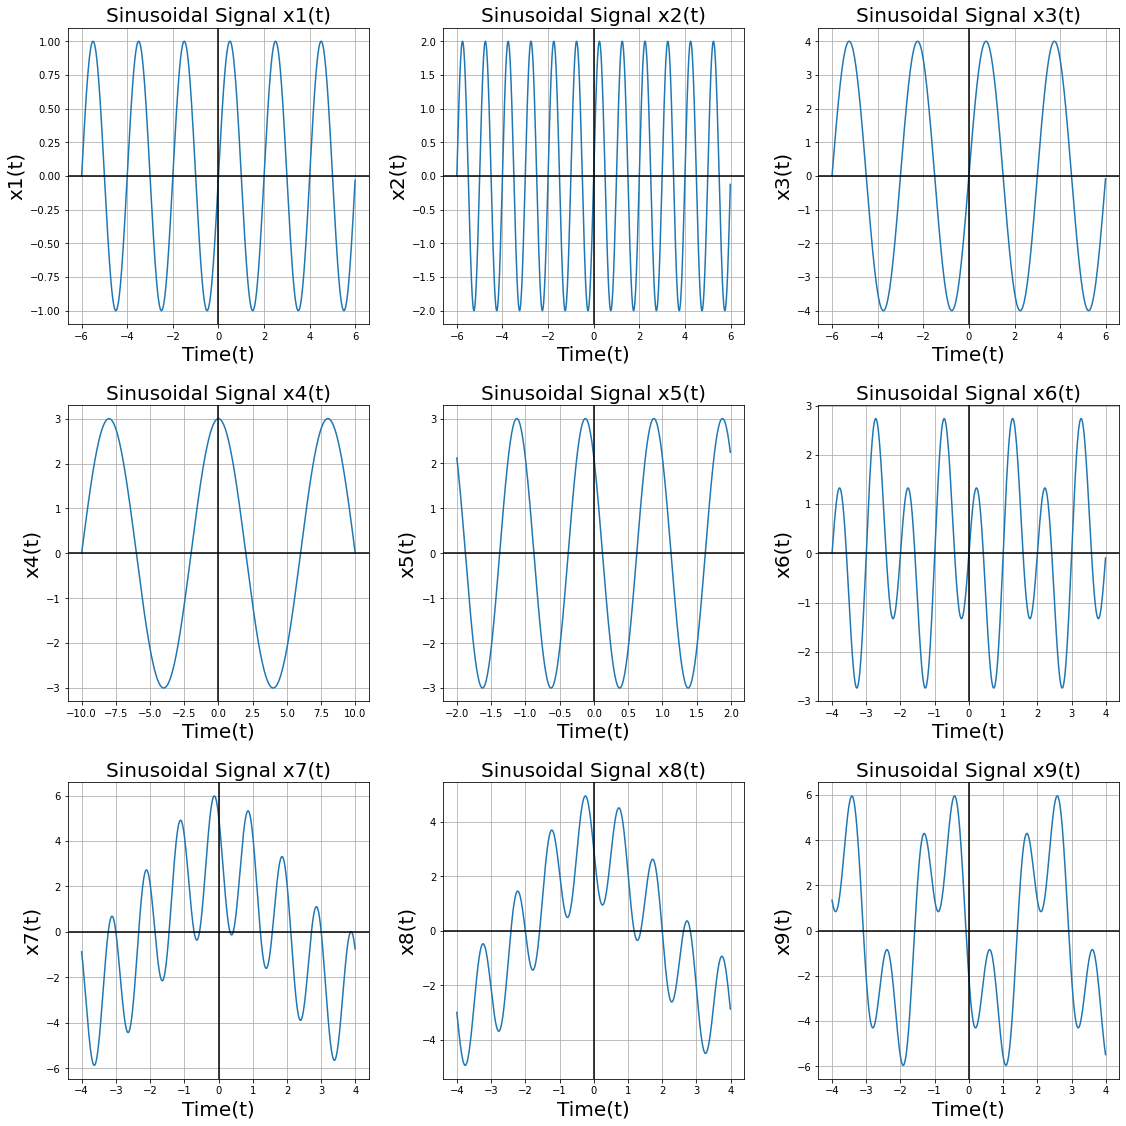

In [14]:
fig, axes = plt.subplots(3,3,figsize=(16, 16));


######################################################################################################################
######################################################################################################################

# plot sinusoidal function x1(t).
t = np.arange(-6,6,0.01)
x1 = x_1(t)
axes[0,0].plot(t,x1)
axes[0,0].set_xlabel('Time(t)',fontsize=20)
axes[0,0].set_ylabel('x1(t)',fontsize=20)
axes[0,0].set_title('Sinusoidal Signal x1(t)',fontsize=20)
axes[0,0].axhline(color = "Black");
axes[0,0].axvline(color = "Black");
axes[0,0].grid()


######################################################################################################################
######################################################################################################################

# plot sinusoidal function x2(t).
t = np.arange(-6,6,0.01)
x2 = x_2(t)
axes[0,1].plot(t,x2)
axes[0,1].set_xlabel('Time(t)',fontsize=20)
axes[0,1].set_ylabel('x2(t)',fontsize=20)
axes[0,1].set_title('Sinusoidal Signal x2(t)',fontsize=20)
axes[0,1].axhline(color = "Black");
axes[0,1].axvline(color = "Black");
axes[0,1].grid()


######################################################################################################################
######################################################################################################################

# plot sinusoidal function x3(t).
t = np.arange(-6,6,0.01)
x3 = x_3(t)
axes[0,2].plot(t,x3)
axes[0,2].set_xlabel('Time(t)',fontsize=20)
axes[0,2].set_ylabel('x3(t)',fontsize=20)
axes[0,2].set_title('Sinusoidal Signal x3(t)',fontsize=20)
axes[0,2].axhline(color = "Black");
axes[0,2].axvline(color = "Black");
axes[0,2].grid()

######################################################################################################################
######################################################################################################################

# plot sinusoidal function x4(t).
t = np.arange(-10,10,0.01)
x4 = x_4(t)
axes[1,0].plot(t,x4)
axes[1,0].set_xlabel('Time(t)',fontsize=20)
axes[1,0].set_ylabel('x4(t)',fontsize=20)
axes[1,0].set_title('Sinusoidal Signal x4(t)',fontsize=20)
axes[1,0].axhline(color = "Black");
axes[1,0].axvline(color = "Black");
axes[1,0].grid()


######################################################################################################################
######################################################################################################################

# plot sinusoidal function x5(t).
t = np.arange(-2,2,0.01)
x5 = x_5(t)
axes[1,1].plot(t,x5)
axes[1,1].set_xlabel('Time(t)',fontsize=20)
axes[1,1].set_ylabel('x5(t)',fontsize=20)
axes[1,1].set_title('Sinusoidal Signal x5(t)',fontsize=20)
axes[1,1].axhline(color = "Black");
axes[1,1].axvline(color = "Black");
axes[1,1].grid()


######################################################################################################################
######################################################################################################################

# plot sinusoidal function x6(t).
t = np.arange(-4,4,0.01)
x6 = x_6(t)
axes[1,2].plot(t,x6)
axes[1,2].set_xlabel('Time(t)',fontsize=20)
axes[1,2].set_ylabel('x6(t)',fontsize=20)
axes[1,2].set_title('Sinusoidal Signal x6(t)',fontsize=20)
axes[1,2].axhline(color = "Black");
axes[1,2].axvline(color = "Black");
axes[1,2].grid()


######################################################################################################################
######################################################################################################################

# plot sinusoidal function x7(t).
t = np.arange(-4,4,0.01)
x7 = x_7(t)
axes[2,0].plot(t,x7)
axes[2,0].set_xlabel('Time(t)',fontsize=20)
axes[2,0].set_ylabel('x7(t)',fontsize=20)
axes[2,0].set_title('Sinusoidal Signal x7(t)',fontsize=20)
axes[2,0].axhline(color = "Black");
axes[2,0].axvline(color = "Black");
axes[2,0].grid()


######################################################################################################################
######################################################################################################################

# plot sinusoidal function x8(t).
t = np.arange(-4,4,0.01)
x8 = x_8(t)
axes[2,1].plot(t,x8)
axes[2,1].set_xlabel('Time(t)',fontsize=20)
axes[2,1].set_ylabel('x8(t)',fontsize=20)
axes[2,1].set_title('Sinusoidal Signal x8(t)',fontsize=20)
axes[2,1].axhline(color = "Black");
axes[2,1].axvline(color = "Black");
axes[2,1].grid()


######################################################################################################################
######################################################################################################################

# plot sinusoidal function x9(t).
t = np.arange(-4,4,0.01)
x9 = x_9(t)
axes[2,2].plot(t,x9)
axes[2,2].set_xlabel('Time(t)',fontsize=20)
axes[2,2].set_ylabel('x9(t)',fontsize=20)
axes[2,2].set_title('Sinusoidal Signal x9(t)',fontsize=20)
axes[2,2].axhline(color = "Black");
axes[2,2].axvline(color = "Black");
axes[2,2].grid()


plt.tight_layout(pad=2);

Determine the power and energy of exponential, complex exponential and sinusoidal signals.

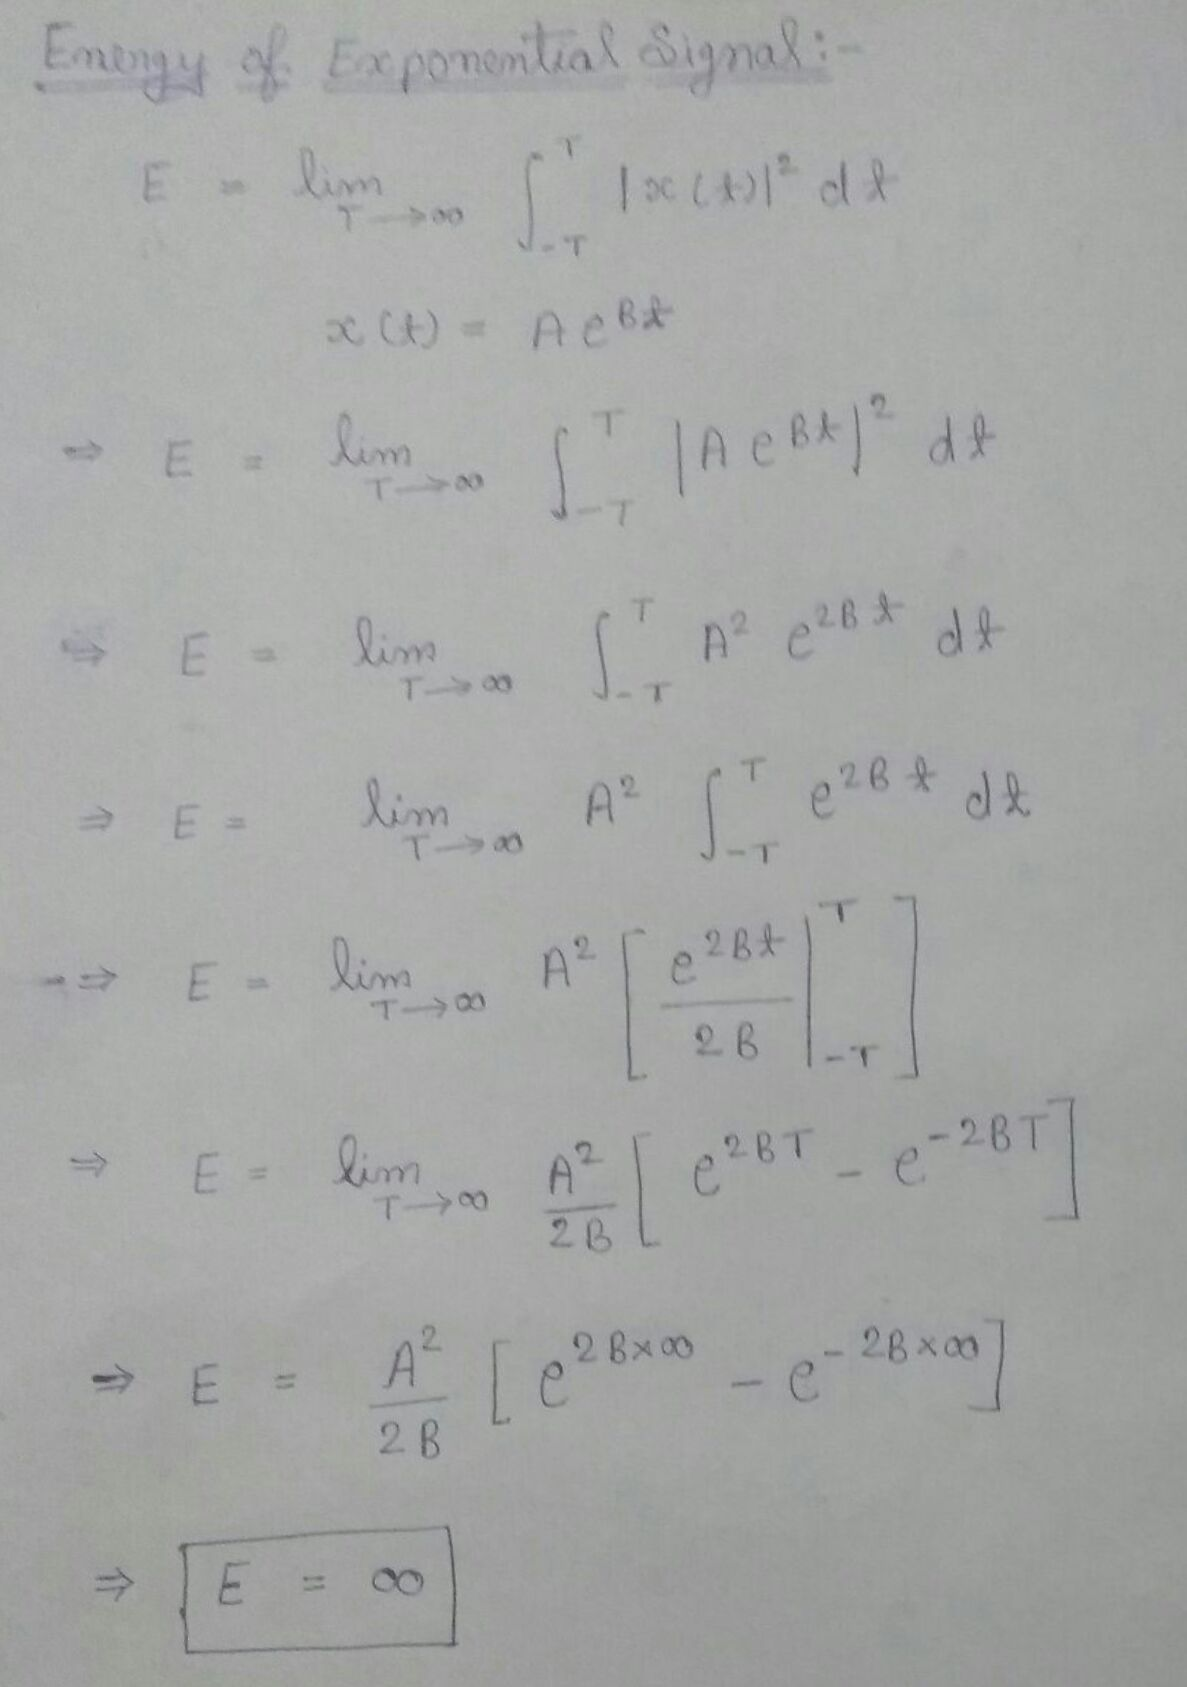


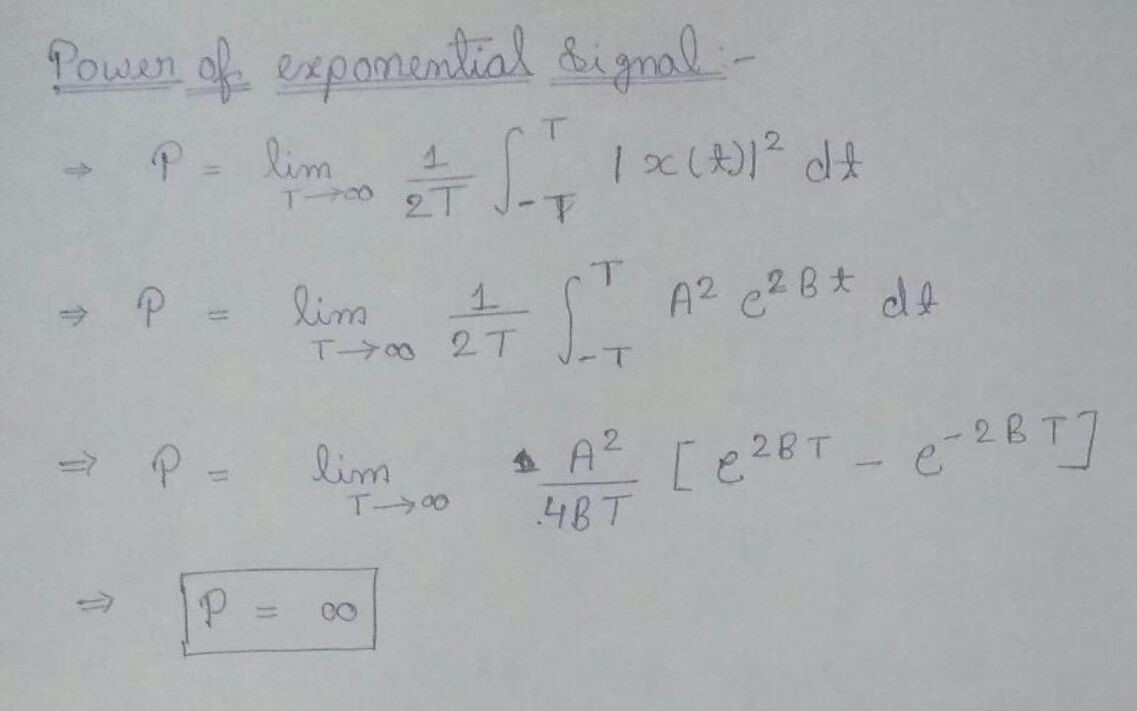

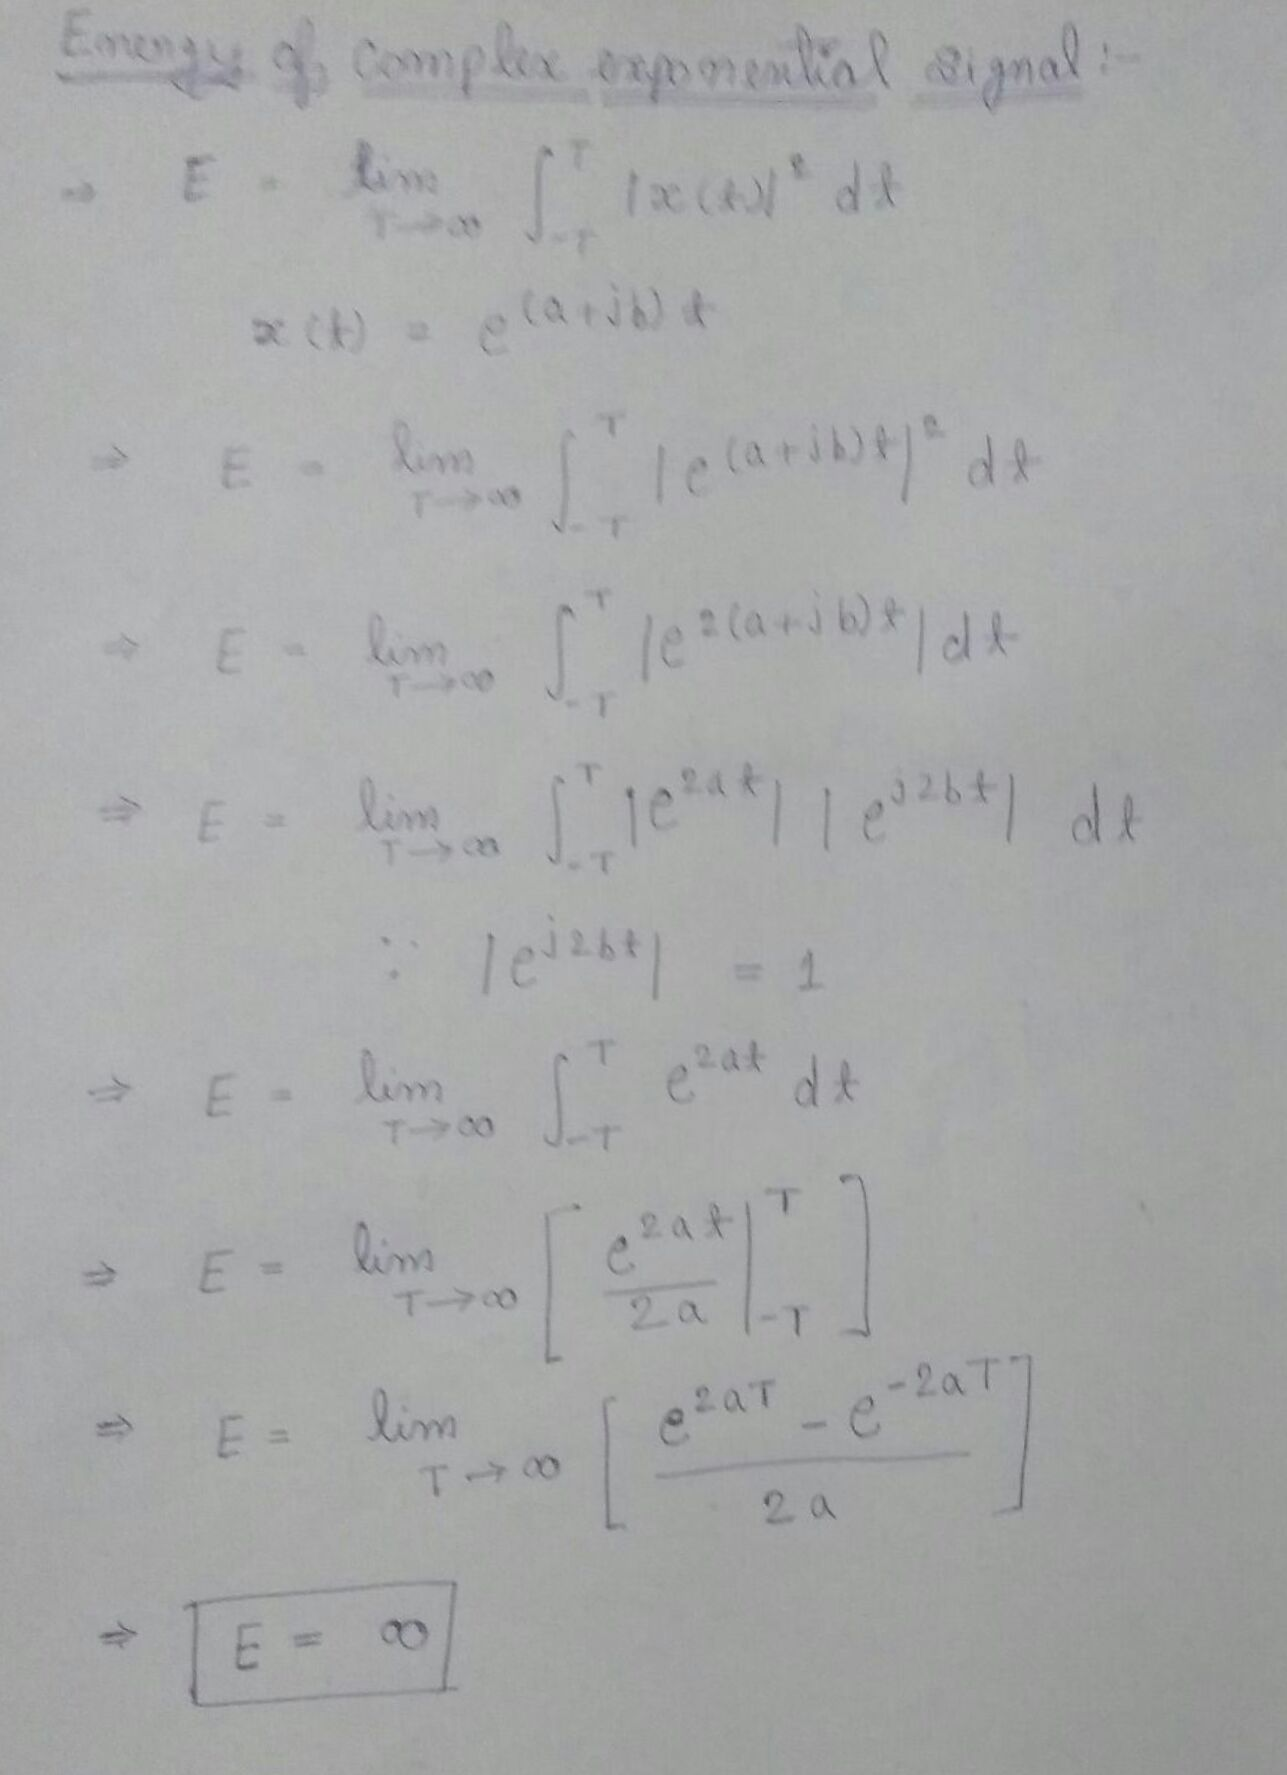

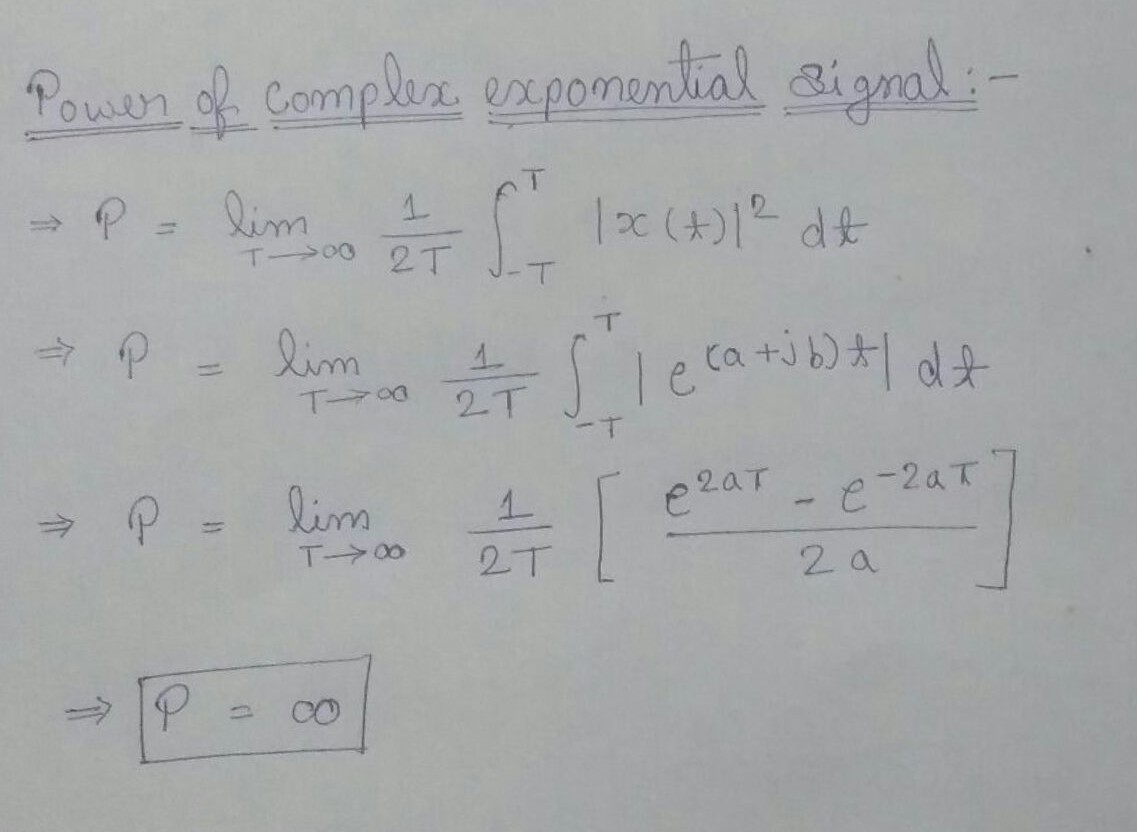

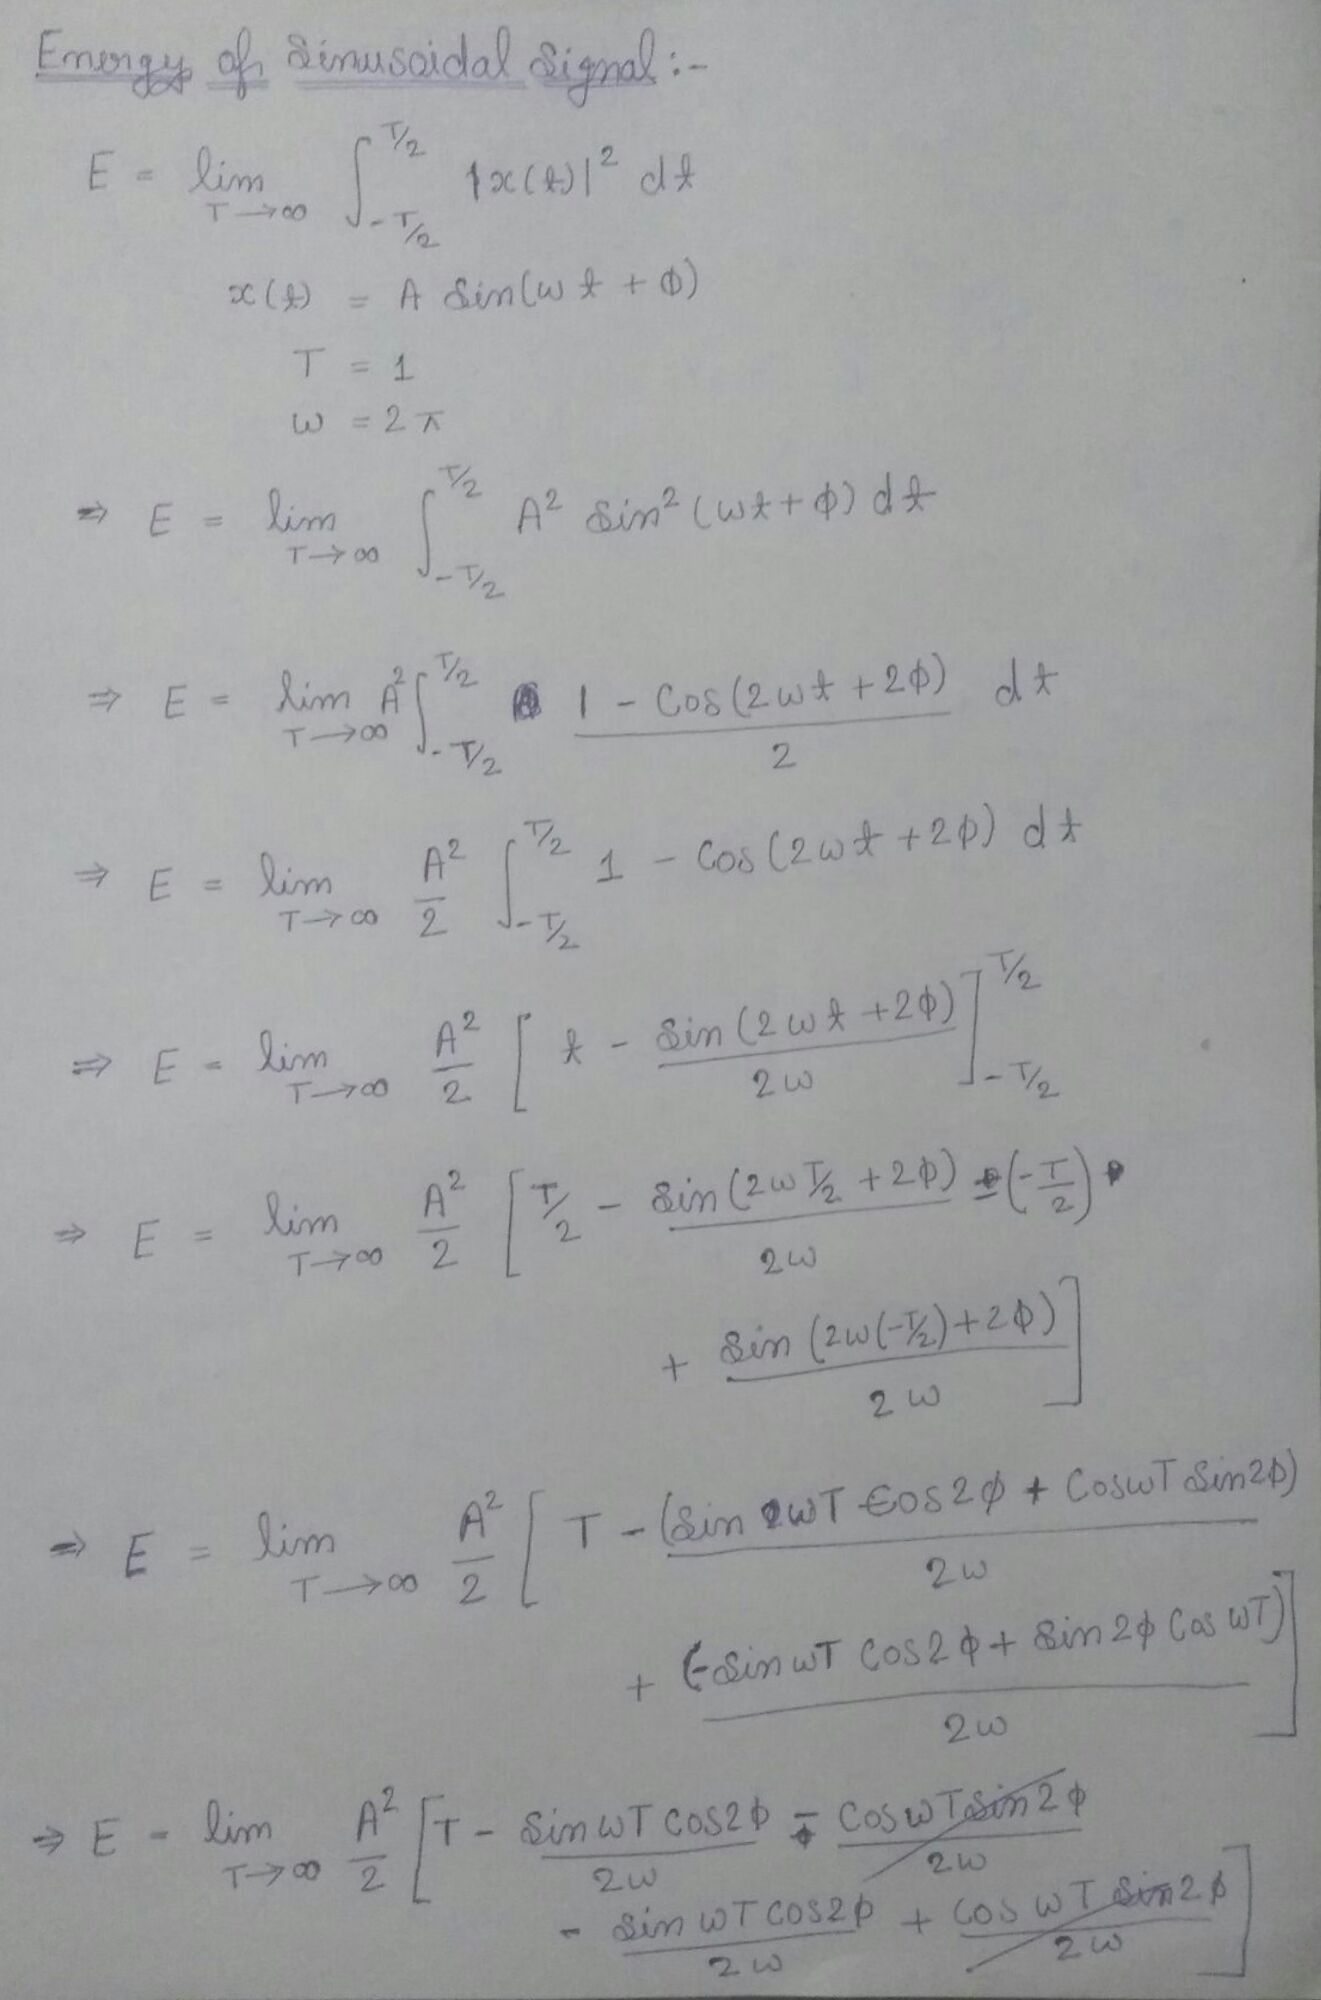

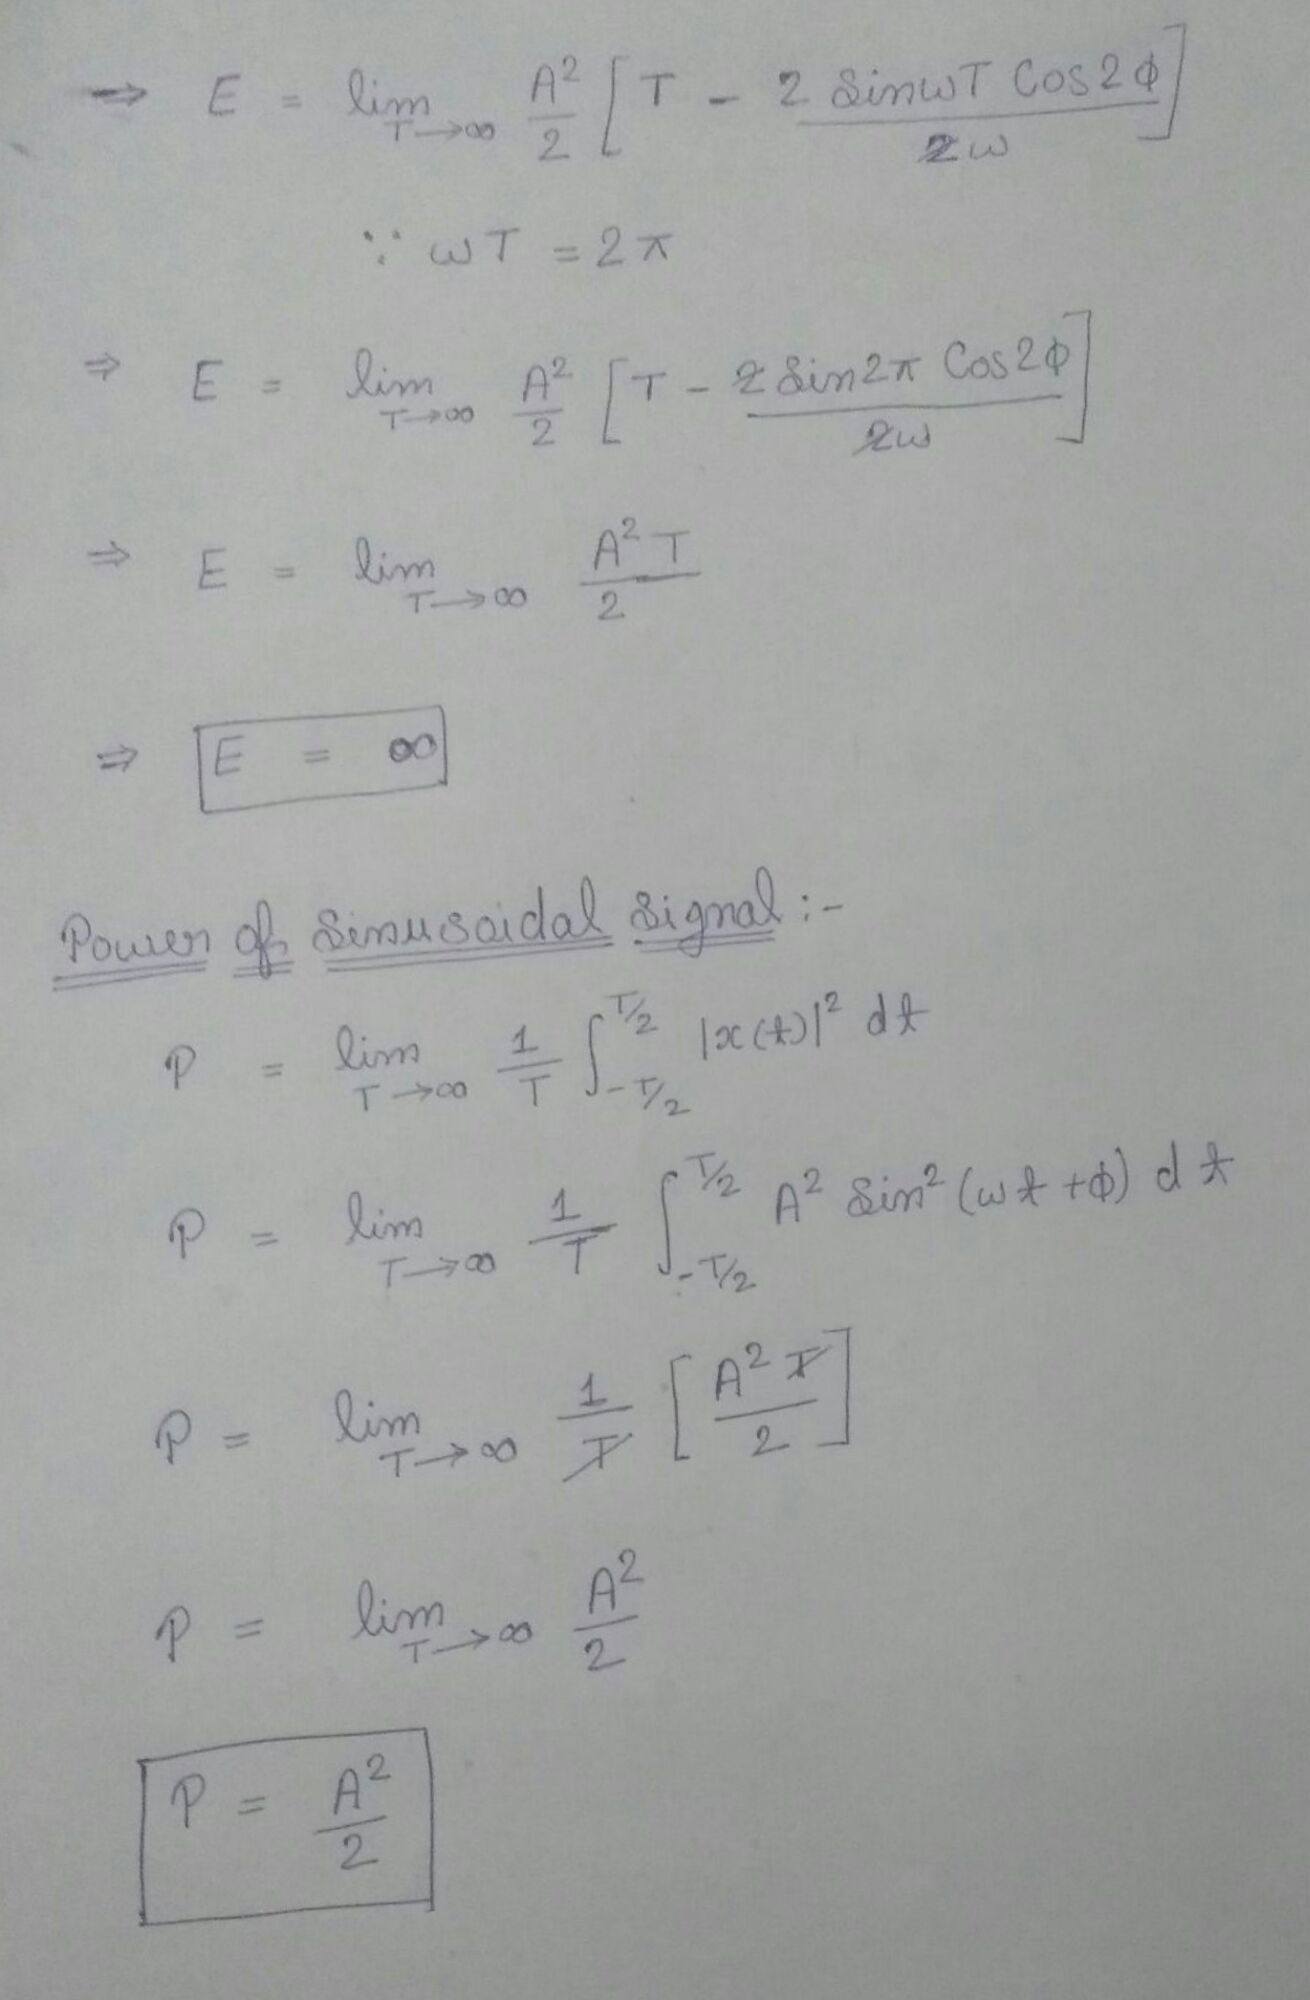

## 2. Discrete-time signals

Plot the following signals: 
                                         
                                         x1[n] = δ[n];
                                         
                                         x2[n] = 4δ[3n];
                                         
                                         x3[n] = 4δ[3n − 2];
                                         
                                         x4[n] = 4δ[n^2 + 3n + 2];
                                         
                                         x5[n] = x1[n] + x2[n] + x3[n];
                                         
                                         x6[n] = ∑ k=−100......100  δ[n − k]

In [15]:
# Function to plot Impulse signal d[a].
def unit_impulse(a,c,n):
    delta =[]
    for sample in n:
        if sample == -c:
            delta.append(a)
        else:
            delta.append(0)
    return delta

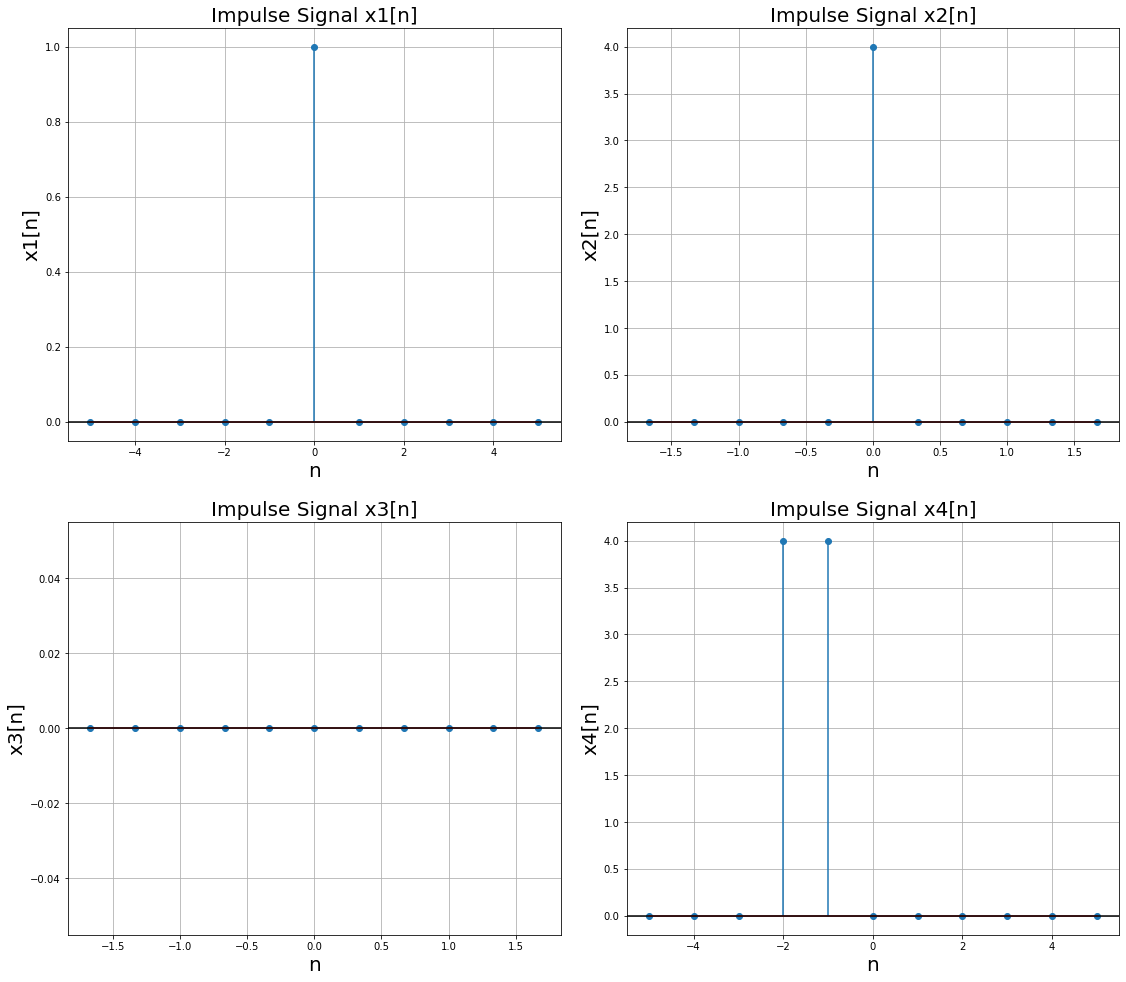

In [16]:
fig, axes = plt.subplots(2,2,figsize=(16, 14));

######################################################################################################################
######################################################################################################################

# plot signal x1[n].
a = 1
c = 0
n = np.arange(-5,6,1)
d = unit_impulse(a,c,n)
axes[0,0].stem(n,d)
axes[0,0].set_xlabel('n',fontsize=20)
axes[0,0].set_ylabel('x1[n]',fontsize=20)
axes[0,0].set_title('Impulse Signal x1[n]',fontsize=20)
axes[0,0].axhline(color = "Black");
axes[0,0].grid()


######################################################################################################################
######################################################################################################################

# plot signal x2[n].
a = 4
c = 0
n = np.arange(-5,6,1)
d = unit_impulse(a,c,n/3)
axes[0,1].stem(n/3,d)
axes[0,1].set_xlabel('n',fontsize=20)
axes[0,1].set_ylabel('x2[n]',fontsize=20)
axes[0,1].set_title('Impulse Signal x2[n]',fontsize=20)
axes[0,1].axhline(color = "Black");
axes[0,1].grid()


######################################################################################################################
######################################################################################################################

# plot signal x3[n].
a = 4
c = -2
n = np.arange(-5,6,1)
d = unit_impulse(a,c,n/3)
axes[1,0].stem((n/3),d)
axes[1,0].set_xlabel('n',fontsize=20)
axes[1,0].set_ylabel('x3[n]',fontsize=20)
axes[1,0].set_title('Impulse Signal x3[n]',fontsize=20)
axes[1,0].axhline(color = "Black");
axes[1,0].grid()

######################################################################################################################
######################################################################################################################

# plot signal x4[n].
a = 4
c = 0
n = np.arange(-5,6,1)
d = unit_impulse(a,c,((n**2)+3*n+2))
axes[1,1].stem(n,d)
axes[1,1].set_xlabel('n',fontsize=20)
axes[1,1].set_ylabel('x4[n]',fontsize=20)
axes[1,1].set_title('Impulse Signal x4[n]',fontsize=20)
axes[1,1].axhline(color = "Black");
axes[1,1].grid()


plt.tight_layout(pad=2);

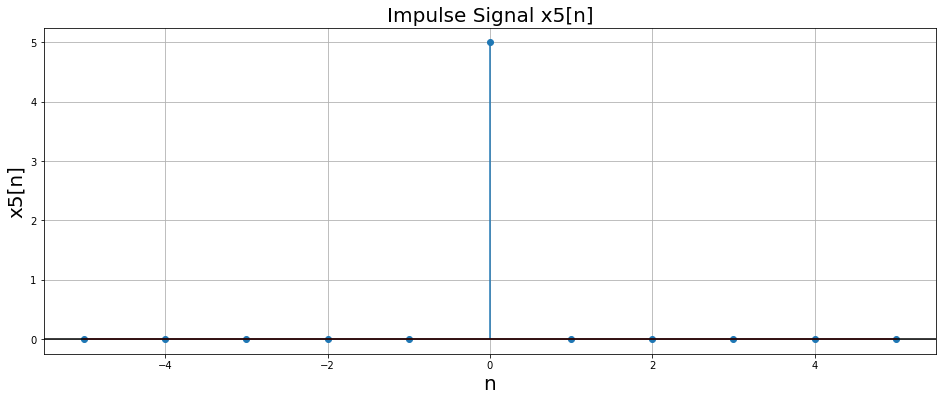

In [17]:
plt.subplots(figsize=(16, 6));
# plot signal x3[n].
a1 = 1
a2 = 4
a3 = 4
c1 = 0
c2 = 0
c3 = -2
n = np.arange(-5,6,1)
d1 = unit_impulse(a1,c1,n)
d2 = unit_impulse(a2,c2,n/3)
d3 = unit_impulse(a3,c3,n/3)
d = []
for i in range(len(d1)):
    d.append(d1[i]+d2[i]+d3[i])
plt.stem(n,d)
plt.xlabel('n',fontsize=20)
plt.ylabel('x5[n]',fontsize=20)
plt.title('Impulse Signal x5[n]',fontsize=20)
plt.axhline(color = "Black");
plt.grid()

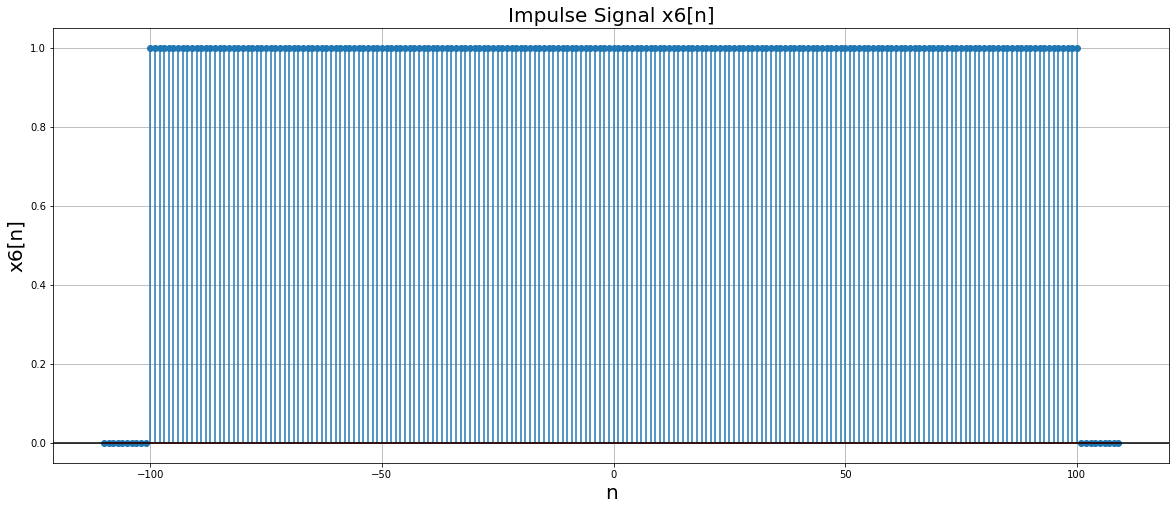

In [18]:
# Function to plot Impulse signal d[a].
def impulse_seq(a,k1,k2,n):
    seq = []
    for sample in n:
        if sample>=k1 and sample<=k2:
            seq.append(1)
        else:
            seq.append(0)
    return seq
                
######################################################################################################################
######################################################################################################################

plt.subplots(figsize=(20, 8));
# plot signal x3[n].
a = 1
k1 = -100
k2 = 100
n = np.arange(-110,110,1)
d = impulse_seq(a,k1,k2,n)
plt.stem(n,d)
plt.xlabel('n',fontsize=20)
plt.ylabel('x6[n]',fontsize=20)
plt.title('Impulse Signal x6[n]',fontsize=20)
plt.axhline(color = "Black");
plt.grid()

Plot the discrete-time counter parts of all the signals given in the continuous-time signals section. Replace x(t) by x[n] to plot the discrete-time signals. A discrete-time signal is obtained by sampling a continuous-time signal. For this, you can use the discrete impulse train to sample continuous-time signals in intervals of Ts sec.

In [19]:
# function to generate unit step sequence u[n].
def step_seq(a,c,n):
    unit =[]
    for sample in n:
        if sample < c:
            unit.append(0)
        else:
            unit.append(a)
    return unit

######################################################################################################################
######################################################################################################################

# function to generate ramp sequence r[n].
def ramp_seq(a,c,n):
    ramp =[]
    for sample in n:
        if sample < c:
            ramp.append(0)
        else:
            ramp.append(a*sample)
    return ramp

######################################################################################################################
######################################################################################################################

#function to generate parabolic sequence p[n].
def parabolic_seq(a,c,n):
    parabolic =[]
    for sample in n:
        if sample < c:
            parabolic.append(0)
        else:
            parabolic.append(a*(((sample)**2)/2))
    return parabolic

######################################################################################################################
######################################################################################################################

# function to generate rectangle pulse seq rect(n/T)
def rect_seq(a,c,n,T):
    rect =[]
    for sample in n:
        if sample < c-T/2:
            rect.append(0)
        elif sample > c+T/2:
            rect.append(0)
        else:
            rect.append(a)
    return rect

######################################################################################################################
######################################################################################################################

# function to convolute the two seq.
def convolution_1(x1,x2):
    m = len(x1)
    n = len(x2)
    output = []
    for i in range(1,m+1):
        output.append(sum(np.multiply(x1[0:i],x2[n-i:n])))
    for j in range(1,n):
        output.append(sum(np.multiply(x1[j:m],x2[0:n-j])))
    return output

######################################################################################################################
######################################################################################################################

# function to generate sinc sequence sinc[n].
def sinc_seq(n):
    sinc = []
    for sample in n:
        y = np.sin(np.pi*sample)/(np.pi*sample)
        sinc.append(y)
    return sinc

######################################################################################################################
######################################################################################################################

# function to generate sequence.
def x_7(n,d1,d2,d3):
    output = []
    for sample in n:
        if sample < 0:
            output.append(0)
        elif sample >= d1 and sample <= d2:
            output.append((sample-d1)/(d2-d1))
        elif sample > d2 and sample <= d3:
            output.append((d3-sample)/(d3-d2))
        elif sample > d3:
            output.append(0)
        else:
            output.append(0)
    return output

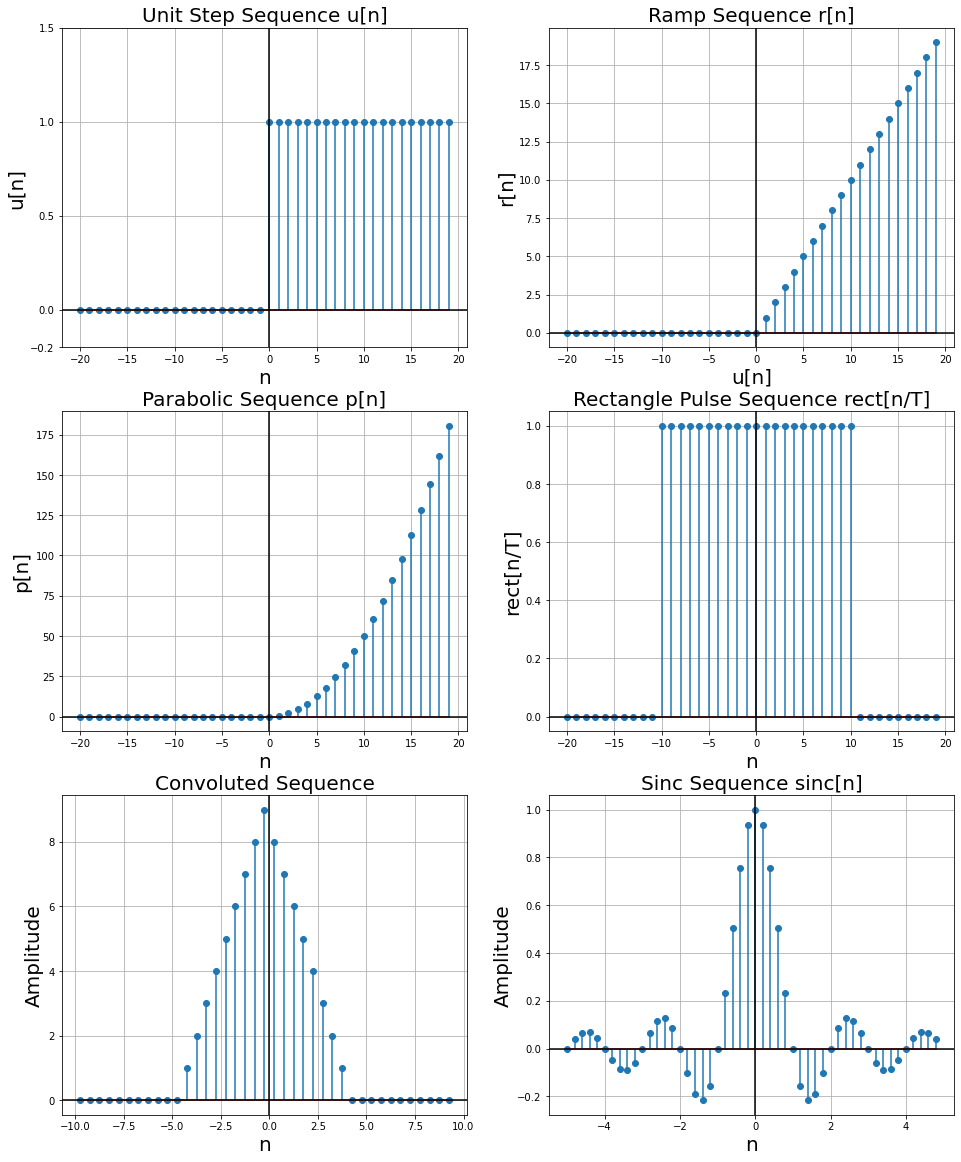

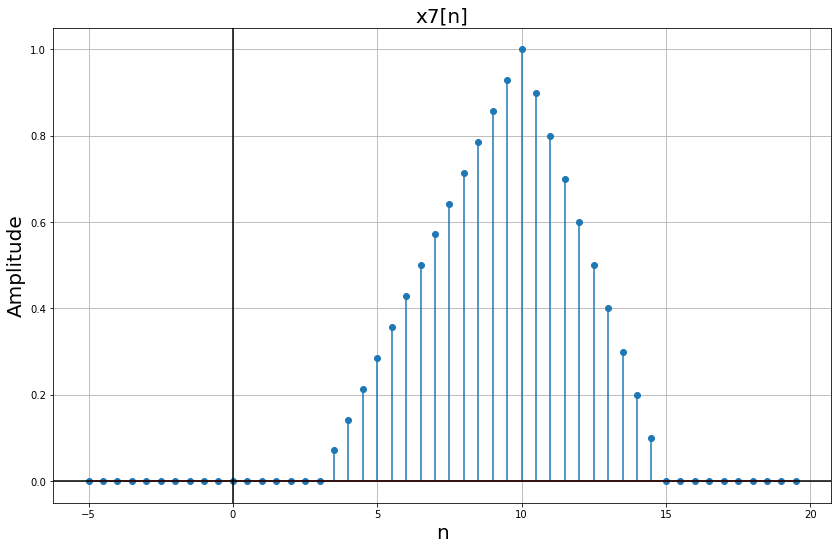

In [20]:
fig, axes = plt.subplots(3,2,figsize=(16, 20));

######################################################################################################################
######################################################################################################################

# plot unit step sequence u[n].
a = 1
c = 0
n = np.arange(-20,20,1)
unit = step_seq(a,c,n)
axes[0,0].stem(n,unit)
axes[0,0].set_xlabel('n',fontsize=20)
axes[0,0].set_yticks([-0.2,0,0.5,1,1.5])
axes[0,0].set_ylabel('u[n]',fontsize=20)
axes[0,0].set_title('Unit Step Sequence u[n]',fontsize=20)
axes[0,0].axhline(color = "Black");
axes[0,0].axvline(color = "Black");
axes[0,0].grid()


######################################################################################################################
######################################################################################################################

# plot ramp sequence r[n].
a = 1;
c = 0;
n = np.arange(-20,20,1)
ramp = ramp_seq(a,c,n)
axes[0,1].stem(n,ramp)
axes[0,1].set_xlabel('u[n]',fontsize=20)
axes[0,1].set_ylabel('r[n]',fontsize=20)
axes[0,1].set_title('Ramp Sequence r[n]',fontsize=20)
axes[0,1].axhline(color = "Black");
axes[0,1].axvline(color = "Black");
axes[0,1].grid()


######################################################################################################################
######################################################################################################################

# plot parabolic sequence p[n].
a = 1
c = 0
n = np.arange(-20,20,1)
parabolic = parabolic_seq(a,c,n)
axes[1,0].stem(n,parabolic)
axes[1,0].set_xlabel('n',fontsize=20)
axes[1,0].set_ylabel('p[n]',fontsize=20)
axes[1,0].set_title('Parabolic Sequence p[n]',fontsize=20)
axes[1,0].axhline(color = "Black");
axes[1,0].axvline(color = "Black");
axes[1,0].grid()


######################################################################################################################
######################################################################################################################

# plot ractangular pulse sequence rect[n/T].
a = 1
c = 0
T = 20
n = np.arange(-20,20,1)
rect = rect_seq(a,c,n,T)
axes[1,1].stem(n,rect)
axes[1,1].set_xlabel('n',fontsize=20)
axes[1,1].set_ylabel('rect[n/T]',fontsize=20)
axes[1,1].set_title('Rectangle Pulse Sequence rect[n/T]',fontsize=20)
axes[1,1].axhline(color = "Black");
axes[1,1].axvline(color = "Black");
axes[1,1].grid()


######################################################################################################################
######################################################################################################################

# plot convoluted sequence.
a = 1
c = 0
T = 4 
UL = 5
LL = -5
SS = 0.5
n= np.arange(LL,UL,SS)
n1 = np.arange((2*LL)+(SS/2),(2*UL)-(SS/2),SS)
rect1 = rect_seq(a,c,n,T)
rect2 = rect_seq(a,c,n,T)
convolute = convolution_1(rect1,rect2)
axes[2,0].stem(n1,convolute)
axes[2,0].set_xlabel('n',fontsize=20)
axes[2,0].set_ylabel('Amplitude',fontsize=20)
axes[2,0].set_title('Convoluted Sequence',fontsize=20)
axes[2,0].axhline(color = "Black");
axes[2,0].axvline(color = "Black");
axes[2,0].grid()


######################################################################################################################
######################################################################################################################

# plot sinc sequence sinc[n].
n = np.arange(-5,5,0.2)
sinc = sinc_seq(n)
axes[2,1].stem(n,sinc)
axes[2,1].set_xlabel('n',fontsize=20)
axes[2,1].set_ylabel('Amplitude',fontsize=20)
axes[2,1].set_title('Sinc Sequence sinc[n]',fontsize=20)
axes[2,1].axhline(color = "Black");
axes[2,1].axvline(color = "Black");
axes[2,1].grid()


######################################################################################################################
######################################################################################################################

# plot function x_7.
plt.subplots(figsize=(12, 8));
n = np.arange(-5,20,0.5)
d1 = 3
d2 = 10
d3 = 15
x = x_7(n,d1,d2,d3)
plt.stem(n,x)
plt.xlabel('n',fontsize=20)
plt.ylabel('Amplitude',fontsize=20)
plt.title('x7[n]',fontsize=20)
plt.axhline(color = "Black");
plt.axvline(color = "Black");
plt.grid()


plt.tight_layout(pad=2);

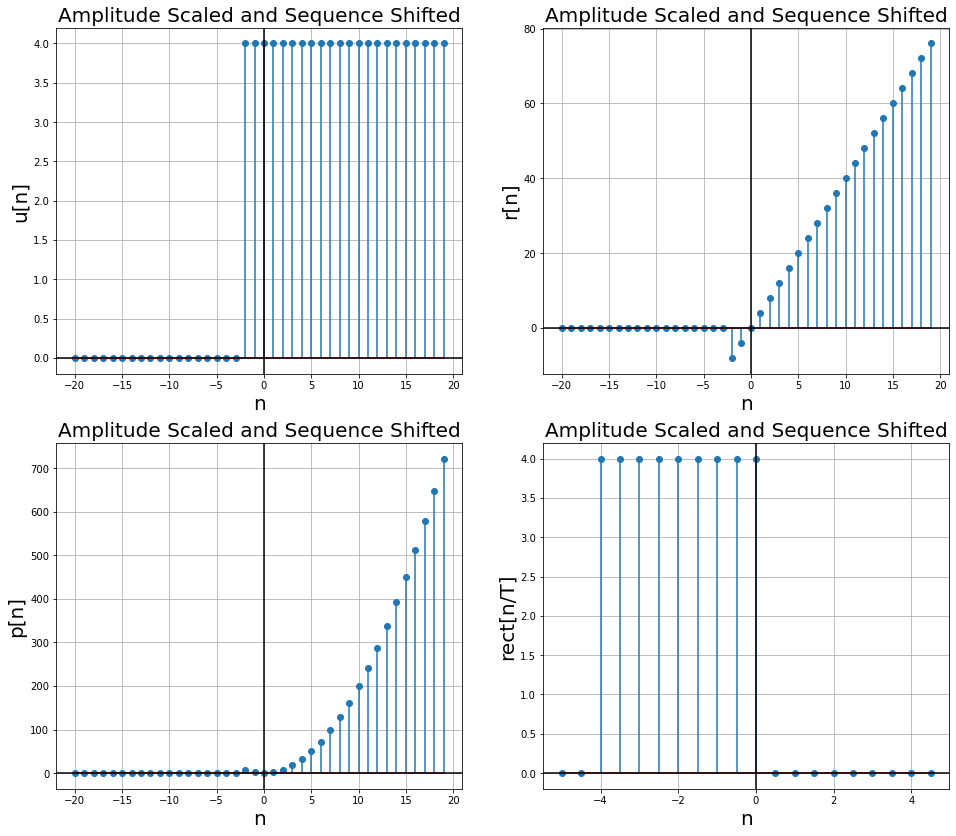

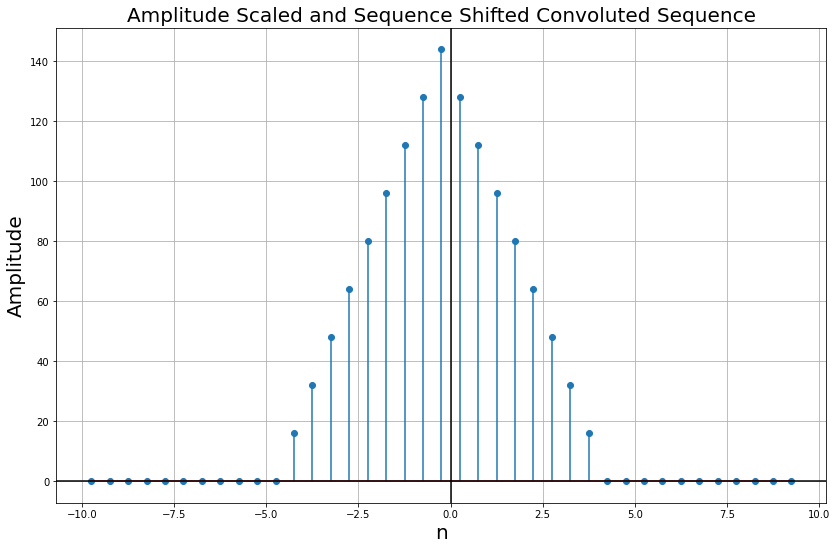

In [22]:
fig, axes = plt.subplots(2,2,figsize=(16, 14));


######################################################################################################################
######################################################################################################################

# plot unit step sequence u[n].
a = 4  
c = -2
n = np.arange(-20,20,1)
unit = step_seq(a,c,n)
axes[0,0].stem(n,unit)
axes[0,0].set_xlabel('n',fontsize=20)
axes[0,0].set_ylabel('u[n]',fontsize=20)
axes[0,0].set_title('Amplitude Scaled and Sequence Shifted',fontsize=20)
axes[0,0].axhline(color = "Black");
axes[0,0].axvline(color = "Black");
axes[0,0].grid()


######################################################################################################################
######################################################################################################################

# plot ramp sequence r[n].
a = 4;
c = -2;
n = np.arange(-20,20,1)
ramp = ramp_seq(a,c,n)
axes[0,1].stem(n,ramp)
axes[0,1].set_xlabel('n',fontsize=20)
axes[0,1].set_ylabel('r[n]',fontsize=20)
axes[0,1].set_title('Amplitude Scaled and Sequence Shifted',fontsize=20)
axes[0,1].axhline(color = "Black");
axes[0,1].axvline(color = "Black");
axes[0,1].grid()


######################################################################################################################
######################################################################################################################

# plot parabolic sequence p[n].
a = 4
c = -2
n = np.arange(-20,20,1)
parabolic = parabolic_seq(a,c,n)
axes[1,0].stem(n,parabolic)
axes[1,0].set_xlabel('n',fontsize=20)
axes[1,0].set_ylabel('p[n]',fontsize=20)
axes[1,0].set_title('Amplitude Scaled and Sequence Shifted',fontsize=20)
axes[1,0].axhline(color = "Black");
axes[1,0].axvline(color = "Black");
axes[1,0].grid()


######################################################################################################################
######################################################################################################################

# plot ractangular pulse sequence rect[n/T]
a = 4
c = -2
T = 4
n = np.arange(-5,5,0.5)
rect = rect_seq(a,c,n,T)
axes[1,1].stem(n,rect)
axes[1,1].set_xlabel('n',fontsize=20)
axes[1,1].set_ylabel('rect[n/T]',fontsize=20)
axes[1,1].set_title('Amplitude Scaled and Sequence Shifted',fontsize=20)
axes[1,1].axhline(color = "Black");
axes[1,1].axvline(color = "Black");
axes[1,1].grid()


######################################################################################################################
######################################################################################################################

# plot convoluted signal.
plt.subplots(figsize=(12, 8));
a = 4
c = -2
T = 4
UL = 5
LL = -5
SS = 0.5
n = np.arange(LL,UL,SS)
n1 = np.arange((2*LL)+(SS/2),(2*UL)-(SS/2),SS)
rect1 = rect_seq(a,c,n,T)
rect2 = rect_seq(a,c,n,T)
convolute = convolution_1(rect1,rect2)
plt.stem(n1,convolute)
plt.xlabel('n',fontsize=20)
plt.ylabel('Amplitude',fontsize=20)
plt.title('Amplitude Scaled and Sequence Shifted Convoluted Sequence',fontsize=20)
plt.axhline(color = "Black");
plt.axvline(color = "Black");
plt.grid()


plt.tight_layout(pad=2);

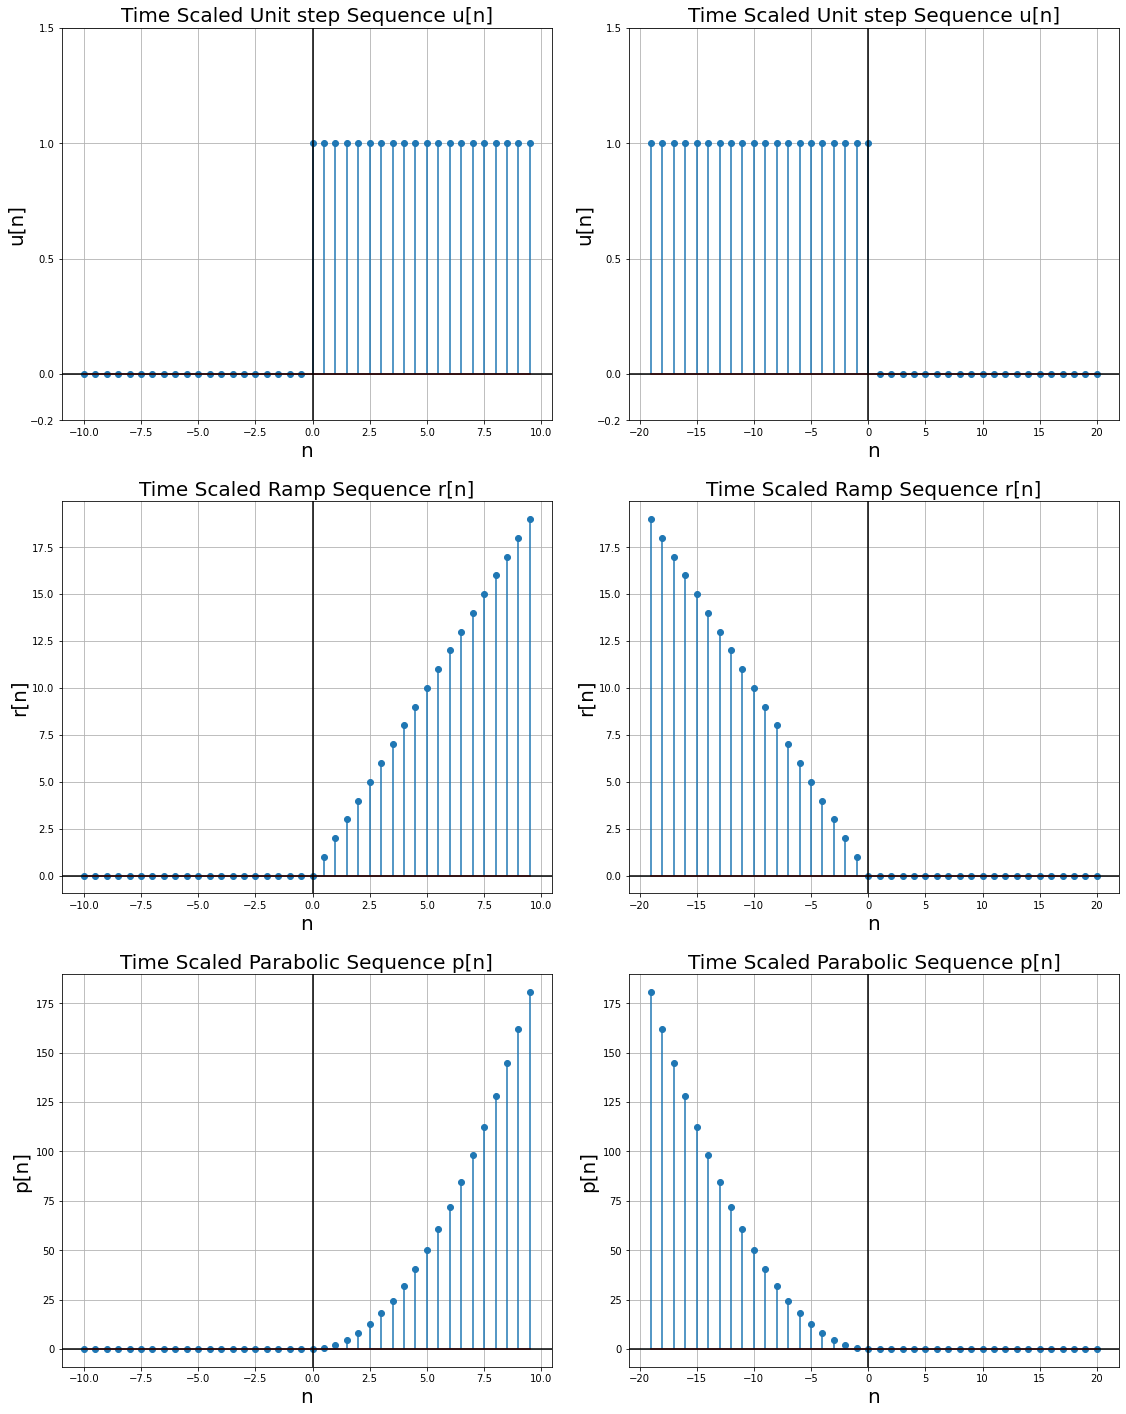

In [23]:
fig, axes = plt.subplots(3,2,figsize=(16, 20));

######################################################################################################################
######################################################################################################################

# plot time scaled unit step sequence u[n].
a = 1
b = 0.5
c = 0
n = np.arange(-20,20,1)
unit = step_seq(a,c,n)
axes[0,0].stem(b*n,unit)
axes[0,0].set_xlabel('n',fontsize=20)
axes[0,0].set_yticks([-0.2,0,0.5,1,1.5])
axes[0,0].set_ylabel('u[n]',fontsize=20)
axes[0,0].set_title('Time Scaled Unit step Sequence u[n]',fontsize=20)
axes[0,0].axhline(color = "Black");
axes[0,0].axvline(color = "Black");
axes[0,0].grid()


######################################################################################################################
######################################################################################################################

# plot time scaled unit step sequence u[n].
a = 1
b = -1
c = 0
n = np.arange(-20,20,1)
unit = step_seq(a,c,n)
axes[0,1].stem(b*n,unit)
axes[0,1].set_xlabel('n',fontsize=20)
axes[0,1].set_yticks([-0.2,0,0.5,1,1.5])
axes[0,1].set_ylabel('u[n]',fontsize=20)
axes[0,1].set_title('Time Scaled Unit step Sequence u[n]',fontsize=20)
axes[0,1].axhline(color = "Black");
axes[0,1].axvline(color = "Black");
axes[0,1].grid()


######################################################################################################################
######################################################################################################################

# plot time scaled ramp sequence r[n].
a = 1;
b = 0.5;
c = 0;
n = np.arange(-20,20,1)
ramp = ramp_seq(a,c,n)
axes[1,0].stem(b*n,ramp)
axes[1,0].set_xlabel('n',fontsize=20)
axes[1,0].set_ylabel('r[n]',fontsize=20)
axes[1,0].set_title('Time Scaled Ramp Sequence r[n]',fontsize=20)
axes[1,0].axhline(color = "Black");
axes[1,0].axvline(color = "Black");
axes[1,0].grid()


######################################################################################################################
######################################################################################################################

# plot time scaled ramp function r(t).
a = 1;
b = -1;
c = 0;
n = np.arange(-20,20,1)
ramp = ramp_seq(a,c,n)
axes[1,1].stem(b*n,ramp)
axes[1,1].set_xlabel('n',fontsize=20)
axes[1,1].set_ylabel('r[n]',fontsize=20)
axes[1,1].set_title('Time Scaled Ramp Sequence r[n]',fontsize=20)
axes[1,1].axhline(color = "Black");
axes[1,1].axvline(color = "Black");
axes[1,1].grid()


######################################################################################################################
######################################################################################################################

# plot time scaled parabolic function p(t).
a = 1
b = 0.5
c = 0
n = np.arange(-20,20,1)
parabolic = parabolic_seq(a,c,n)
axes[2,0].stem(b*n,parabolic)
axes[2,0].set_xlabel('n',fontsize=20)
axes[2,0].set_ylabel('p[n]',fontsize=20)
axes[2,0].set_title('Time Scaled Parabolic Sequence p[n]',fontsize=20)
axes[2,0].axhline(color = "Black");
axes[2,0].axvline(color = "Black");
axes[2,0].grid()


######################################################################################################################
######################################################################################################################

# plot time scaled parabolic function p(t).
a = 1
b = -1
c = 0
n = np.arange(-20,20,1)
parabolic = parabolic_seq(a,c,n)
axes[2,1].stem(b*n,parabolic)
axes[2,1].set_xlabel('n',fontsize=20)
axes[2,1].set_ylabel('p[n]',fontsize=20)
axes[2,1].set_title('Time Scaled Parabolic Sequence p[n]',fontsize=20)
axes[2,1].axhline(color = "Black");
axes[2,1].axvline(color = "Black");
axes[2,1].grid()


plt.tight_layout(pad=2);

In [24]:
# function to generate exponential sequence.
def exponential_seq(A,B,n):
    exponent = []
    for sample in n:
        y = A*np.exp(-B*sample)
        exponent.append(y)
    return exponent

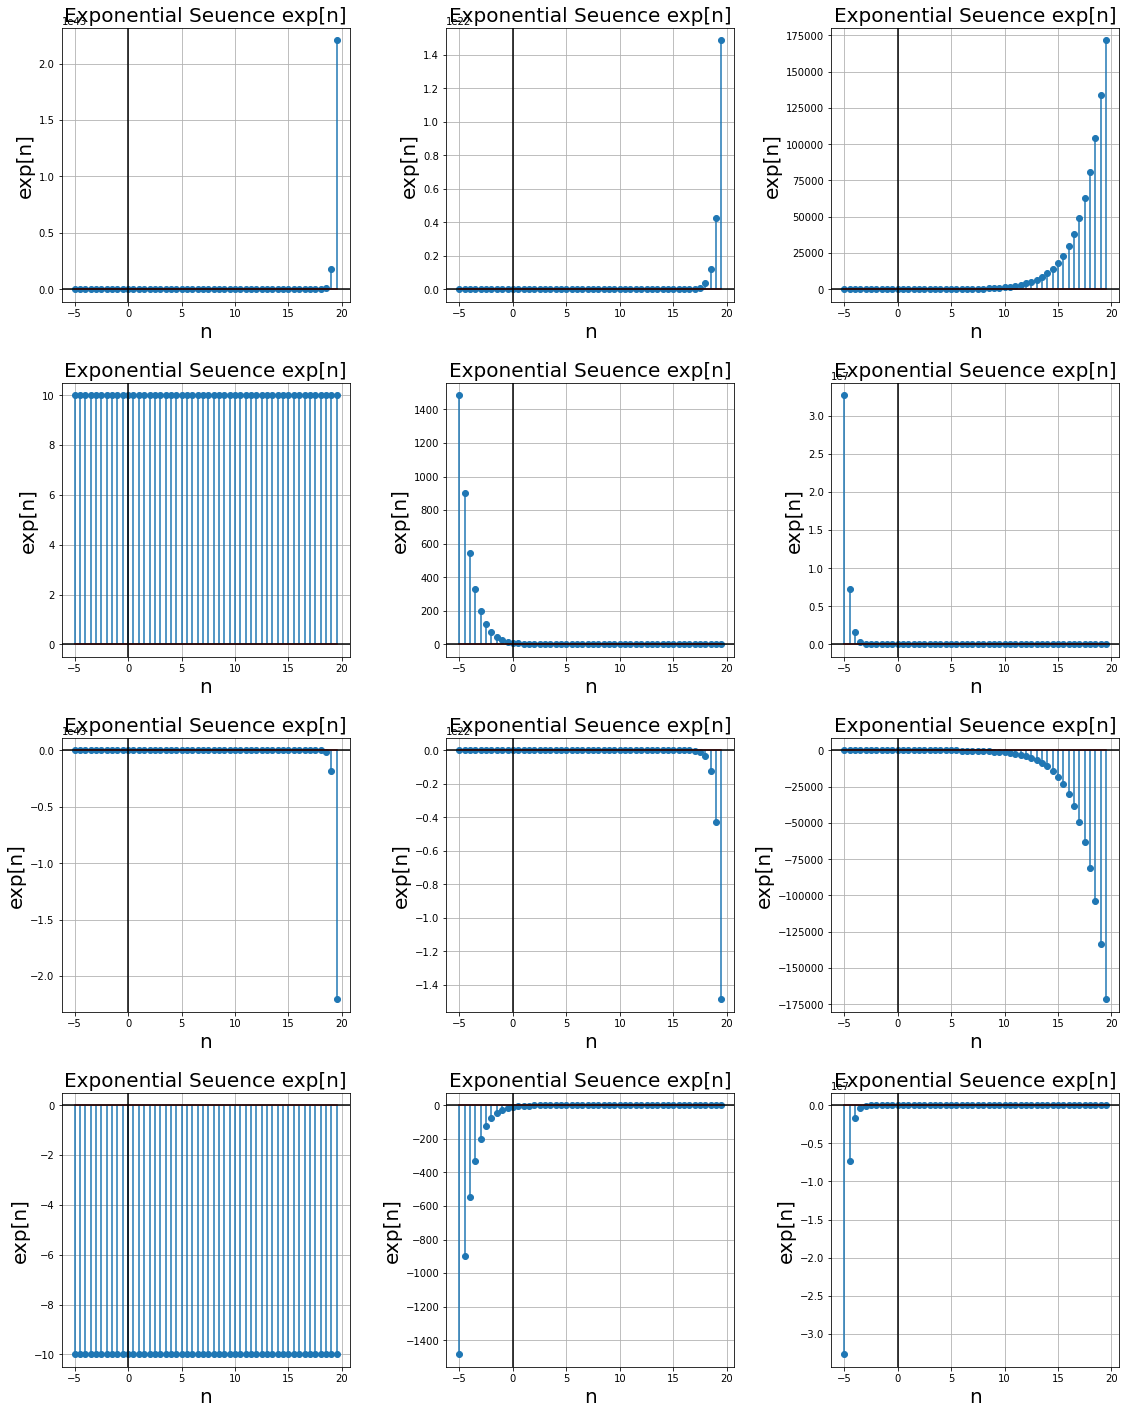

In [25]:
fig, axes = plt.subplots(4,3,figsize=(16, 20));

######################################################################################################################
######################################################################################################################

# plot exponential sequence exp[n].
A = 10
B = -5
n = np.arange(-5,20,0.5)
exponent = exponential_seq(A,B,n)
axes[0,0].stem(n,exponent)
axes[0,0].set_xlabel('n',fontsize=20)
axes[0,0].set_ylabel('exp[n]',fontsize=20)
axes[0,0].set_title('Exponential Seuence exp[n]',fontsize=20)
axes[0,0].axhline(color = "Black");
axes[0,0].axvline(color = "Black");
axes[0,0].grid()

######################################################################################################################
######################################################################################################################

# plot exponential sequence exp[n].
A = 10
B = -2.5
n = np.arange(-5,20,0.5)
exponent = exponential_seq(A,B,n)
axes[0,1].stem(n,exponent)
axes[0,1].set_xlabel('n',fontsize=20)
axes[0,1].set_ylabel('exp[n]',fontsize=20)
axes[0,1].set_title('Exponential Seuence exp[n]',fontsize=20)
axes[0,1].axhline(color = "Black");
axes[0,1].axvline(color = "Black");
axes[0,1].grid()

######################################################################################################################
######################################################################################################################

# plot exponential sequence exp[n].
A = 10
B = -0.5
n = np.arange(-5,20,0.5)
exponent = exponential_seq(A,B,n)
axes[0,2].stem(n,exponent)
axes[0,2].set_xlabel('n',fontsize=20)
axes[0,2].set_ylabel('exp[n]',fontsize=20)
axes[0,2].set_title('Exponential Seuence exp[n]',fontsize=20)
axes[0,2].axhline(color = "Black");
axes[0,2].axvline(color = "Black");
axes[0,2].grid()

######################################################################################################################
######################################################################################################################

# plot exponential sequence exp[n].
A = 10
B = 0
n = np.arange(-5,20,0.5)
exponent = exponential_seq(A,B,n)
axes[1,0].stem(n,exponent)
axes[1,0].set_xlabel('n',fontsize=20)
axes[1,0].set_ylabel('exp[n]',fontsize=20)
axes[1,0].set_title('Exponential Seuence exp[n]',fontsize=20)
axes[1,0].axhline(color = "Black");
axes[1,0].axvline(color = "Black");
axes[1,0].grid()

######################################################################################################################
######################################################################################################################

# plot exponential sequence exp[n].
A = 10
B = 1
n = np.arange(-5,20,0.5)
exponent = exponential_seq(A,B,n)
axes[1,1].stem(n,exponent)
axes[1,1].set_xlabel('n',fontsize=20)
axes[1,1].set_ylabel('exp[n]',fontsize=20)
axes[1,1].set_title('Exponential Seuence exp[n]',fontsize=20)
axes[1,1].axhline(color = "Black");
axes[1,1].axvline(color = "Black");
axes[1,1].grid()


######################################################################################################################
######################################################################################################################

# plot exponential sequence exp[n].
A = 10
B = 3
n = np.arange(-5,20,0.5)
exponent = exponential_seq(A,B,n)
axes[1,2].stem(n,exponent)
axes[1,2].set_xlabel('n',fontsize=20)
axes[1,2].set_ylabel('exp[n]',fontsize=20)
axes[1,2].set_title('Exponential Seuence exp[n]',fontsize=20)
axes[1,2].axhline(color = "Black");
axes[1,2].axvline(color = "Black");
axes[1,2].grid()

######################################################################################################################
######################################################################################################################

# plot exponential sequence exp[n].
A = -10
B = -5
n = np.arange(-5,20,0.5)
exponent = exponential_seq(A,B,n)
axes[2,0].stem(n,exponent)
axes[2,0].set_xlabel('n',fontsize=20)
axes[2,0].set_ylabel('exp[n]',fontsize=20)
axes[2,0].set_title('Exponential Seuence exp[n]',fontsize=20)
axes[2,0].axhline(color = "Black");
axes[2,0].axvline(color = "Black");
axes[2,0].grid()

######################################################################################################################
######################################################################################################################

# plot exponential sequence exp[n].
A = -10
B = -2.5
n = np.arange(-5,20,0.5)
exponent = exponential_seq(A,B,n)
axes[2,1].stem(n,exponent)
axes[2,1].set_xlabel('n',fontsize=20)
axes[2,1].set_ylabel('exp[n]',fontsize=20)
axes[2,1].set_title('Exponential Seuence exp[n]',fontsize=20)
axes[2,1].axhline(color = "Black");
axes[2,1].axvline(color = "Black");
axes[2,1].grid()

######################################################################################################################
######################################################################################################################

# plot exponential sequence exp[n].
A = -10
B = -0.5
n = np.arange(-5,20,0.5)
exponent = exponential_seq(A,B,n)
axes[2,2].stem(n,exponent)
axes[2,2].set_xlabel('n',fontsize=20)
axes[2,2].set_ylabel('exp[n]',fontsize=20)
axes[2,2].set_title('Exponential Seuence exp[n]',fontsize=20)
axes[2,2].axhline(color = "Black");
axes[2,2].axvline(color = "Black");
axes[2,2].grid()

######################################################################################################################
######################################################################################################################

# plot exponential sequence exp[n].
A = -10
B = 0
n = np.arange(-5,20,0.5)
exponent = exponential_seq(A,B,n)
axes[3,0].stem(n,exponent)
axes[3,0].set_xlabel('n',fontsize=20)
axes[3,0].set_ylabel('exp[n]',fontsize=20)
axes[3,0].set_title('Exponential Seuence exp[n]',fontsize=20)
axes[3,0].axhline(color = "Black");
axes[3,0].axvline(color = "Black");
axes[3,0].grid()

######################################################################################################################
######################################################################################################################

# plot exponential sequence exp[n].
A = -10
B = 1
n = np.arange(-5,20,0.5)
exponent = exponential_seq(A,B,n)
axes[3,1].stem(n,exponent)
axes[3,1].set_xlabel('n',fontsize=20)
axes[3,1].set_ylabel('exp[n]',fontsize=20)
axes[3,1].set_title('Exponential Seuence exp[n]',fontsize=20)
axes[3,1].axhline(color = "Black");
axes[3,1].axvline(color = "Black");
axes[3,1].grid()

######################################################################################################################
######################################################################################################################

# plot exponential sequence exp[n].
A = -10
B = 3
n = np.arange(-5,20,0.5)
exponent = exponential_seq(A,B,n)
axes[3,2].stem(n,exponent)
axes[3,2].set_xlabel('n',fontsize=20)
axes[3,2].set_ylabel('exp[n]',fontsize=20)
axes[3,2].set_title('Exponential Seuence exp[n]',fontsize=20)
axes[3,2].axhline(color = "Black");
axes[3,2].axvline(color = "Black");
axes[3,2].grid()

plt.tight_layout(pad=2);

In [26]:
# function to generate complex exponential sequence.
def complex_exponential(alpha,beta,omega,phi,n):
    comp_exp = [];
    for sample in n:
        y = alpha*(np.exp(-beta*sample))*np.cos((omega*sample)+phi)
        comp_exp.append(y);
    return comp_exp

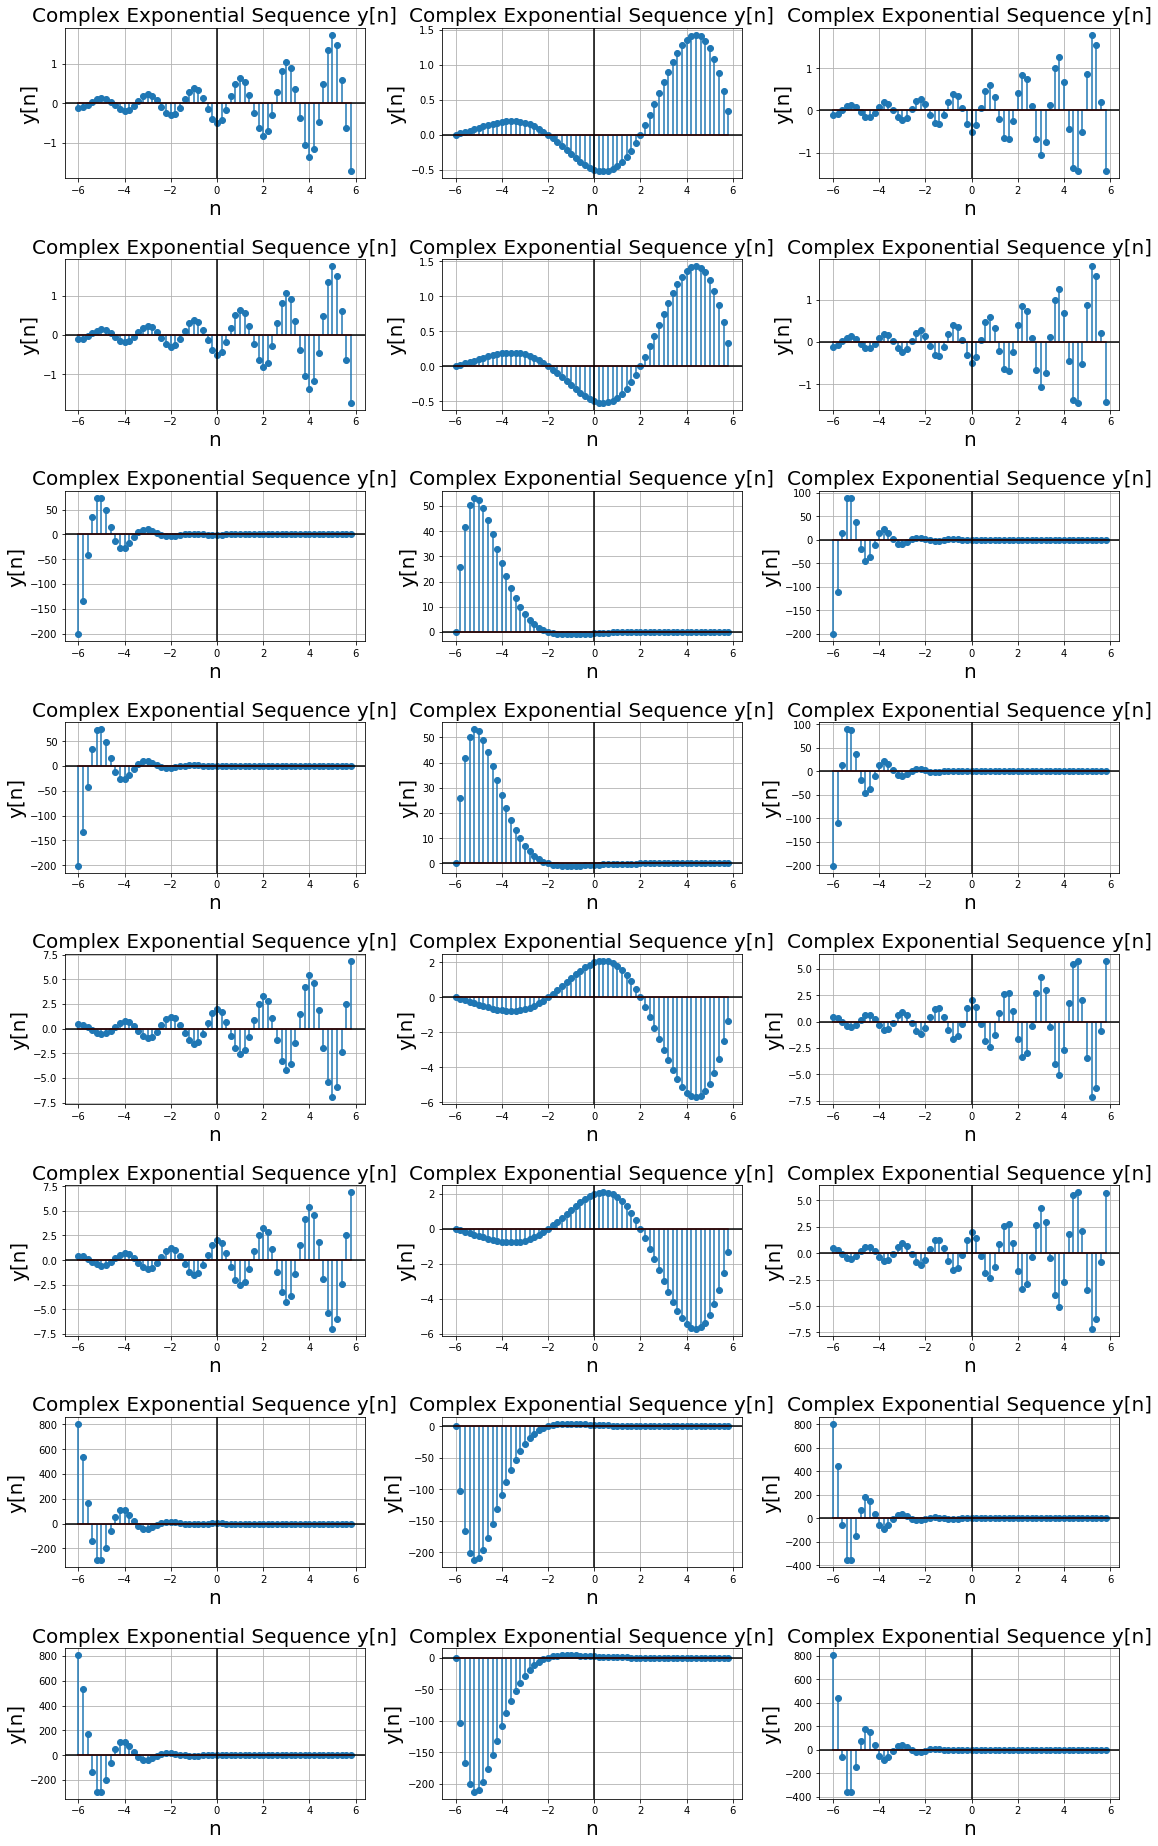

In [27]:
fig, axes = plt.subplots(8,3,figsize=(16, 26));

######################################################################################################################
######################################################################################################################

# plot complex exponential sequence.
n = np.arange(-6,6,0.2)
a = 0.5
b = -0.25
o = np.pi
phi = -np.pi
c_e = complex_exponential(a,b,o,phi,n)
axes[0,0].stem(n,c_e)
axes[0,0].set_xlabel('n',fontsize=20)
axes[0,0].set_ylabel('y[n]',fontsize=20)
axes[0,0].set_title('Complex Exponential Sequence y[n]',fontsize=20)
axes[0,0].axhline(color = "Black");
axes[0,0].axvline(color = "Black");
axes[0,0].grid()

######################################################################################################################
######################################################################################################################

# plot complex exponential sequence.
n = np.arange(-6,6,0.2)
a = 0.5
b = -0.25
o = np.pi/4
phi = -np.pi
c_e = complex_exponential(a,b,o,phi,n)
axes[0,1].stem(n,c_e)
axes[0,1].set_xlabel('n',fontsize=20)
axes[0,1].set_ylabel('y[n]',fontsize=20)
axes[0,1].set_title('Complex Exponential Sequence y[n]',fontsize=20)
axes[0,1].axhline(color = "Black");
axes[0,1].axvline(color = "Black");
axes[0,1].grid()

######################################################################################################################
######################################################################################################################

# plot complex exponential sequence.
n = np.arange(-6,6,0.2)
a = 0.5
b = -0.25
o = 4*np.pi/3
phi = -np.pi
c_e = complex_exponential(a,b,o,phi,n)
axes[0,2].stem(n,c_e)
axes[0,2].set_xlabel('n',fontsize=20)
axes[0,2].set_ylabel('y[n]',fontsize=20)
axes[0,2].set_title('Complex Exponential Sequence y[n]',fontsize=20)
axes[0,2].axhline(color = "Black");
axes[0,2].axvline(color = "Black");
axes[0,2].grid()

######################################################################################################################
######################################################################################################################

# plot complex exponential sequence.
n = np.arange(-6,6,0.2)
a = 0.5
b = -0.25
o = np.pi
phi = np.pi
c_e = complex_exponential(a,b,o,phi,n)
axes[1,0].stem(n,c_e)
axes[1,0].set_xlabel('n',fontsize=20)
axes[1,0].set_ylabel('y[n]',fontsize=20)
axes[1,0].set_title('Complex Exponential Sequence y[n]',fontsize=20)
axes[1,0].axhline(color = "Black");
axes[1,0].axvline(color = "Black");
axes[1,0].grid()

######################################################################################################################
######################################################################################################################

# plot complex exponential sequence.
n = np.arange(-6,6,0.2)
a = 0.5
b = -0.25
o = np.pi/4
phi = np.pi
c_e = complex_exponential(a,b,o,phi,n)
axes[1,1].stem(n,c_e)
axes[1,1].set_xlabel('n',fontsize=20)
axes[1,1].set_ylabel('y[n]',fontsize=20)
axes[1,1].set_title('Complex Exponential Sequence y[n]',fontsize=20)
axes[1,1].axhline(color = "Black");
axes[1,1].axvline(color = "Black");
axes[1,1].grid()

######################################################################################################################
######################################################################################################################

# plot complex exponential sequence.
n = np.arange(-6,6,0.2)
a = 0.5
b = -0.25
o = 4*np.pi/3
phi = np.pi
c_e = complex_exponential(a,b,o,phi,n)
axes[1,2].stem(n,c_e)
axes[1,2].set_xlabel('n',fontsize=20)
axes[1,2].set_ylabel('y[n]',fontsize=20)
axes[1,2].set_title('Complex Exponential Sequence y[n]',fontsize=20)
axes[1,2].axhline(color = "Black");
axes[1,2].axvline(color = "Black");
axes[1,2].grid()

######################################################################################################################
######################################################################################################################

# plot complex exponential sequence.
n = np.arange(-6,6,0.2)
a = 0.5
b = 1
o = np.pi
phi = -np.pi
c_e = complex_exponential(a,b,o,phi,n)
axes[2,0].stem(n,c_e)
axes[2,0].set_xlabel('n',fontsize=20)
axes[2,0].set_ylabel('y[n]',fontsize=20)
axes[2,0].set_title('Complex Exponential Sequence y[n]',fontsize=20)
axes[2,0].axhline(color = "Black");
axes[2,0].axvline(color = "Black");
axes[2,0].grid()

######################################################################################################################
######################################################################################################################

# plot complex exponential sequence.
n = np.arange(-6,6,0.2)
a = 0.5
b = 1
o = np.pi/4
phi = -np.pi
c_e = complex_exponential(a,b,o,phi,n)
axes[2,1].stem(n,c_e)
axes[2,1].set_xlabel('n',fontsize=20)
axes[2,1].set_ylabel('y[n]',fontsize=20)
axes[2,1].set_title('Complex Exponential Sequence y[n]',fontsize=20)
axes[2,1].axhline(color = "Black");
axes[2,1].axvline(color = "Black");
axes[2,1].grid()

######################################################################################################################
######################################################################################################################

# plot complex exponential sequence.
n = np.arange(-6,6,0.2)
a = 0.5
b = 1
o = 4*np.pi/3
phi = -np.pi
c_e = complex_exponential(a,b,o,phi,n)
axes[2,2].stem(n,c_e)
axes[2,2].set_xlabel('n',fontsize=20)
axes[2,2].set_ylabel('y[n]',fontsize=20)
axes[2,2].set_title('Complex Exponential Sequence y[n]',fontsize=20)
axes[2,2].axhline(color = "Black");
axes[2,2].axvline(color = "Black");
axes[2,2].grid()

######################################################################################################################
######################################################################################################################

# plot complex exponential sequence.
n = np.arange(-6,6,0.2)
a = 0.5
b = 1
o = np.pi
phi = np.pi
c_e = complex_exponential(a,b,o,phi,n)
axes[3,0].stem(n,c_e)
axes[3,0].set_xlabel('n',fontsize=20)
axes[3,0].set_ylabel('y[n]',fontsize=20)
axes[3,0].set_title('Complex Exponential Sequence y[n]',fontsize=20)
axes[3,0].axhline(color = "Black");
axes[3,0].axvline(color = "Black");
axes[3,0].grid()

######################################################################################################################
######################################################################################################################

# plot complex exponential sequence.
n = np.arange(-6,6,0.2)
a = 0.5
b = 1
o = np.pi/4
phi = np.pi
c_e = complex_exponential(a,b,o,phi,n)
axes[3,1].stem(n,c_e)
axes[3,1].set_xlabel('n',fontsize=20)
axes[3,1].set_ylabel('y[n]',fontsize=20)
axes[3,1].set_title('Complex Exponential Sequence y[n]',fontsize=20)
axes[3,1].axhline(color = "Black");
axes[3,1].axvline(color = "Black");
axes[3,1].grid()

######################################################################################################################
######################################################################################################################

# plot complex exponential sequence.
n = np.arange(-6,6,0.2)
a = 0.5
b = 1
o = 4*np.pi/3
phi = np.pi
c_e = complex_exponential(a,b,o,phi,n)
axes[3,2].stem(n,c_e)
axes[3,2].set_xlabel('n',fontsize=20)
axes[3,2].set_ylabel('y[n]',fontsize=20)
axes[3,2].set_title('Complex Exponential Sequence y[n]',fontsize=20)
axes[3,2].axhline(color = "Black");
axes[3,2].axvline(color = "Black");
axes[3,2].grid()

######################################################################################################################
######################################################################################################################

# plot complex exponential sequence.
n = np.arange(-6,6,0.2)
a = -2
b = -0.25
o = np.pi
phi = -np.pi
c_e = complex_exponential(a,b,o,phi,n)
axes[4,0].stem(n,c_e)
axes[4,0].set_xlabel('n',fontsize=20)
axes[4,0].set_ylabel('y[n]',fontsize=20)
axes[4,0].set_title('Complex Exponential Sequence y[n]',fontsize=20)
axes[4,0].axhline(color = "Black");
axes[4,0].axvline(color = "Black");
axes[4,0].grid()

######################################################################################################################
######################################################################################################################

# plot complex exponential sequence.
n = np.arange(-6,6,0.2)
a = -2
b = -0.25
o = np.pi/4
phi = -np.pi
c_e = complex_exponential(a,b,o,phi,n)
axes[4,1].stem(n,c_e)
axes[4,1].set_xlabel('n',fontsize=20)
axes[4,1].set_ylabel('y[n]',fontsize=20)
axes[4,1].set_title('Complex Exponential Sequence y[n]',fontsize=20)
axes[4,1].axhline(color = "Black");
axes[4,1].axvline(color = "Black");
axes[4,1].grid()

######################################################################################################################
######################################################################################################################

# plot complex exponential sequence.
n = np.arange(-6,6,0.2)
a = -2
b = -0.25
o = 4*np.pi/3
phi = -np.pi
c_e = complex_exponential(a,b,o,phi,n)
axes[4,2].stem(n,c_e)
axes[4,2].set_xlabel('n',fontsize=20)
axes[4,2].set_ylabel('y[n]',fontsize=20)
axes[4,2].set_title('Complex Exponential Sequence y[n]',fontsize=20)
axes[4,2].axhline(color = "Black");
axes[4,2].axvline(color = "Black");
axes[4,2].grid()

######################################################################################################################
######################################################################################################################

# plot complex exponential sequence.
n = np.arange(-6,6,0.2)
a = -2
b = -0.25
o = np.pi
phi = np.pi
c_e = complex_exponential(a,b,o,phi,n)
axes[5,0].stem(n,c_e)
axes[5,0].set_xlabel('n',fontsize=20)
axes[5,0].set_ylabel('y[n]',fontsize=20)
axes[5,0].set_title('Complex Exponential Sequence y[n]',fontsize=20)
axes[5,0].axhline(color = "Black");
axes[5,0].axvline(color = "Black");
axes[5,0].grid()

######################################################################################################################
######################################################################################################################

# plot complex exponential sequence.
n = np.arange(-6,6,0.2)
a = -2
b = -0.25
o = np.pi/4
phi = np.pi
c_e = complex_exponential(a,b,o,phi,n)
axes[5,1].stem(n,c_e)
axes[5,1].set_xlabel('n',fontsize=20)
axes[5,1].set_ylabel('y[n]',fontsize=20)
axes[5,1].set_title('Complex Exponential Sequence y[n]',fontsize=20)
axes[5,1].axhline(color = "Black");
axes[5,1].axvline(color = "Black");
axes[5,1].grid()

######################################################################################################################
######################################################################################################################

# plot complex exponential sequence.
n = np.arange(-6,6,0.2)
a = -2
b = -0.25
o = 4*np.pi/3
phi = np.pi
c_e = complex_exponential(a,b,o,phi,n)
axes[5,2].stem(n,c_e)
axes[5,2].set_xlabel('n',fontsize=20)
axes[5,2].set_ylabel('y[n]',fontsize=20)
axes[5,2].set_title('Complex Exponential Sequence y[n]',fontsize=20)
axes[5,2].axhline(color = "Black");
axes[5,2].axvline(color = "Black");
axes[5,2].grid()

######################################################################################################################
######################################################################################################################

# plot complex exponential sequence.
n = np.arange(-6,6,0.2)
a = -2
b = 1
o = np.pi
phi = -np.pi
c_e = complex_exponential(a,b,o,phi,n)
axes[6,0].stem(n,c_e)
axes[6,0].set_xlabel('n',fontsize=20)
axes[6,0].set_ylabel('y[n]',fontsize=20)
axes[6,0].set_title('Complex Exponential Sequence y[n]',fontsize=20)
axes[6,0].axhline(color = "Black");
axes[6,0].axvline(color = "Black");
axes[6,0].grid()

######################################################################################################################
######################################################################################################################

# plot complex exponential sequence.
n = np.arange(-6,6,0.2)
a = -2
b = 1
o = np.pi/4
phi = -np.pi
c_e = complex_exponential(a,b,o,phi,n)
axes[6,1].stem(n,c_e)
axes[6,1].set_xlabel('n',fontsize=20)
axes[6,1].set_ylabel('y[n]',fontsize=20)
axes[6,1].set_title('Complex Exponential Sequence y[n]',fontsize=20)
axes[6,1].axhline(color = "Black");
axes[6,1].axvline(color = "Black");
axes[6,1].grid()

######################################################################################################################
######################################################################################################################

# plot complex exponential sequence.
n = np.arange(-6,6,0.2)
a = -2
b = 1
o = 4*np.pi/3
phi = -np.pi
c_e = complex_exponential(a,b,o,phi,n)
axes[6,2].stem(n,c_e)
axes[6,2].set_xlabel('n',fontsize=20)
axes[6,2].set_ylabel('y[n]',fontsize=20)
axes[6,2].set_title('Complex Exponential Sequence y[n]',fontsize=20)
axes[6,2].axhline(color = "Black");
axes[6,2].axvline(color = "Black");
axes[6,2].grid()

######################################################################################################################
######################################################################################################################

# plot complex exponential sequence.
n = np.arange(-6,6,0.2)
a = -2
b = 1
o = np.pi
phi = np.pi
c_e = complex_exponential(a,b,o,phi,n)
axes[7,0].stem(n,c_e)
axes[7,0].set_xlabel('n',fontsize=20)
axes[7,0].set_ylabel('y[n]',fontsize=20)
axes[7,0].set_title('Complex Exponential Sequence y[n]',fontsize=20)
axes[7,0].axhline(color = "Black");
axes[7,0].axvline(color = "Black");
axes[7,0].grid()

######################################################################################################################
######################################################################################################################

# plot complex exponential sequence.
n = np.arange(-6,6,0.2)
a = -2
b = 1
o = np.pi/4
phi = np.pi
c_e = complex_exponential(a,b,o,phi,n)
axes[7,1].stem(n,c_e)
axes[7,1].set_xlabel('n',fontsize=20)
axes[7,1].set_ylabel('y[n]',fontsize=20)
axes[7,1].set_title('Complex Exponential Sequence y[n]',fontsize=20)
axes[7,1].axhline(color = "Black");
axes[7,1].axvline(color = "Black");
axes[7,1].grid()

######################################################################################################################
######################################################################################################################

# plot complex exponential sequence.
n = np.arange(-6,6,0.2)
a = -2
b = 1
o = 4*np.pi/3
phi = np.pi
c_e = complex_exponential(a,b,o,phi,n)
axes[7,2].stem(n,c_e)
axes[7,2].set_xlabel('n',fontsize=20)
axes[7,2].set_ylabel('y[n]',fontsize=20)
axes[7,2].set_title('Complex Exponential Sequence y[n]',fontsize=20)
axes[7,2].axhline(color = "Black");
axes[7,2].axvline(color = "Black");
axes[7,2].grid()


plt.tight_layout(pad=2);

In [28]:
# function to generate real part of complex exponential sequence.
def real_value_seq(alpha,omega,phi,n):
    cosine = []
    for sample in n:
        y = alpha*np.cos((omega*sample)+phi)
        cosine.append(y)
    return cosine


# function to generate imaginary part of complex exponential sequence.
def imaginary_value_seq(alpha,omega,phi,n):
    sine = []
    for sample in n:
        y = alpha*np.sin((omega*sample)+phi)
        sine.append(y)
    return sine


# function to generate megnitude of complex exponential sequence.
def magnitude_seq(alpha,omega,phi,n):
    mag_exp = [];
    for sample in n:
        y = alpha*(np.exp(1j*((omega*sample)+phi)))
        mag_exp.append(y);
    return np.abs(mag_exp)


# function to generate angle of complex exponential sequence.
def phase_seq(alpha,omega,phi,n):
    ang_exp = [];
    for sample in n:
        y = alpha*(np.exp(1j*((omega*sample)+phi)))
        ang_exp.append(y);
    return np.angle(ang_exp)

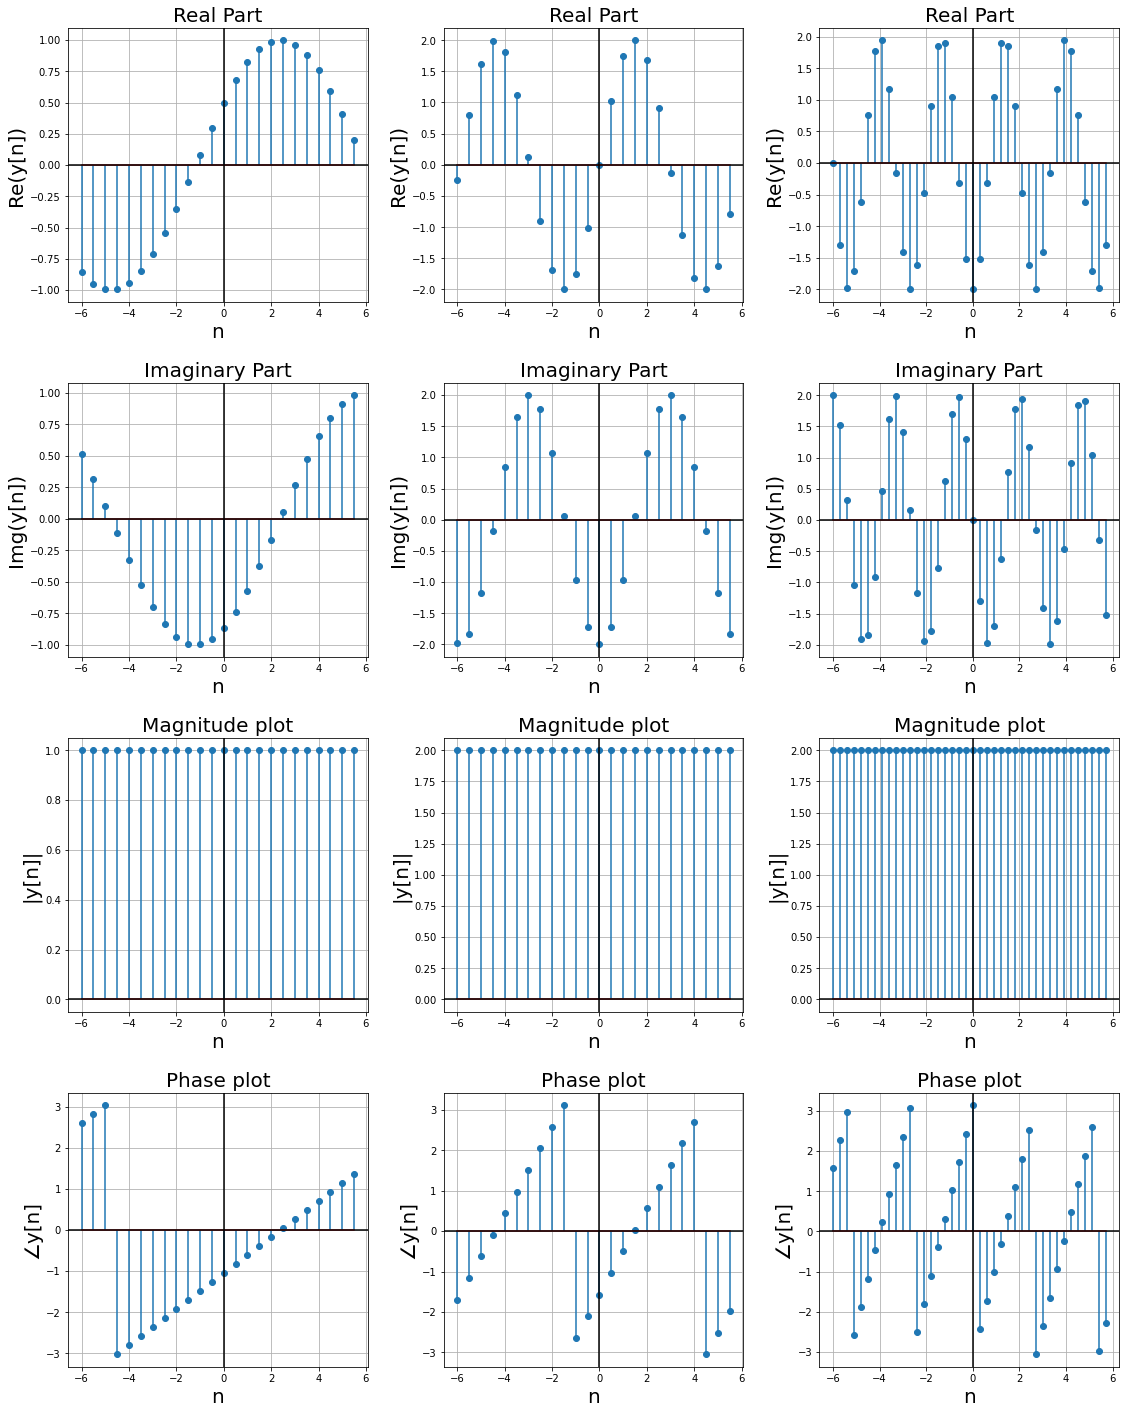

In [29]:
fig, axes = plt.subplots(4,3,figsize=(16, 20));

######################################################################################################################
######################################################################################################################

n = np.arange(-6,6,0.5)
a = 1
o = 0.14*np.pi
phi = -np.pi/3

# Real part plot complex exponential sequence.
re = real_value_seq(a,o,phi,n)
axes[0,0].stem(n,re)
axes[0,0].set_xlabel('n',fontsize=20)
axes[0,0].set_ylabel('Re(y[n])',fontsize=20)
axes[0,0].set_title('Real Part',fontsize=20)
axes[0,0].axhline(color = "Black");
axes[0,0].axvline(color = "Black");
axes[0,0].grid()


# Imaginary part plot complex exponential sequence.
img = imaginary_value_seq(a,o,phi,n)
axes[1,0].stem(n,img)
axes[1,0].set_xlabel('n',fontsize=20)
axes[1,0].set_ylabel('Img(y[n])',fontsize=20)
axes[1,0].set_title('Imaginary Part',fontsize=20)
axes[1,0].axhline(color = "Black");
axes[1,0].axvline(color = "Black");
axes[1,0].grid()


# Magnitude plot complex exponential sequence.
mag = magnitude_seq(a,o,phi,n)
axes[2,0].stem(n,mag)
axes[2,0].set_xlabel('n',fontsize=20)
axes[2,0].set_ylabel('|y[n]|',fontsize=20)
axes[2,0].set_title('Magnitude plot',fontsize=20)
axes[2,0].axhline(color = "Black");
axes[2,0].axvline(color = "Black");
axes[2,0].grid()


# Angle plot complex exponential sequence.
ang = phase_seq(a,o,phi,n)
axes[3,0].stem(n,ang)
axes[3,0].set_xlabel('n',fontsize=20)
axes[3,0].set_ylabel('∠y[n]',fontsize=20)
axes[3,0].set_title('Phase plot',fontsize=20)
axes[3,0].axhline(color = "Black");
axes[3,0].axvline(color = "Black");
axes[3,0].grid()

######################################################################################################################
######################################################################################################################

n = np.arange(-6,6,0.5)
a = 2
o = 0.34*np.pi
phi = -np.pi/2

# Real part plot complex exponential sequence.
re = real_value_seq(a,o,phi,n)
axes[0,1].stem(n,re)
axes[0,1].set_xlabel('n',fontsize=20)
axes[0,1].set_ylabel('Re(y[n])',fontsize=20)
axes[0,1].set_title('Real Part',fontsize=20)
axes[0,1].axhline(color = "Black");
axes[0,1].axvline(color = "Black");
axes[0,1].grid()


# Imaginary part plot complex exponential sequence.
img = imaginary_value_seq(a,o,phi,n)
axes[1,1].stem(n,img)
axes[1,1].set_xlabel('n',fontsize=20)
axes[1,1].set_ylabel('Img(y[n])',fontsize=20)
axes[1,1].set_title('Imaginary Part',fontsize=20)
axes[1,1].axhline(color = "Black");
axes[1,1].axvline(color = "Black");
axes[1,1].grid()


# Magnitude plot complex exponential sequence.
mag = magnitude_seq(a,o,phi,n)
axes[2,1].stem(n,mag)
axes[2,1].set_xlabel('n',fontsize=20)
axes[2,1].set_ylabel('|y[n]|',fontsize=20)
axes[2,1].set_title('Magnitude plot',fontsize=20)
axes[2,1].axhline(color = "Black");
axes[2,1].axvline(color = "Black");
axes[2,1].grid()


# Angle plot complex exponential sequence.
ang = phase_seq(a,o,phi,n)
axes[3,1].stem(n,ang)
axes[3,1].set_xlabel('n',fontsize=20)
axes[3,1].set_ylabel('∠y[n]',fontsize=20)
axes[3,1].set_title('Phase plot',fontsize=20)
axes[3,1].axhline(color = "Black");
axes[3,1].axvline(color = "Black");
axes[3,1].grid()

######################################################################################################################
######################################################################################################################

n = np.arange(-6,6,0.3)
a = 2
o = 0.75*np.pi
phi = np.pi

# Real part plot complex exponential sequence.
re = real_value_seq(a,o,phi,n)
axes[0,2].stem(n,re)
axes[0,2].set_xlabel('n',fontsize=20)
axes[0,2].set_ylabel('Re(y[n])',fontsize=20)
axes[0,2].set_title('Real Part',fontsize=20)
axes[0,2].axhline(color = "Black");
axes[0,2].axvline(color = "Black");
axes[0,2].grid()


# Imaginary part plot complex exponential sequence.
img = imaginary_value_seq(a,o,phi,n)
axes[1,2].stem(n,img)
axes[1,2].set_xlabel('n',fontsize=20)
axes[1,2].set_ylabel('Img(y[n])',fontsize=20)
axes[1,2].set_title('Imaginary Part',fontsize=20)
axes[1,2].axhline(color = "Black");
axes[1,2].axvline(color = "Black");
axes[1,2].grid()


# Magnitude plot complex exponential sequence.
mag = magnitude_seq(a,o,phi,n)
axes[2,2].stem(n,mag)
axes[2,2].set_xlabel('n',fontsize=20)
axes[2,2].set_ylabel('|y[n]|',fontsize=20)
axes[2,2].set_title('Magnitude plot',fontsize=20)
axes[2,2].axhline(color = "Black");
axes[2,2].axvline(color = "Black");
axes[2,2].grid()


# Angle plot complex exponential sequence.
ang = phase_seq(a,o,phi,n)
axes[3,2].stem(n,ang)
axes[3,2].set_xlabel('n',fontsize=20)
axes[3,2].set_ylabel('∠y[n]',fontsize=20)
axes[3,2].set_title('Phase plot',fontsize=20)
axes[3,2].axhline(color = "Black");
axes[3,2].axvline(color = "Black");
axes[3,2].grid()


plt.tight_layout(pad=2);

In [30]:
# function to generate sinusoidal sequence.
def x_1_seq(n):
    x1 = []
    for sample in n:
        y = np.sin(np.pi*sample)
        x1.append(y)
    return x1

######################################################################################################################
######################################################################################################################

# function to generate sinusoidal sequence.
def x_2_seq(n):
    x2 = []
    for sample in n:
        y = 2*np.sin(2*np.pi*sample)
        x2.append(y)
    return x2

######################################################################################################################
######################################################################################################################

# function to generate sinusoidal sequence.
def x_3_seq(n):
    x3 = []
    for sample in n:
        y = 4*np.sin(2*np.pi*sample/3)
        x3.append(y)
    return x3

######################################################################################################################
######################################################################################################################

# function to generate sinusoidal sequence.
def x_4_seq(n):
    x4 = []
    for sample in n:
        y = 3*np.cos(np.pi*sample/4)
        x4.append(y)
    return x4

######################################################################################################################
######################################################################################################################

# function to generate sinusoidal sequence.
def x_5_seq(n):
    x5 = []
    for sample in n:
        y = 3*np.cos((2*np.pi*sample)+(np.pi/4))
        x5.append(y)
    return x5

######################################################################################################################
######################################################################################################################

# function to generate sinusoidal sequence.
def x_6_seq(n):
    x6 = []
    x1 = x_1(-n) 
    x2 = x_2(n)
    for i in range(len(x1)):
        x6.append(x1[i]+x2[i])
    return x6

######################################################################################################################
######################################################################################################################

# function to generate sinusoidal sequence.
def x_7_seq(n):
    x7 = []
    x4 = x_4(n) 
    x5 = x_5(n)
    for i in range(len(x4)):
        x7.append(x4[i]+x5[i])
    return x7

######################################################################################################################
######################################################################################################################

# function to generate sinusoidal sequence.
def x_8_seq(n):
    x8 = []
    x2 = x_2(-n) 
    x4 = x_4(n)
    for i in range(len(x2)):
        x8.append(x2[i]+x4[i])
    return x8

######################################################################################################################
######################################################################################################################

# function to generate sinusoidal sequence.
def x_9_seq(n):
    x9 = []
    x3 = x_3(-n) 
    x5 = x_5(-n)
    for i in range(len(x3)):
        x9.append(x3[i]-x5[i])
    return x9

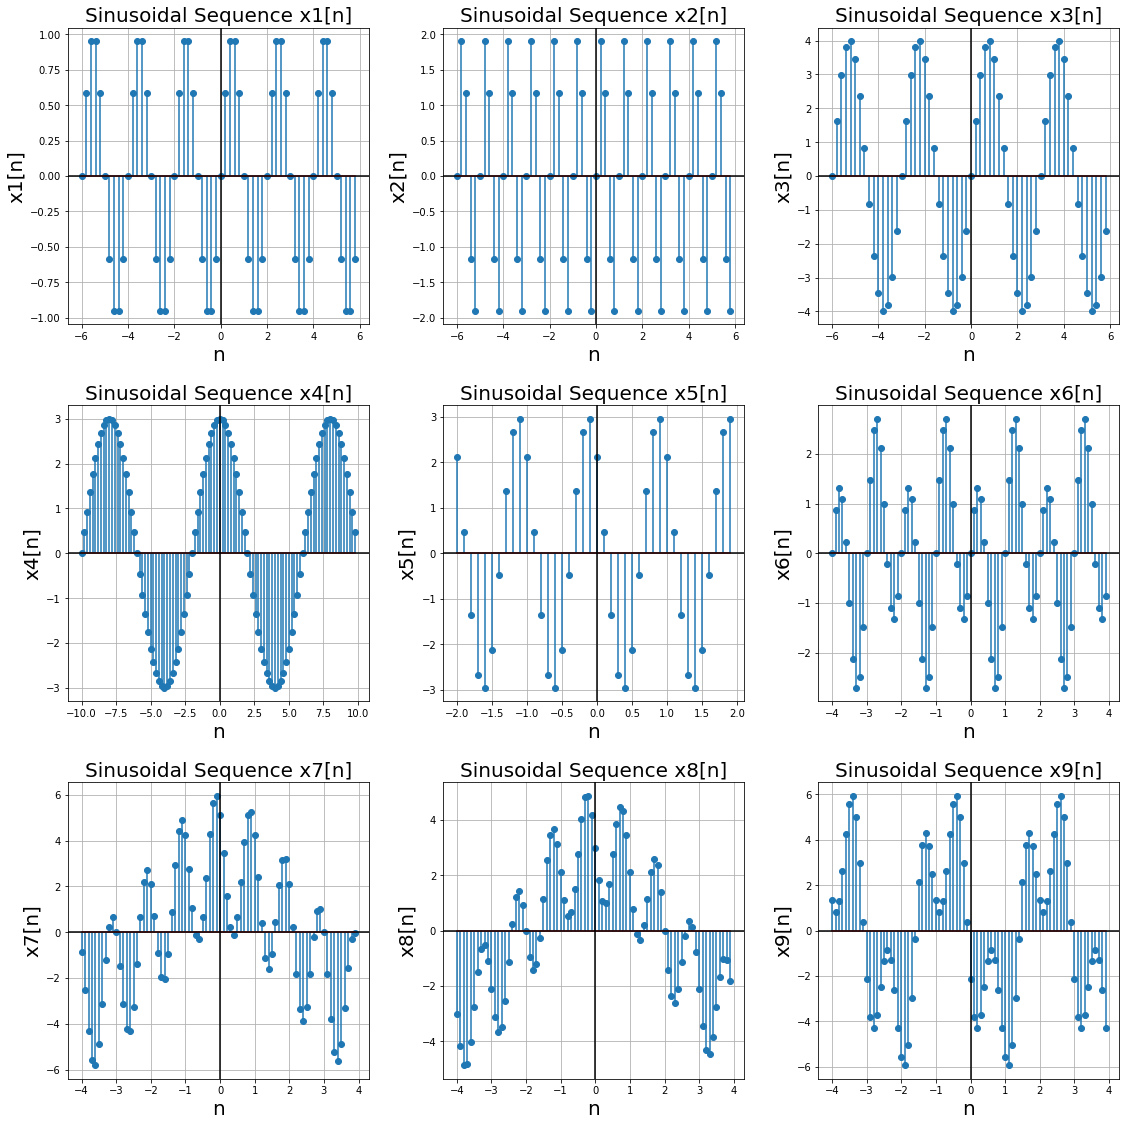

In [31]:
fig, axes = plt.subplots(3,3,figsize=(16, 16));

######################################################################################################################
######################################################################################################################

# plot sinusoidal sequence x1[n].
n = np.arange(-6,6,0.2)
x1 = x_1_seq(n)
axes[0,0].stem(n,x1)
axes[0,0].set_xlabel('n',fontsize=20)
axes[0,0].set_ylabel('x1[n]',fontsize=20)
axes[0,0].set_title('Sinusoidal Sequence x1[n]',fontsize=20)
axes[0,0].axhline(color = "Black");
axes[0,0].axvline(color = "Black");
axes[0,0].grid()

######################################################################################################################
######################################################################################################################

# plot sinusoidal sequence x2[n].
n= np.arange(-6,6,0.2)
x2 = x_2_seq(n)
axes[0,1].stem(n,x2)
axes[0,1].set_xlabel('n',fontsize=20)
axes[0,1].set_ylabel('x2[n]',fontsize=20)
axes[0,1].set_title('Sinusoidal Sequence x2[n]',fontsize=20)
axes[0,1].axhline(color = "Black");
axes[0,1].axvline(color = "Black");
axes[0,1].grid()

######################################################################################################################
######################################################################################################################

# plot sinusoidal sequence x3[n].
n = np.arange(-6,6,0.2)
x3 = x_3_seq(n)
axes[0,2].stem(n,x3)
axes[0,2].set_xlabel('n',fontsize=20)
axes[0,2].set_ylabel('x3[n]',fontsize=20)
axes[0,2].set_title('Sinusoidal Sequence x3[n]',fontsize=20)
axes[0,2].axhline(color = "Black");
axes[0,2].axvline(color = "Black");
axes[0,2].grid()

######################################################################################################################
######################################################################################################################

# plot sinusoidal sequence x4[n].
n = np.arange(-10,10,0.2)
x4 = x_4_seq(n)
axes[1,0].stem(n,x4)
axes[1,0].set_xlabel('n',fontsize=20)
axes[1,0].set_ylabel('x4[n]',fontsize=20)
axes[1,0].set_title('Sinusoidal Sequence x4[n]',fontsize=20)
axes[1,0].axhline(color = "Black");
axes[1,0].axvline(color = "Black");
axes[1,0].grid()

######################################################################################################################
######################################################################################################################

# plot sinusoidal sequence x5[n].
n = np.arange(-2,2,0.1)
x5 = x_5_seq(n)
axes[1,1].stem(n,x5)
axes[1,1].set_xlabel('n',fontsize=20)
axes[1,1].set_ylabel('x5[n]',fontsize=20)
axes[1,1].set_title('Sinusoidal Sequence x5[n]',fontsize=20)
axes[1,1].axhline(color = "Black");
axes[1,1].axvline(color = "Black");
axes[1,1].grid()


######################################################################################################################
######################################################################################################################

# plot sinusoidal sequence x6[n].
n = np.arange(-4,4,0.1)
x6 = x_6_seq(n)
axes[1,2].stem(n,x6)
axes[1,2].set_xlabel('n',fontsize=20)
axes[1,2].set_ylabel('x6[n]',fontsize=20)
axes[1,2].set_title('Sinusoidal Sequence x6[n]',fontsize=20)
axes[1,2].axhline(color = "Black");
axes[1,2].axvline(color = "Black");
axes[1,2].grid()

######################################################################################################################
######################################################################################################################

# plot sinusoidal sequence x7[n].
n = np.arange(-4,4,0.1)
x7 = x_7_seq(n)
axes[2,0].stem(n,x7)
axes[2,0].set_xlabel('n',fontsize=20)
axes[2,0].set_ylabel('x7[n]',fontsize=20)
axes[2,0].set_title('Sinusoidal Sequence x7[n]',fontsize=20)
axes[2,0].axhline(color = "Black");
axes[2,0].axvline(color = "Black");
axes[2,0].grid()

######################################################################################################################
######################################################################################################################

# plot sinusoidal sequence x8[n].
n = np.arange(-4,4,0.1)
x8 = x_8_seq(n)
axes[2,1].stem(n,x8)
axes[2,1].set_xlabel('n',fontsize=20)
axes[2,1].set_ylabel('x8[n]',fontsize=20)
axes[2,1].set_title('Sinusoidal Sequence x8[n]',fontsize=20)
axes[2,1].axhline(color = "Black");
axes[2,1].axvline(color = "Black");
axes[2,1].grid()

######################################################################################################################
######################################################################################################################

# plot sinusoidal sequence x9[n].
n = np.arange(-4,4,0.1)
x9 = x_9_seq(n)
axes[2,2].stem(n,x9)
axes[2,2].set_xlabel('n',fontsize=20)
axes[2,2].set_ylabel('x9[n]',fontsize=20)
axes[2,2].set_title('Sinusoidal Sequence x9[n]',fontsize=20)
axes[2,2].axhline(color = "Black");
axes[2,2].axvline(color = "Black");
axes[2,2].grid()

plt.tight_layout(pad=2);

In continuous-time domain, the impulse function, unit step function, ramp function, and parabolic function are related by the differentiation operation. That is if we differentiate ramp function we get unit step function and so on.

Is there any such relation in the discrete-time domain? If yes, how will you implement ramp function from parabolic function, unit step function from ramp function, and impulse function from unit step function in the discrete-time domain

In [32]:
# function to generate difference_equation.
def difference_equation(x):
    diff = []
    for i in range(len(x)):
        if i == 0:
            diff.append(0)
        else:
            diff.append(x[i]-x[i-1])
    return diff

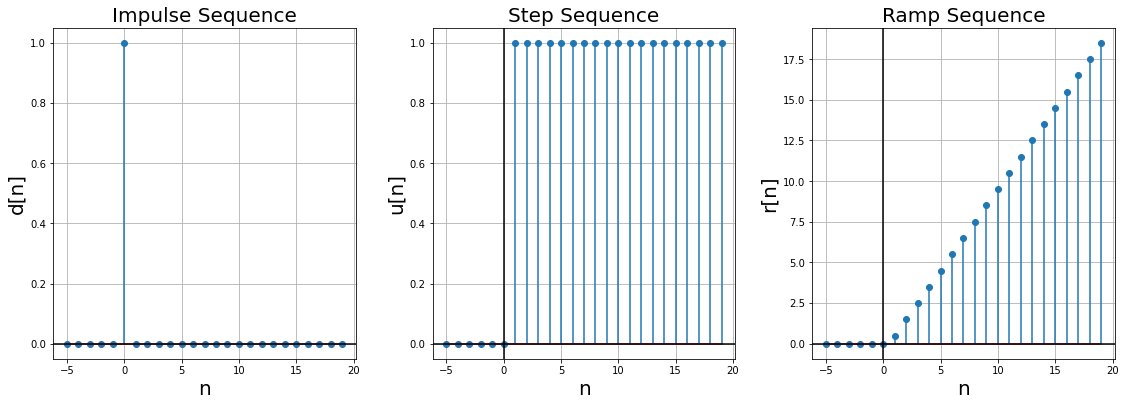

In [33]:
fig, axes = plt.subplots(1,3,figsize=(16, 6));

######################################################################################################################
######################################################################################################################

# plot impulse sequence using unit step sequence.
a = 1
c = 0
n = np.arange(-5,20,1)
unit = step_seq(a,c,n)
diff = difference_equation(unit)
axes[0].stem(n,diff)
axes[0].set_xlabel('n',fontsize=20)
axes[0].set_ylabel('d[n]',fontsize=20)
axes[0].set_title('Impulse Sequence',fontsize=20)
axes[0].axhline(color = "Black");
axes[0].grid()


######################################################################################################################
######################################################################################################################

# plot unit step sequence using ramp sequence.
a = 1
c = 0
n = np.arange(-5,20,1)
ramp = ramp_seq(a,c,n)
diff = difference_equation(ramp)
axes[1].stem(n,diff)
axes[1].set_xlabel('n',fontsize=20)
axes[1].set_ylabel('u[n]',fontsize=20)
axes[1].set_title('Step Sequence',fontsize=20)
axes[1].axhline(color = "Black");
axes[1].axvline(color = "Black");
axes[1].grid()


######################################################################################################################
######################################################################################################################

# plot ramp sequence using parabolic sequence.
a = 1
c = 0
n = np.arange(-5,20,1)
parabolic = parabolic_seq(a,c,n)
diff = difference_equation(parabolic)
axes[2].stem(n,diff)
axes[2].set_xlabel('n',fontsize=20)
axes[2].set_ylabel('r[n]',fontsize=20)
axes[2].set_title('Ramp Sequence',fontsize=20)
axes[2].axhline(color = "Black");
axes[2].axvline(color = "Black");
axes[2].grid()


plt.tight_layout(pad=2);

Plot an alternating discrete periodic triangle wave using impulse train.

In [34]:
# function to generate triangle wave sequence.
def triangle_wave(a,n,UL,LL,SS,p):
    triangle = []
    temp = UL - LL
    T = temp/p
    for i in range(p):
        t1 = np.arange(LL,LL+T,SS)
        for sample in t1:
            if abs(sample) <= T/4:
                triangle.append(a*sample)
            elif abs(sample) > T/4 and abs(sample) <= T/2:
                triangle.append((a*T/2)-(a*sample))
            elif abs(sample) > T/2 and abs(sample) <= 3*T/4:
                triangle.append(((a*T/2)-(a*sample)))
            else:
                triangle.append(-((a*T)-(a*sample)))
    return triangle    

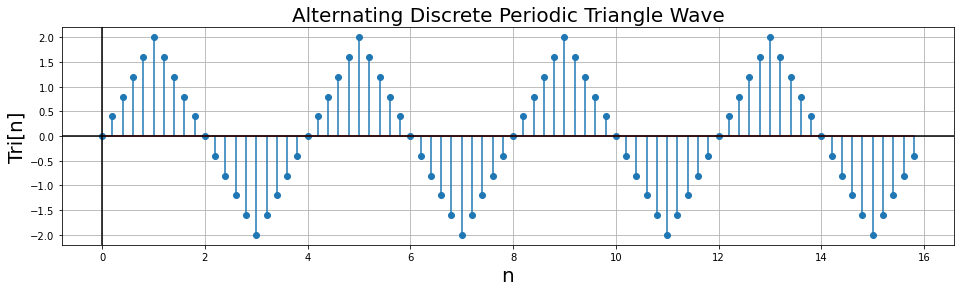

In [35]:
# plot the alternating periodic triangle sequence.
plt.subplots(figsize=(16,4))
a = 2
UL = 16
LL = 0
SS = 0.2
p = 4
n = np.arange(LL,UL,SS)
tri = triangle_wave(a,n,UL,LL,SS,p)
plt.stem(n,tri)
plt.xlabel('n',fontsize=20)
plt.ylabel('Tri[n]',fontsize=20)
plt.title('Alternating Discrete Periodic Triangle Wave',fontsize=20)
plt.axhline(color = "Black");
plt.axvline(color = "Black");
plt.grid()

## 3. LTI Systems

Let x[n] be the input to an linear-time invariant (LTI) system and h[n] be the impulse response. The output of a discrete LTI system in terms of the impulse response is characterized by the equation as
  
                                y[n] = x[n] ∗ h[n] 
                                
                                     = ∑ k=−∞......∞  x[k]h[n − k]
                                                                 
Write a function for performing convolution of two sequences. By using this function, calculate the output for the following sequences:

(i) x[n] = {3, 5, 2, 6, 8} and h[n] = {−2, 4, 1}

(ii) x[n] = {2, 3, 4, 7, 1} and h[−n] = {−2, 4, 1}

For (i) and (ii), plot x[n], h[n], and y[n] on a single subplot.

In [36]:
# function to convolute the two sequence.
def convolution(x1,x2):
    result = []
    x3 = []
    for i in range(len(x2)):
        x3.append(x1*x2[i])
    temp = len(x3)
    for i in range(len(x3)):
        for j in range(len(x3)-1-i):
            x3[i] = np.insert(x3[i],len(x3[i]),0)
    for i in range(len(x3)):
        for j in range(i):
            x3[i] = np.insert(x3[i],0,0)
    for i in range(len(x3[0])):
        add = 0
        for j in range(len(x3)):
            add+=x3[j][i]
        result.append(add)
    return result

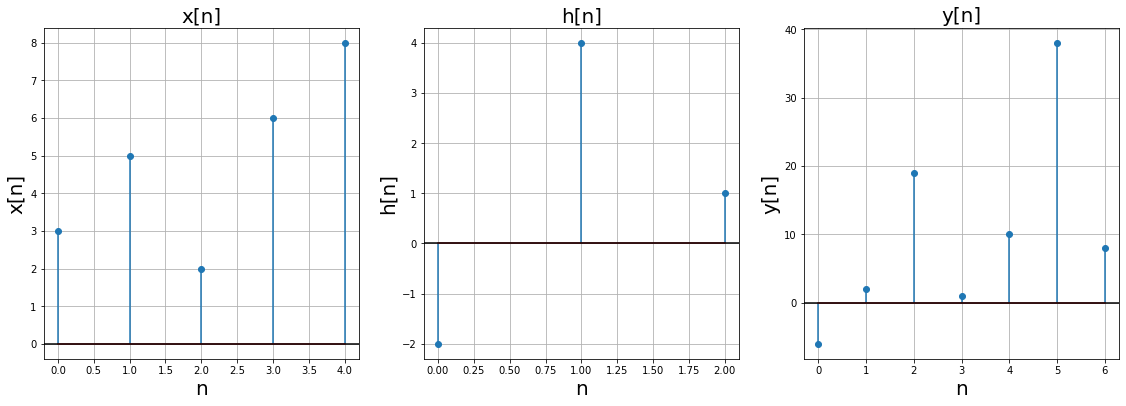

In [37]:
fig, axes = plt.subplots(1,3,figsize=(16, 6));

######################################################################################################################
######################################################################################################################

a = np.array([3,5,2,6,8])
n1 = np.arange(0,len(a),1) 
axes[0].stem(n1,a)
axes[0].set_xlabel('n',fontsize=20)
axes[0].set_ylabel('x[n]',fontsize=20)
axes[0].set_title('x[n]',fontsize=20)
axes[0].axhline(color = "Black");
axes[0].grid()


######################################################################################################################
######################################################################################################################

b = np.array([-2,4,1])
n2 = np.arange(0,len(b),1) 
axes[1].stem(n2,b)
axes[1].set_xlabel('n',fontsize=20)
axes[1].set_ylabel('h[n]',fontsize=20)
axes[1].set_title('h[n]',fontsize=20)
axes[1].axhline(color = "Black");
axes[1].grid()

######################################################################################################################
######################################################################################################################

c = convolution(a,b)
n3 = np.arange(0,len(c),1)
axes[2].stem(n3,c)
axes[2].set_xlabel('n',fontsize=20)
axes[2].set_ylabel('y[n]',fontsize=20)
axes[2].set_title('y[n]',fontsize=20)
axes[2].axhline(color = "Black");
axes[2].grid()


plt.tight_layout(pad=2);

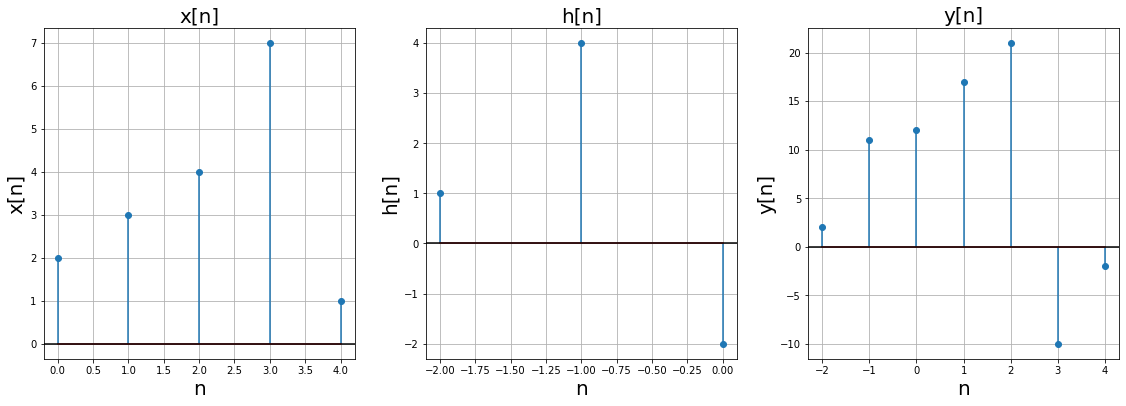

In [38]:
fig, axes = plt.subplots(1,3,figsize=(16, 6));

######################################################################################################################
######################################################################################################################

a = np.array([2,3,4,7,1])
n1 = np.arange(0,len(a),1) 
axes[0].stem(n1,a)
axes[0].set_xlabel('n',fontsize=20)
axes[0].set_ylabel('x[n]',fontsize=20)
axes[0].set_title('x[n]',fontsize=20)
axes[0].axhline(color = "Black");
axes[0].grid()


######################################################################################################################
######################################################################################################################

b = np.array([-2,4,1])
n2 = np.arange(0,len(b),1) 
axes[1].stem(-n2,b)
axes[1].set_xlabel('n',fontsize=20)
axes[1].set_ylabel('h[n]',fontsize=20)
axes[1].set_title('h[n]',fontsize=20)
axes[1].axhline(color = "Black");
axes[1].grid()

######################################################################################################################
######################################################################################################################

c = convolution(a,np.flip(b))
n3 = np.arange(-2,len(c)-2,1)
axes[2].stem(n3,c)
axes[2].set_xlabel('n',fontsize=20)
axes[2].set_ylabel('y[n]',fontsize=20)
axes[2].set_title('y[n]',fontsize=20)
axes[2].axhline(color = "Black");
axes[2].grid()


plt.tight_layout(pad=2);

Calculate the impulse response for y[n] = 3x[n − 1] and find the response of the system to the following inputs: unit step function u[n], ramp function r[n], parabolic function p[n], and complex exponential e(2+j3)n. Plot the input signals and their responses. Plot the real and imaginary part of the response for complex exponential input. Do you observe any pattern in the input and response of complex exponential signal?

In [39]:
# Impulse response of the system.
n = np.arange(-5,5,1)
h = unit_impulse(3,-1,n)

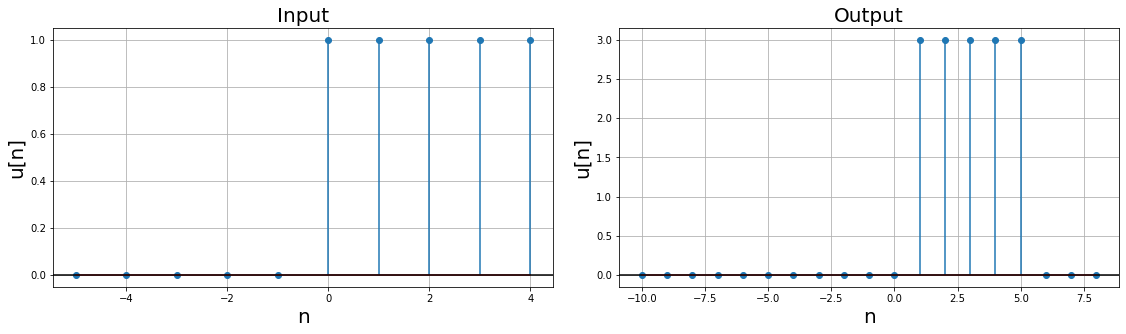

In [40]:
fig, axes = plt.subplots(1,2,figsize=(16, 5));

######################################################################################################################
######################################################################################################################

n = np.arange(-5,5,1)
n1= np.arange(-10,9,1)

# plot the input.
u = step_seq(1,0,n)
axes[0].stem(n,u)
axes[0].set_xlabel('n',fontsize=20)
axes[0].set_ylabel('u[n]',fontsize=20)
axes[0].set_title('Input',fontsize=20)
axes[0].axhline(color = "Black");
axes[0].grid()

# plot the output.
y_u = convolution(np.array(h),np.array(u))
axes[1].stem(n1,y_u)
axes[1].set_xlabel('n',fontsize=20)
axes[1].set_ylabel('u[n]',fontsize=20)
axes[1].set_title('Output',fontsize=20)
axes[1].axhline(color = "Black");
axes[1].grid()

plt.tight_layout(pad=2);

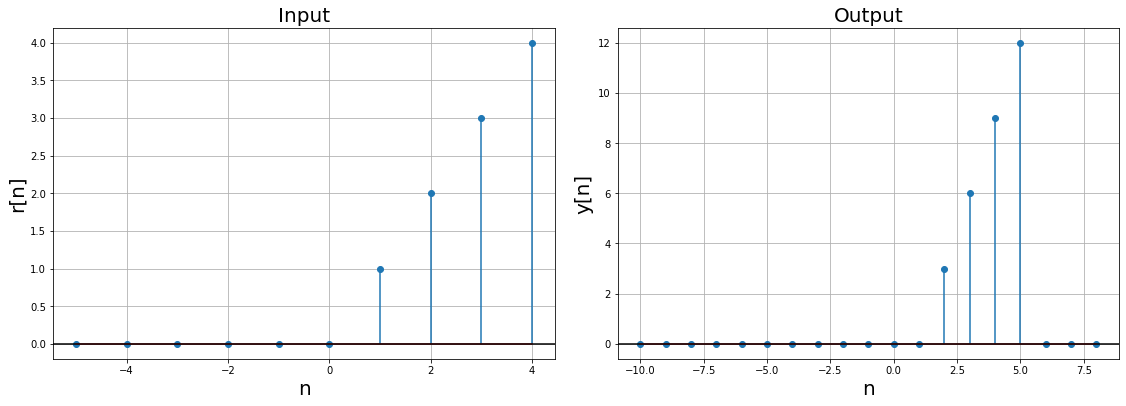

In [41]:
fig, axes = plt.subplots(1,2,figsize=(16, 6));

######################################################################################################################
######################################################################################################################

n = np.arange(-5,5,1)
n1= np.arange(-10,9,1)

# plot the input.
r = ramp_seq(1,0,n)
axes[0].stem(n,r)
axes[0].set_xlabel('n',fontsize=20)
axes[0].set_ylabel('r[n]',fontsize=20)
axes[0].set_title('Input',fontsize=20)
axes[0].axhline(color = "Black");
axes[0].grid()

# plot the output
y_u = convolution(np.array(h),np.array(r))
axes[1].stem(n1,y_u)
axes[1].set_xlabel('n',fontsize=20)
axes[1].set_ylabel('y[n]',fontsize=20)
axes[1].set_title('Output',fontsize=20)
axes[1].axhline(color = "Black");
axes[1].grid()


plt.tight_layout(pad=2);

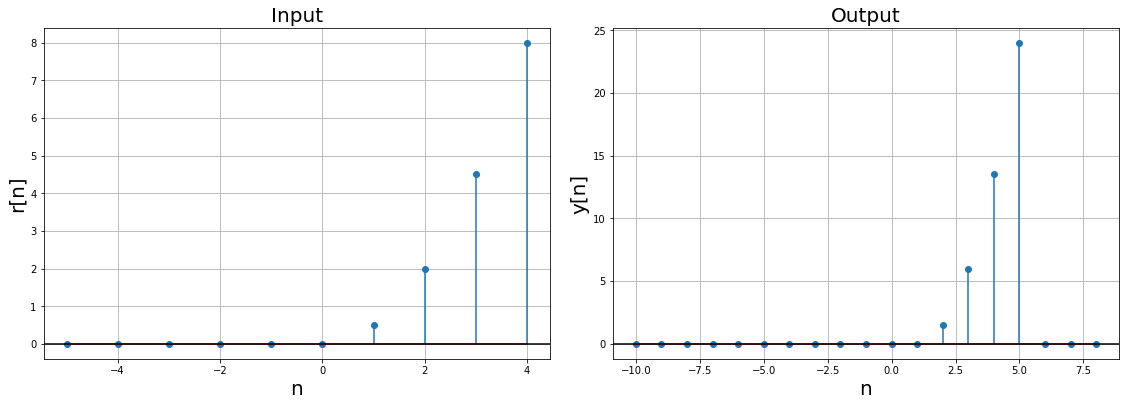

In [43]:
fig, axes = plt.subplots(1,2,figsize=(16, 6));

######################################################################################################################
######################################################################################################################

n = np.arange(-5,5,1)
n1= np.arange(-10,9,1)

# plot the input.
p = parabolic_seq(1,0,n)
axes[0].stem(n,p)
axes[0].set_xlabel('n',fontsize=20)
axes[0].set_ylabel('r[n]',fontsize=20)
axes[0].set_title('Input',fontsize=20)
axes[0].axhline(color = "Black");
axes[0].grid()

# plot the output.
y_u = convolution(np.array(h),np.array(p))
axes[1].stem(n1,y_u)
axes[1].set_xlabel('n',fontsize=20)
axes[1].set_ylabel('y[n]',fontsize=20)
axes[1].set_title('Output',fontsize=20)
axes[1].axhline(color = "Black");
axes[1].grid()


plt.tight_layout(pad=2);

In [44]:
# function for real part of complex exponential sequence.
def comp_exp_real(a,b,n):
    com_exp_r =[]
    for sample in n:
        y = np.exp(a*sample)*np.cos(b*sample)
        com_exp_r.append(y)
    return com_exp_r

######################################################################################################################
######################################################################################################################

# function for imaginary part of complex exponential sequence.
def comp_exp_imaginary(a,b,n):
    com_exp_r =[]
    for sample in n:
        y = np.exp(a*sample)*np.sin(b*sample)
        com_exp_r.append(y)
    return com_exp_r

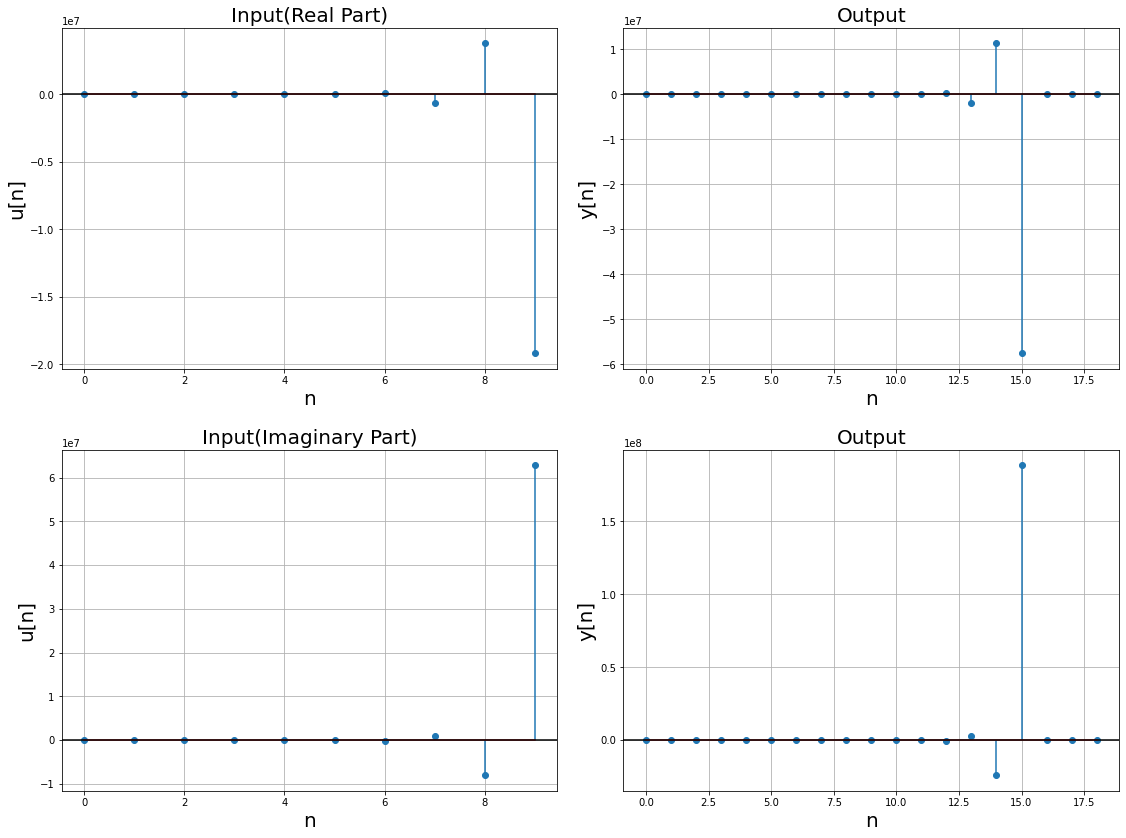

In [45]:
fig, axes = plt.subplots(2,2,figsize=(16, 12));

######################################################################################################################
######################################################################################################################

n = np.arange(0,10,1)
n1= np.arange(0,19,1)
a = 2
b = 3

######################################################################################################################
######################################################################################################################

# plot of real part of complex exponential sequence.
c = comp_exp_real(a,b,n)
axes[0,0].stem(n,c)
axes[0,0].set_xlabel('n',fontsize=20)
axes[0,0].set_ylabel('u[n]',fontsize=20)
axes[0,0].set_title('Input(Real Part)',fontsize=20)
axes[0,0].axhline(color = "Black");
axes[0,0].grid()

######################################################################################################################
######################################################################################################################

# plot of convoluted sequence.
y_u = convolution(np.array(h),np.array(c))
axes[0,1].stem(n1,y_u)
axes[0,1].set_xlabel('n',fontsize=20)
axes[0,1].set_ylabel('y[n]',fontsize=20)
axes[0,1].set_title('Output',fontsize=20)
axes[0,1].axhline(color = "Black");
axes[0,1].grid()

######################################################################################################################
######################################################################################################################

# plot of imaginary part of complex exponential sequence.
s = comp_exp_imaginary(a,b,n)
axes[1,0].stem(n,s)
axes[1,0].set_xlabel('n',fontsize=20)
axes[1,0].set_ylabel('u[n]',fontsize=20)
axes[1,0].set_title('Input(Imaginary Part)',fontsize=20)
axes[1,0].axhline(color = "Black");
axes[1,0].grid()

######################################################################################################################
######################################################################################################################

# plot of convoluted sequence.
y_u = convolution(np.array(h),np.array(s))
axes[1,1].stem(n1,y_u)
axes[1,1].set_xlabel('n',fontsize=20)
axes[1,1].set_ylabel('y[n]',fontsize=20)
axes[1,1].set_title('Output',fontsize=20)
axes[1,1].axhline(color = "Black");
axes[1,1].grid()

plt.tight_layout(pad=2);

Consider an input x[n] and a unit impulse response h[n] given by
                              
                                     x[n] = (1/3)^-n u[-n-1]
                                     
                                     h[n] = u[n-1]
                                     
Determine and plot the output 

                                     y[n] = x[n]*h[n]

In [46]:
# function to generate step sequence u[n].
def step_sample(a,c,n):
    unit =[]
    for sample in n:
        if sample < c:
            unit.append(0)
        else:
            unit.append(int(a**(-sample+c)))
    return unit

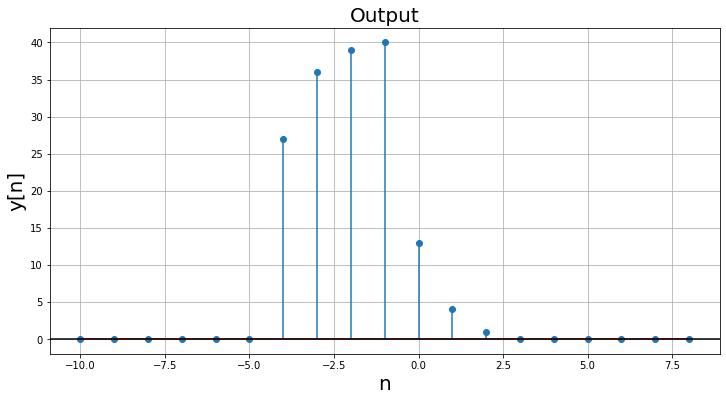

In [47]:
# plot the output response of the system
plt.subplots(figsize=(12,6))
a1 = 1
a2 = 1/3
c1 = 1
c2 = 1
LL = -5
UL = 5
SS = 1
n = np.arange(LL,UL,SS)
h = step_seq(a1,c1,n)
x = step_sample(a2,c2,n)
n1 = np.arange(2*LL,2*UL-1,SS)
out = convolution(np.array(h),np.flip(x))
plt.stem(n1,out)
plt.xlabel('n',fontsize=20)
plt.ylabel('y[n]',fontsize=20)
plt.title('Output',fontsize=20)
plt.axhline(color = "Black");
plt.grid()

Consider the first-order difference equation: 

                                      y[n]+2y[n−1] = x[n]. 

Assuming the condition of initial rest (i.e., if x[n] = 0 for n < n0, then y[n] = 0 for n < n0), find the impulse response of a system whose input and output are related by this difference equation.

In [48]:
# function to generate the system reponse. 
def diff_equation(x):
    diff = []
    for i in range(len(x)):
        if i == 0:
            diff.append(0)
        else:
            diff.append(x[i]-2*diff[i-1])
    return diff

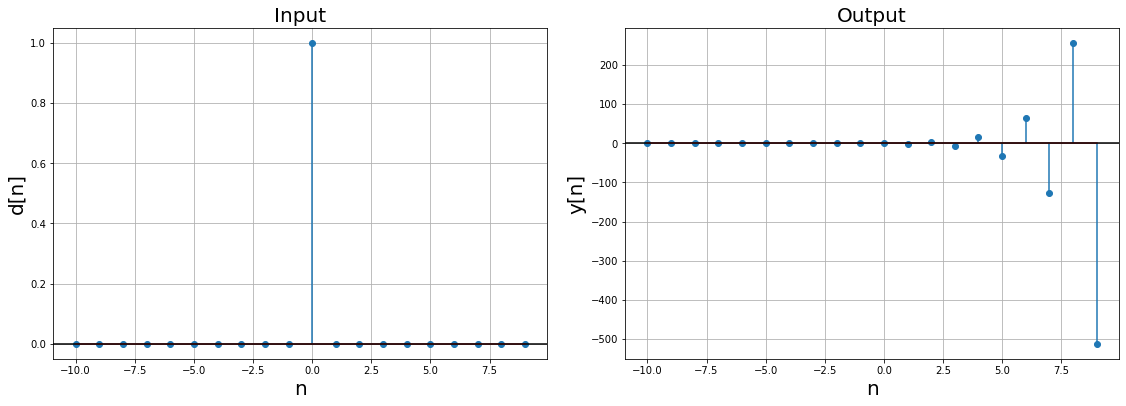

In [49]:
fig, axes = plt.subplots(1,2,figsize=(16, 6));

######################################################################################################################
######################################################################################################################

n = np.arange(-10,10,1)

# plot the input.
x = unit_impulse(1,0,n)
axes[0].stem(n,x)
axes[0].set_xlabel('n',fontsize=20)
axes[0].set_ylabel('d[n]',fontsize=20)
axes[0].set_title('Input',fontsize=20)
axes[0].axhline(color = "Black");
axes[0].grid()

######################################################################################################################
######################################################################################################################

# plot the system response.
y = diff_equation(x)
axes[1].stem(n,y)
axes[1].set_xlabel('n',fontsize=20)
axes[1].set_ylabel('y[n]',fontsize=20)
axes[1].set_title('Output',fontsize=20)
axes[1].axhline(color = "Black");
axes[1].grid()


plt.tight_layout(pad=2);

Consider the evaluation of 

                                y[n] = x1[n] ∗ x2[n] ∗ x3[n], 
                                
where x1 = (0.5)nu[n], x2 = u[n + 3], x3 = δ[n] − δ[n − 1].

(i) Evaluate the convolution x1[n] ∗ x2[n].

(ii) Convolve the result of part (i) with x3[n] in order to evaluate y[n].

(iii) Evaluate the convolution x2[n] ∗ x3[n].

(iv) Convolve the result of part (iii) with x1[n] in order to evaluate y[n].

Plot the signals.


In [50]:
LL = -5
UL = 5
SS = 1
n = np.arange(LL,UL,SS)
n1 = np.arange(2*LL,2*UL-1,SS)
n2 = np.arange(3*LL,3*UL-2,SS)

In [51]:
# Generating the sequence x1[n].
a1 = 0.5
c1 = 0
x1 = ramp_seq(a1,c1,n)

In [52]:
# Generating the sequence x1[n].
a2 = 1
c2 = -3
x2 = step_seq(a2,c2,n)

In [53]:
# Generating the sequence x1[n].
a3 = 1
c3 = -1
temp_1 = unit_impulse(a3,c1,n)
temp_2 = unit_impulse(a3,c3,n)
x3 = []
for i in range(len(temp_1)):
    x3.append(temp_1[i]-temp_2[i])

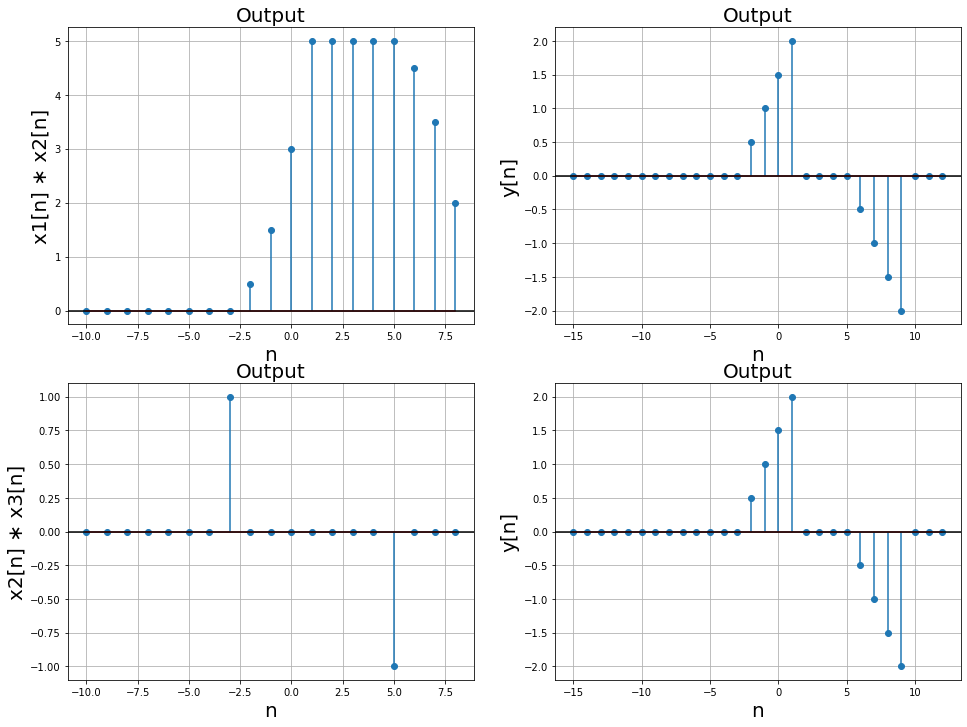

In [54]:
fig, axes = plt.subplots(2,2,figsize=(16, 12));

######################################################################################################################
######################################################################################################################

# plot the convolution of x1[n] and x2[n].
out = convolution(np.array(x1),np.array(x2))
axes[0,0].stem(n1,out)
axes[0,0].set_xlabel('n',fontsize=20)
axes[0,0].set_ylabel('x1[n] ∗ x2[n]',fontsize=20)
axes[0,0].set_title('Output',fontsize=20)
axes[0,0].axhline(color = "Black");
axes[0,0].grid()

######################################################################################################################
######################################################################################################################

# plot the convolved sequence y[n].
y = convolution(np.array(out),np.array(x3))
axes[0,1].stem(n2,y)
axes[0,1].set_xlabel('n',fontsize=20)
axes[0,1].set_ylabel('y[n]',fontsize=20)
axes[0,1].set_title('Output',fontsize=20)
axes[0,1].axhline(color = "Black");
axes[0,1].grid()

######################################################################################################################
######################################################################################################################

# plot the convolution of x2[n] and x3[n].
out = convolution(np.array(x2),np.array(x3))
axes[1,0].stem(n1,out)
axes[1,0].set_xlabel('n',fontsize=20)
axes[1,0].set_ylabel('x2[n] ∗ x3[n]',fontsize=20)
axes[1,0].set_title('Output',fontsize=20)
axes[1,0].axhline(color = "Black");
axes[1,0].grid()

######################################################################################################################
######################################################################################################################

# plot the convolved sequence y[n].
y = convolution(np.array(out),np.array(x1))
axes[1,1].stem(n2,y)
axes[1,1].set_xlabel('n',fontsize=20)
axes[1,1].set_ylabel('y[n]',fontsize=20)
axes[1,1].set_title('Output',fontsize=20)
axes[1,1].axhline(color = "Black");
axes[1,1].grid()